# Housing Price Prediction Assignment - (Ridge-Lasso) - Advanced Regression
by Saiyana Ramisetty

A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know :-

- **Which variables are significant in predicting the price of a house, and**
- **How well those variables describe the price of a house.**

**Goal of the Assignment:**
- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- The model will be a good way for the management to understand the pricing dynamics of a new market.
- This model will then be used by the management to understand how exactly the prices vary with the variables
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- Determine the optimal value of lambda for ridge and lasso regression.


# Importing Libraries need for the model building and analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
The company has collected a data set from the sale of houses in Australia.

In [2]:
# Path variable to hold the specific path of the data
path_var = '../Assignment/' # Replace with correct path variable

# Loading dataset
data = pd.read_csv(path_var + 'train.csv', encoding = 'ISO-8859-1')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Understanding the dataset and it's attributes 

In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
data.describe([0.25,0.50,0.75,0.90,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
90%       0.000000      0.000000    10.000000  2010.000000  278000.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[10 rows x 38 columns]

In [6]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

ID can be dropped from the dataset as it doesn't add any value in understanding the house pricing features

In [7]:
data.drop(['Id'], axis = 1, inplace = True)

# Categorical Attributes

In [8]:
# Method to create box plots with respect to the Sale Price
def plotBoxPlots(col):
    # Plotting boxplots
    plt.figure(figsize = (25, 25))
    sns.boxplot(x = col, y = 'SalePrice', data = data)
    plt.ylabel('Sale Price in USD')
    plt.xlabel(col)
    plt.title('Distribution of '+ col + ' wrt Sale Price')
    plt.show()

In [9]:
# Getting only categorical attributes from the data
categorical_data = data.select_dtypes(include = ['object'])
categorical_cols = categorical_data.columns
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
# Finding number of null values in categorical columns
data[categorical_cols].isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64

In [11]:
# Getting the percentages of the null values in each categorical attributes
round(100 * (data[categorical_cols].isnull().sum() / len(data)), 2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
GarageCond        5.55
GarageQual        5.55
GarageFinish      5.55
GarageType        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtQual          2.53
BsmtCond          2.53
MasVnrType        0.55
Electrical        0.07
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
BldgType          0.00
LandContour       0.00
LotConfig         0.00
Utilities         0.00
RoofStyle         0.00
LotShape          0.00
Street            0.00
HouseStyle        0.00
SaleCondition     0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
SaleType          0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
KitchenQual       0.00
Functional        0.00
PavedDrive        0.00
MSZoning          0.00
dtype: floa

# Handling missing values in categorical attributes

Dropping the PoolQc attribute as most of the data (99.52%) is missing, and imputing any value to such column doesn't fetch any good value

In [12]:
data.drop(['PoolQC'], axis = 1, inplace = True)

Dropping the MiscFeature attribute as most of the data (96.30%) is missing, and imputing any value to such column doesn't fetch any good value

In [13]:
data.drop(['MiscFeature'], axis = 1, inplace = True)

Dropping the Alley attribute as most of the data (93.77%) is missing, and imputing any value to such column doesn't fetch any good value

In [14]:
data.drop(['Alley'], axis = 1, inplace = True)

Dropping the Fence attribute as most of the data (80.75%) is missing, and imputing any value to such column doesn't fetch any good value

In [15]:
data.drop(['Fence'], axis = 1, inplace = True)

Dropping the FireplaceQu attribute as most of the data (47.26%) is missing, and imputing any value to such column doesn't fetch any good value

In [16]:
data.drop(['FireplaceQu'], axis = 1, inplace = True)

Rest of the missing attributes have comparetively small (2-5%) missing value percentages. Hence replacing the missing values with mode (the most frequent occurring value).

In [17]:
# Imputing missing values with mode for the remaining attributes
for column in ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical']:
    data[column].fillna(data[column].mode()[0], inplace = True)

In [18]:
# Getting only categorical attributes from the data
categorical_data = data.select_dtypes(include = ['object'])
categorical_cols = categorical_data.columns

# Checking the percentages of missing values after handling all categorical attribute missing values
round(100 * (data[categorical_cols].isnull().sum() / len(data)), 2).sort_values(ascending = False)

SaleCondition    0.0
Condition2       0.0
MasVnrType       0.0
Exterior2nd      0.0
Exterior1st      0.0
RoofMatl         0.0
RoofStyle        0.0
HouseStyle       0.0
BldgType         0.0
Condition1       0.0
SaleType         0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig        0.0
Utilities        0.0
LandContour      0.0
LotShape         0.0
Street           0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageFinish     0.0
GarageType       0.0
Functional       0.0
KitchenQual      0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
BsmtFinType2     0.0
BsmtFinType1     0.0
BsmtExposure     0.0
BsmtCond         0.0
MSZoning         0.0
dtype: float64

# Data Preparation for Categorical Attributes

Few of the categorical attributes that we have are ordinal categorical variables, thus mapping them to an orderly assignment

In [19]:
data['LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
data['LandSlope'] = data['LandSlope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0})
data['ExterQual'] = data['ExterQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
data['ExterCond'] = data['ExterCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
data['BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
data['BsmtCond'] = data['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
data['BsmtFinType2'] = data['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
data['HeatingQC'] = data['HeatingQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
data['KitchenQual'] = data['KitchenQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
data['Functional'] = data['Functional'].map({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})
data['GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0})
data['GarageQual'] = data['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
data['GarageCond'] = data['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
data['PavedDrive'] = data['PavedDrive'].map({'Y': 2, 'P': 1, 'N': 0})

In [20]:
# Getting only categorical attributes from the data after ordinal categorical variable assignment
categorical_data = data.select_dtypes(include = ['object'])
categorical_cols = categorical_data.columns
categorical_cols

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Dummy Variable Creation and Analysis of Categorical Attributes

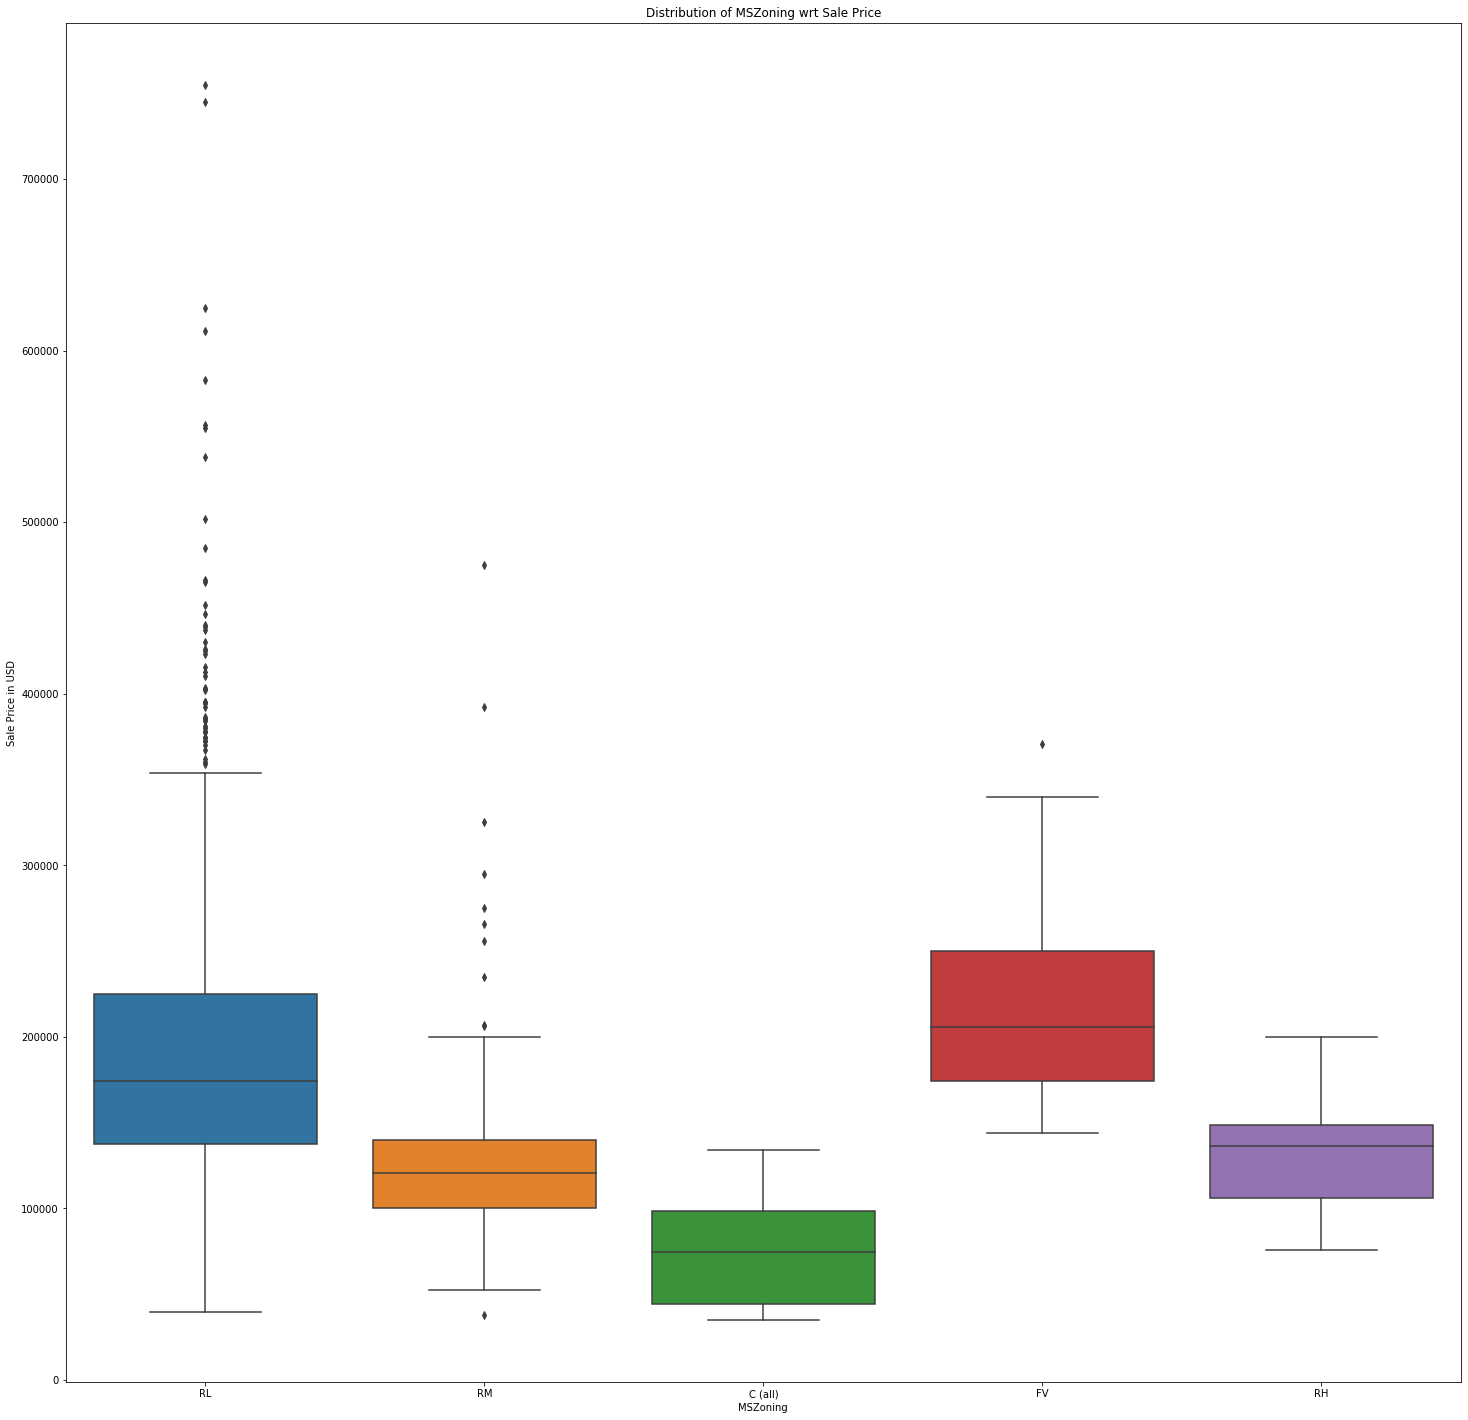

Least Occuring Value for the attribute - MSZoning, is C (all) - MSZoning


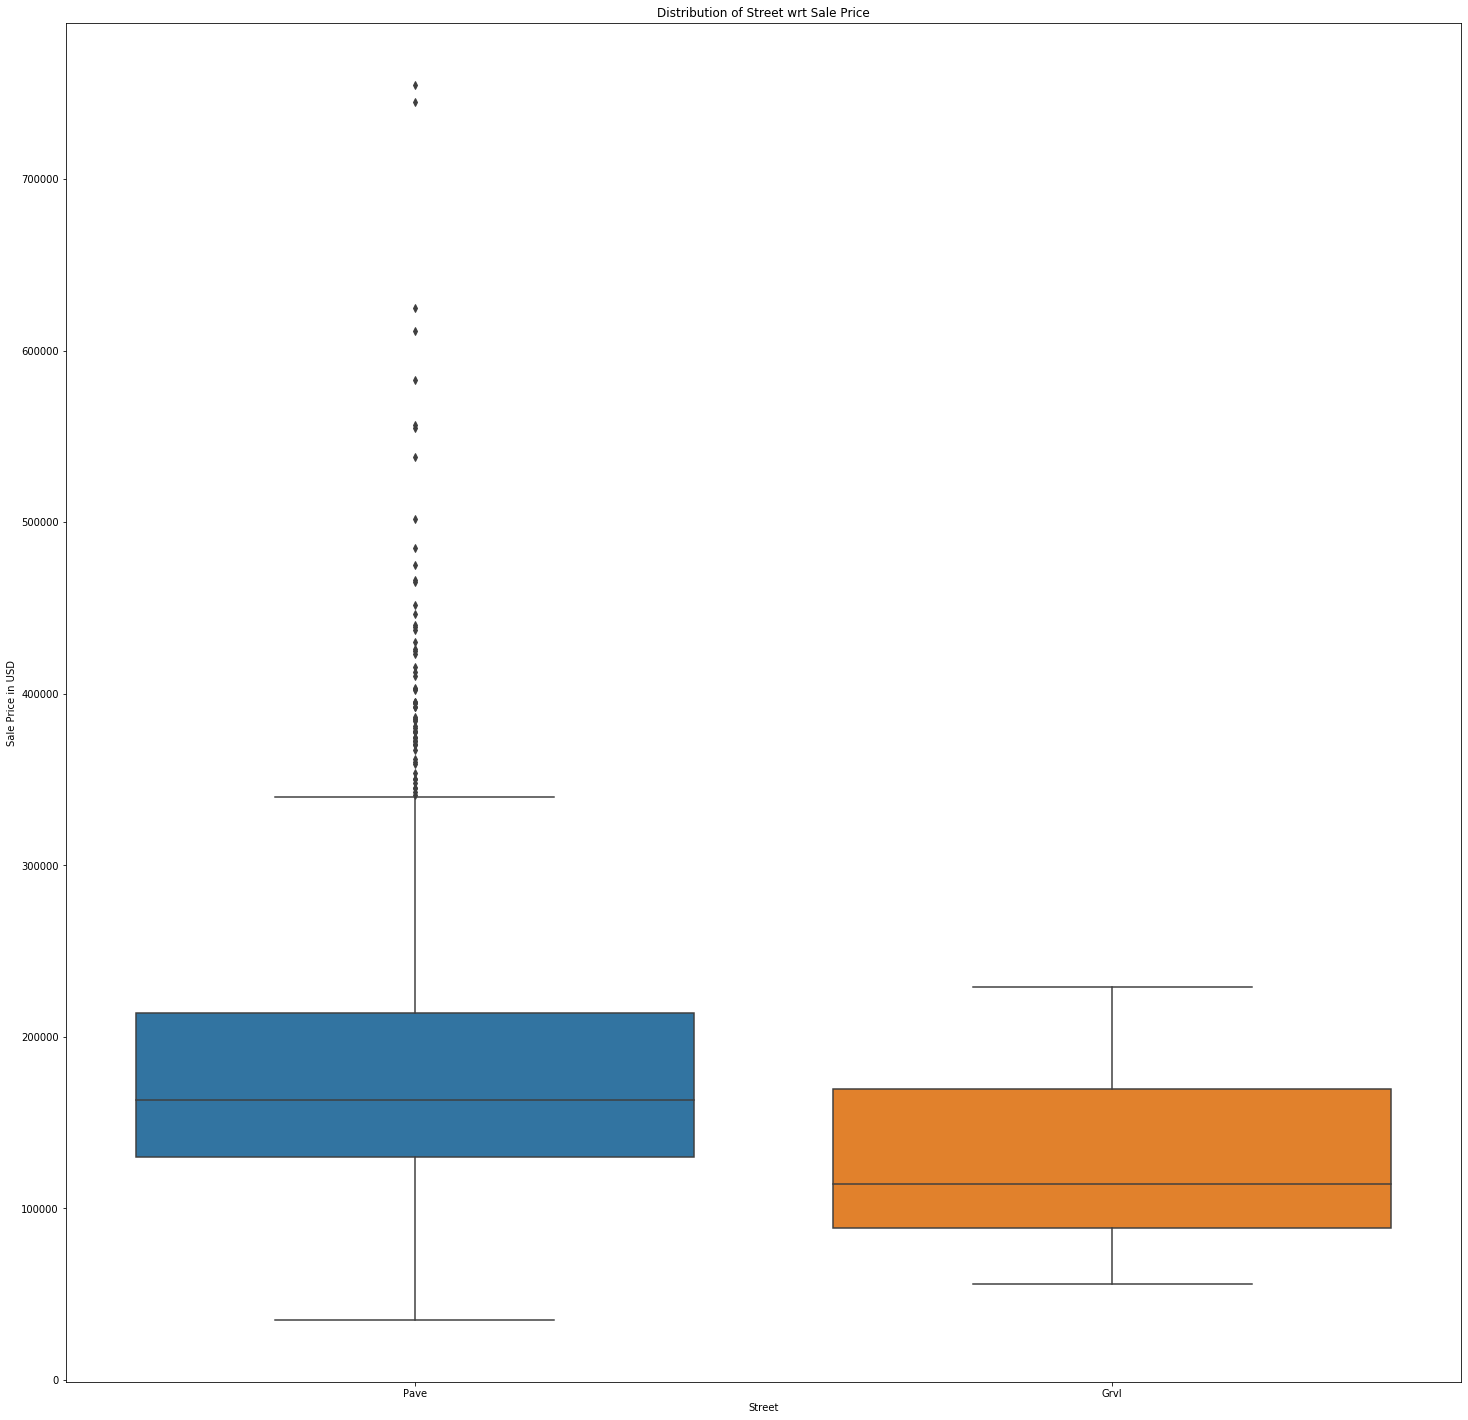

Least Occuring Value for the attribute - Street, is Grvl - Street


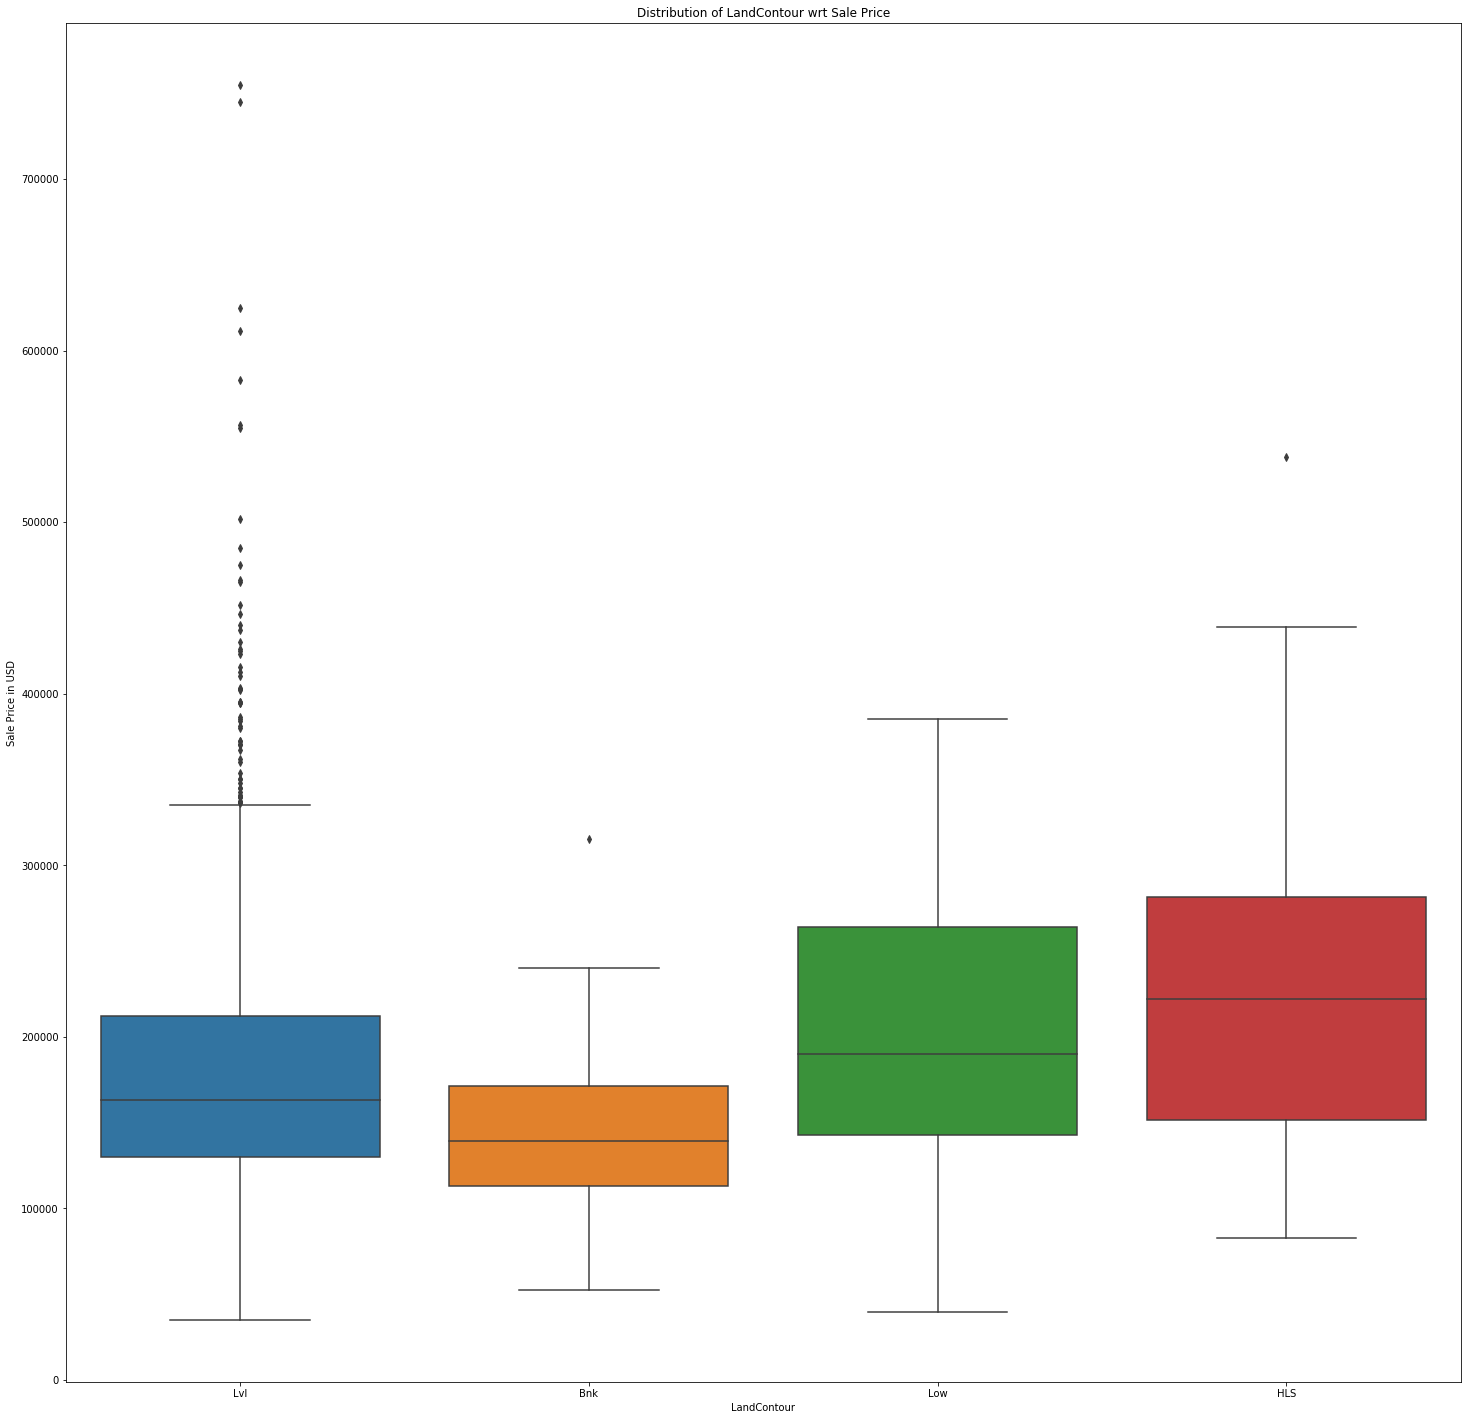

Least Occuring Value for the attribute - LandContour, is Low - LandContour


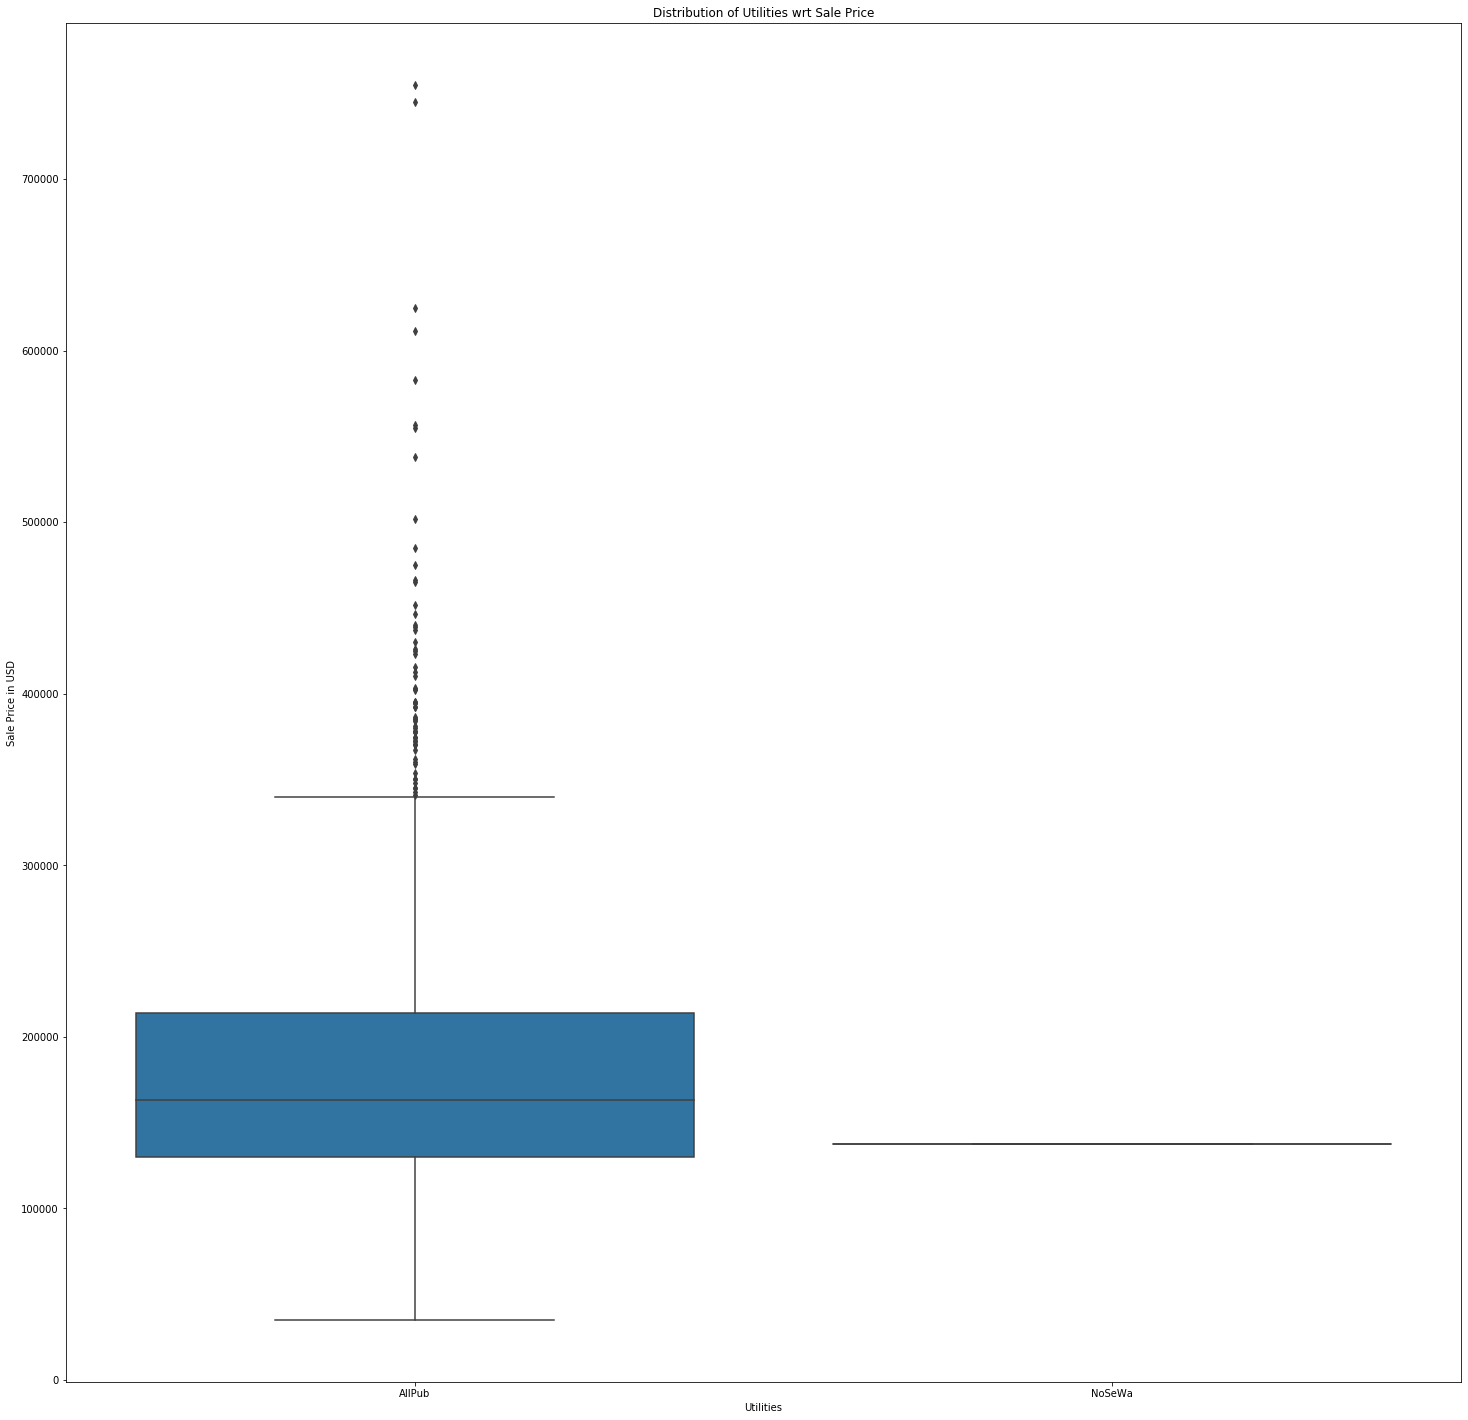

Least Occuring Value for the attribute - Utilities, is NoSeWa - Utilities


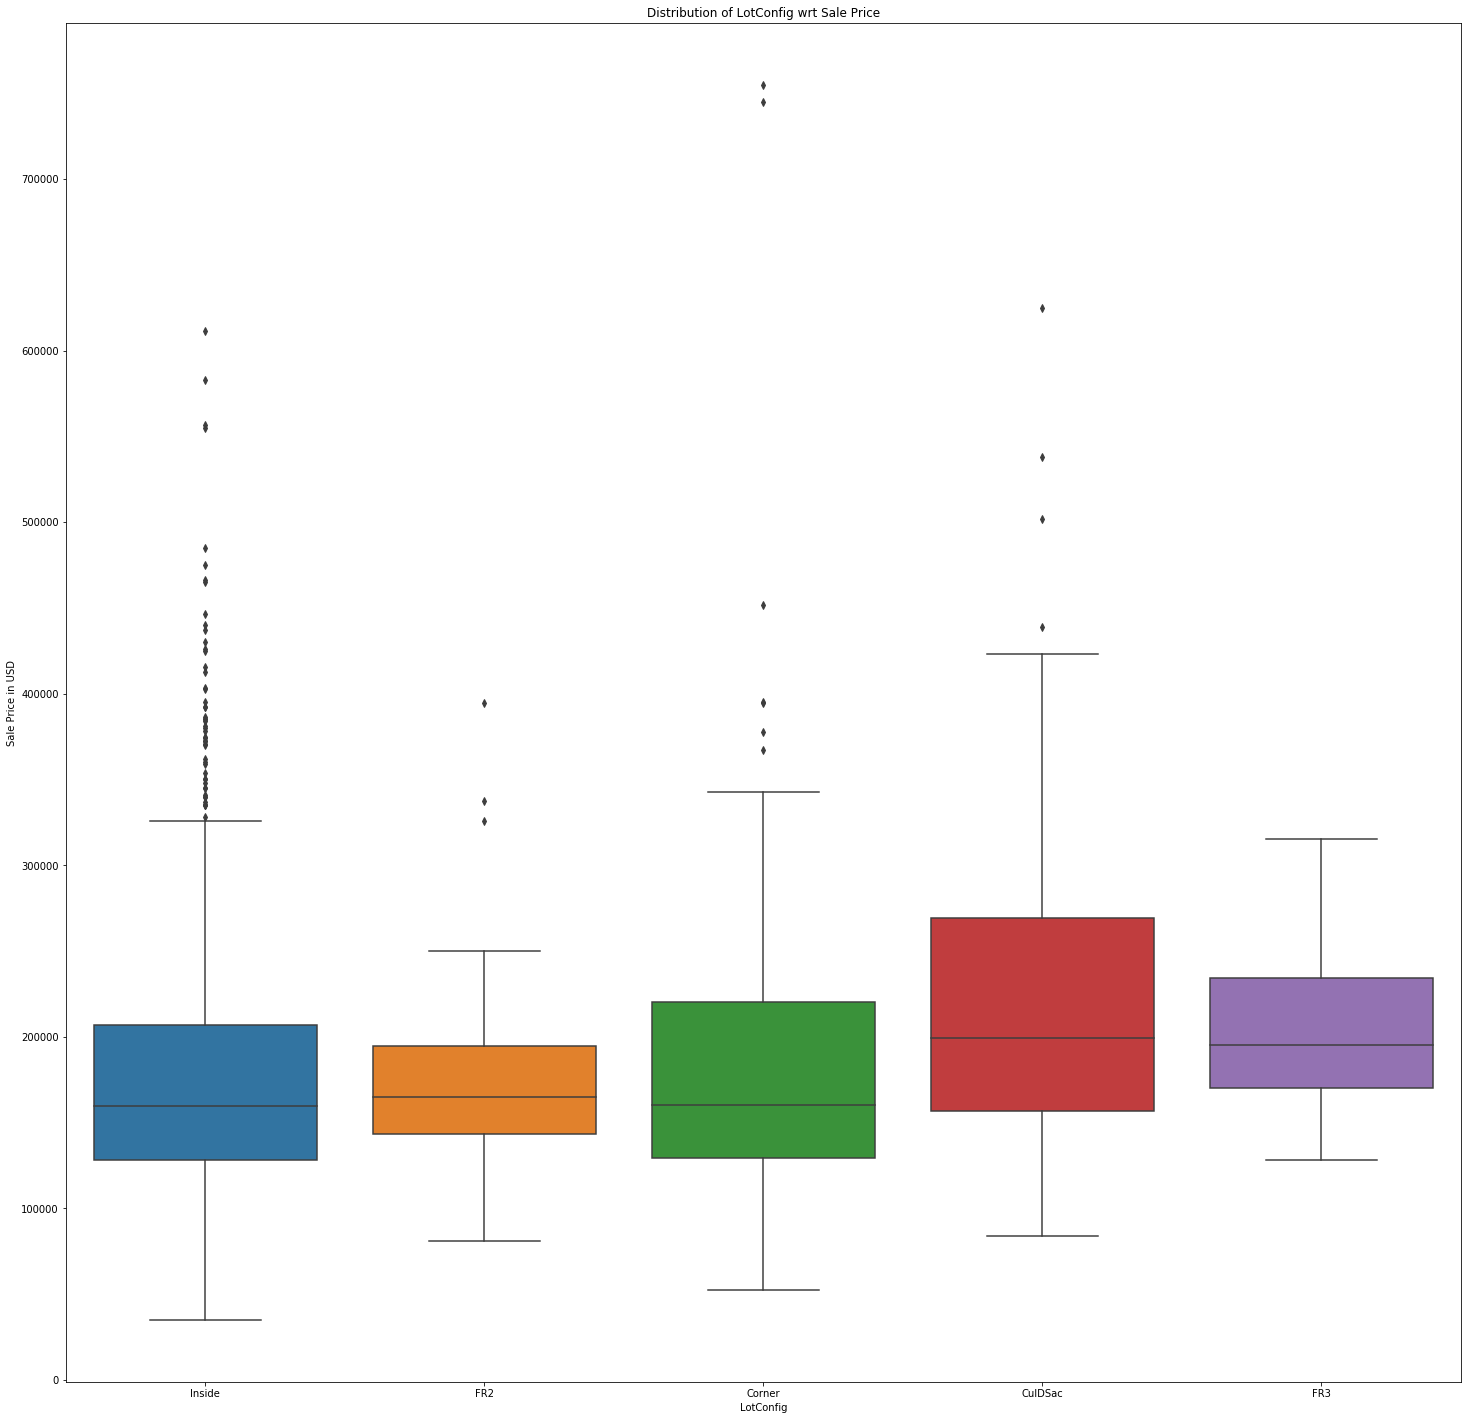

Least Occuring Value for the attribute - LotConfig, is FR3 - LotConfig


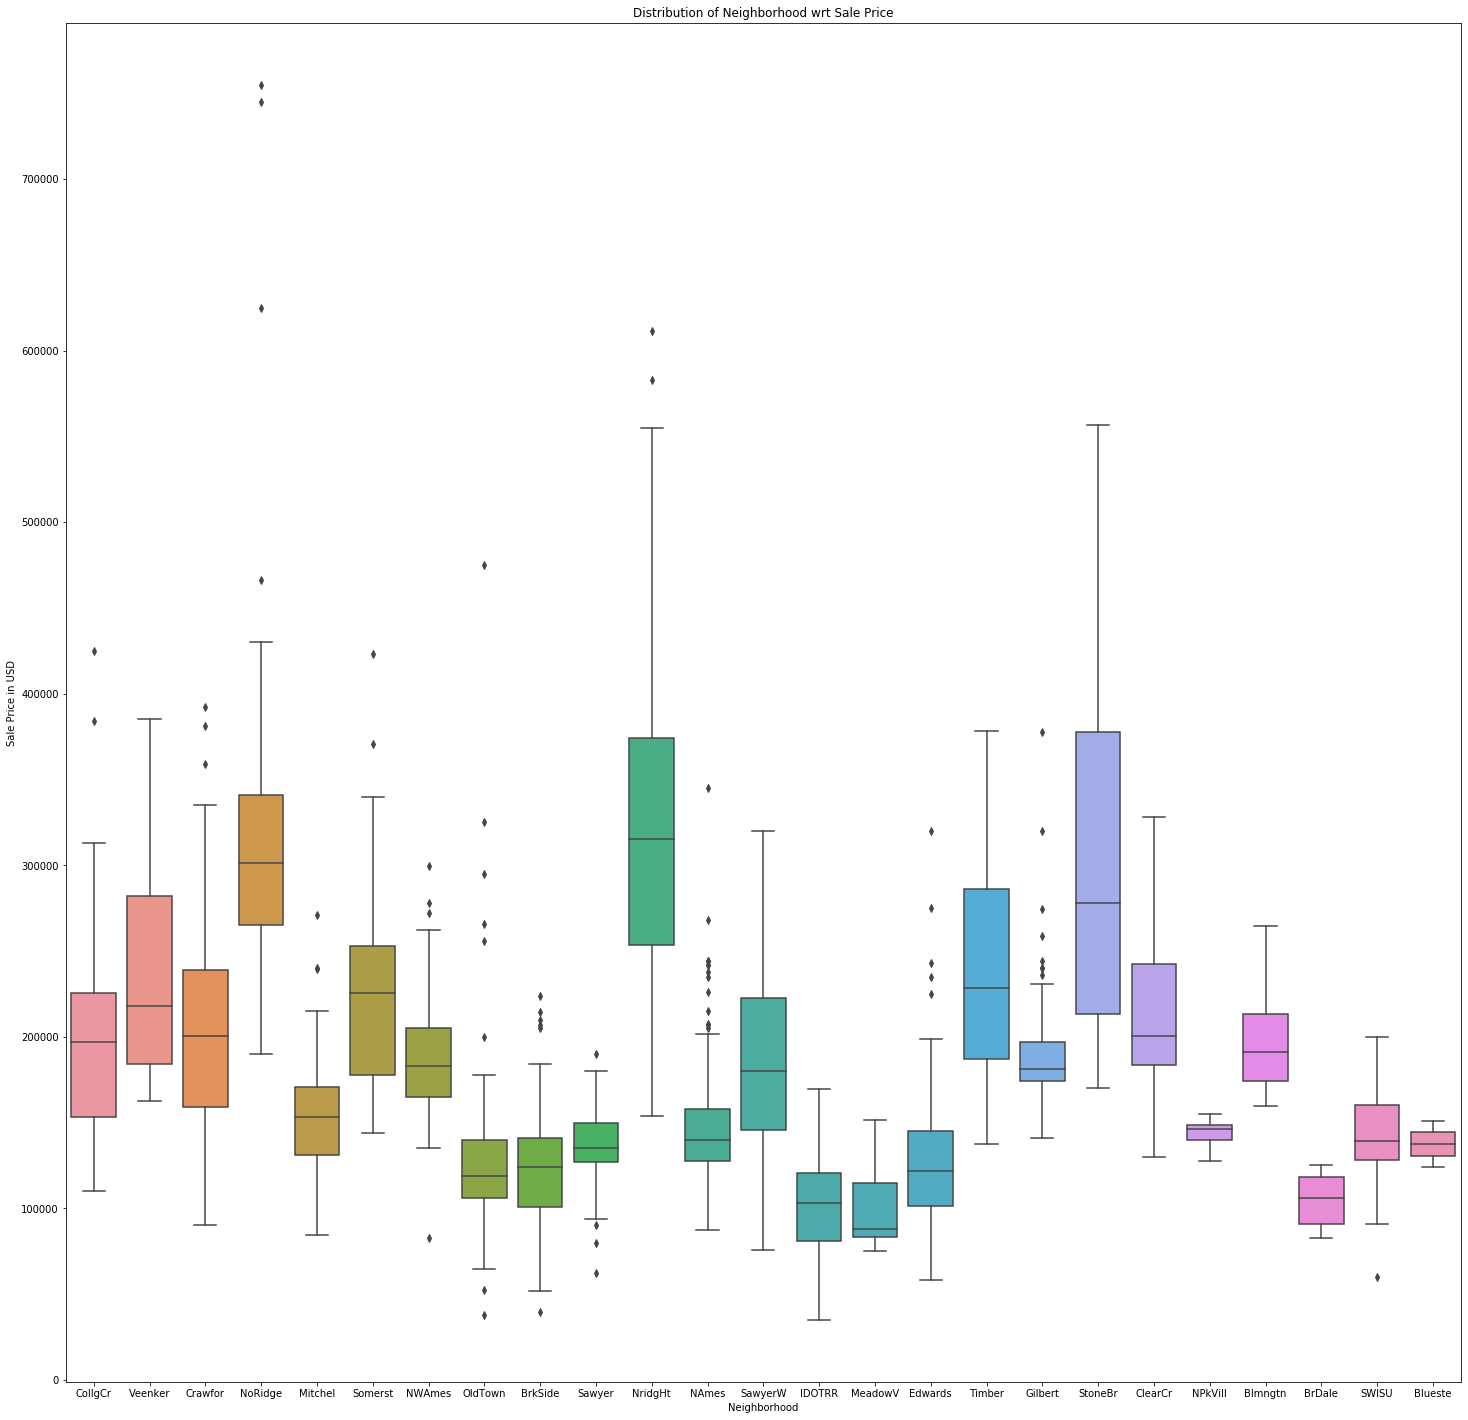

Least Occuring Value for the attribute - Neighborhood, is Blueste - Neighborhood


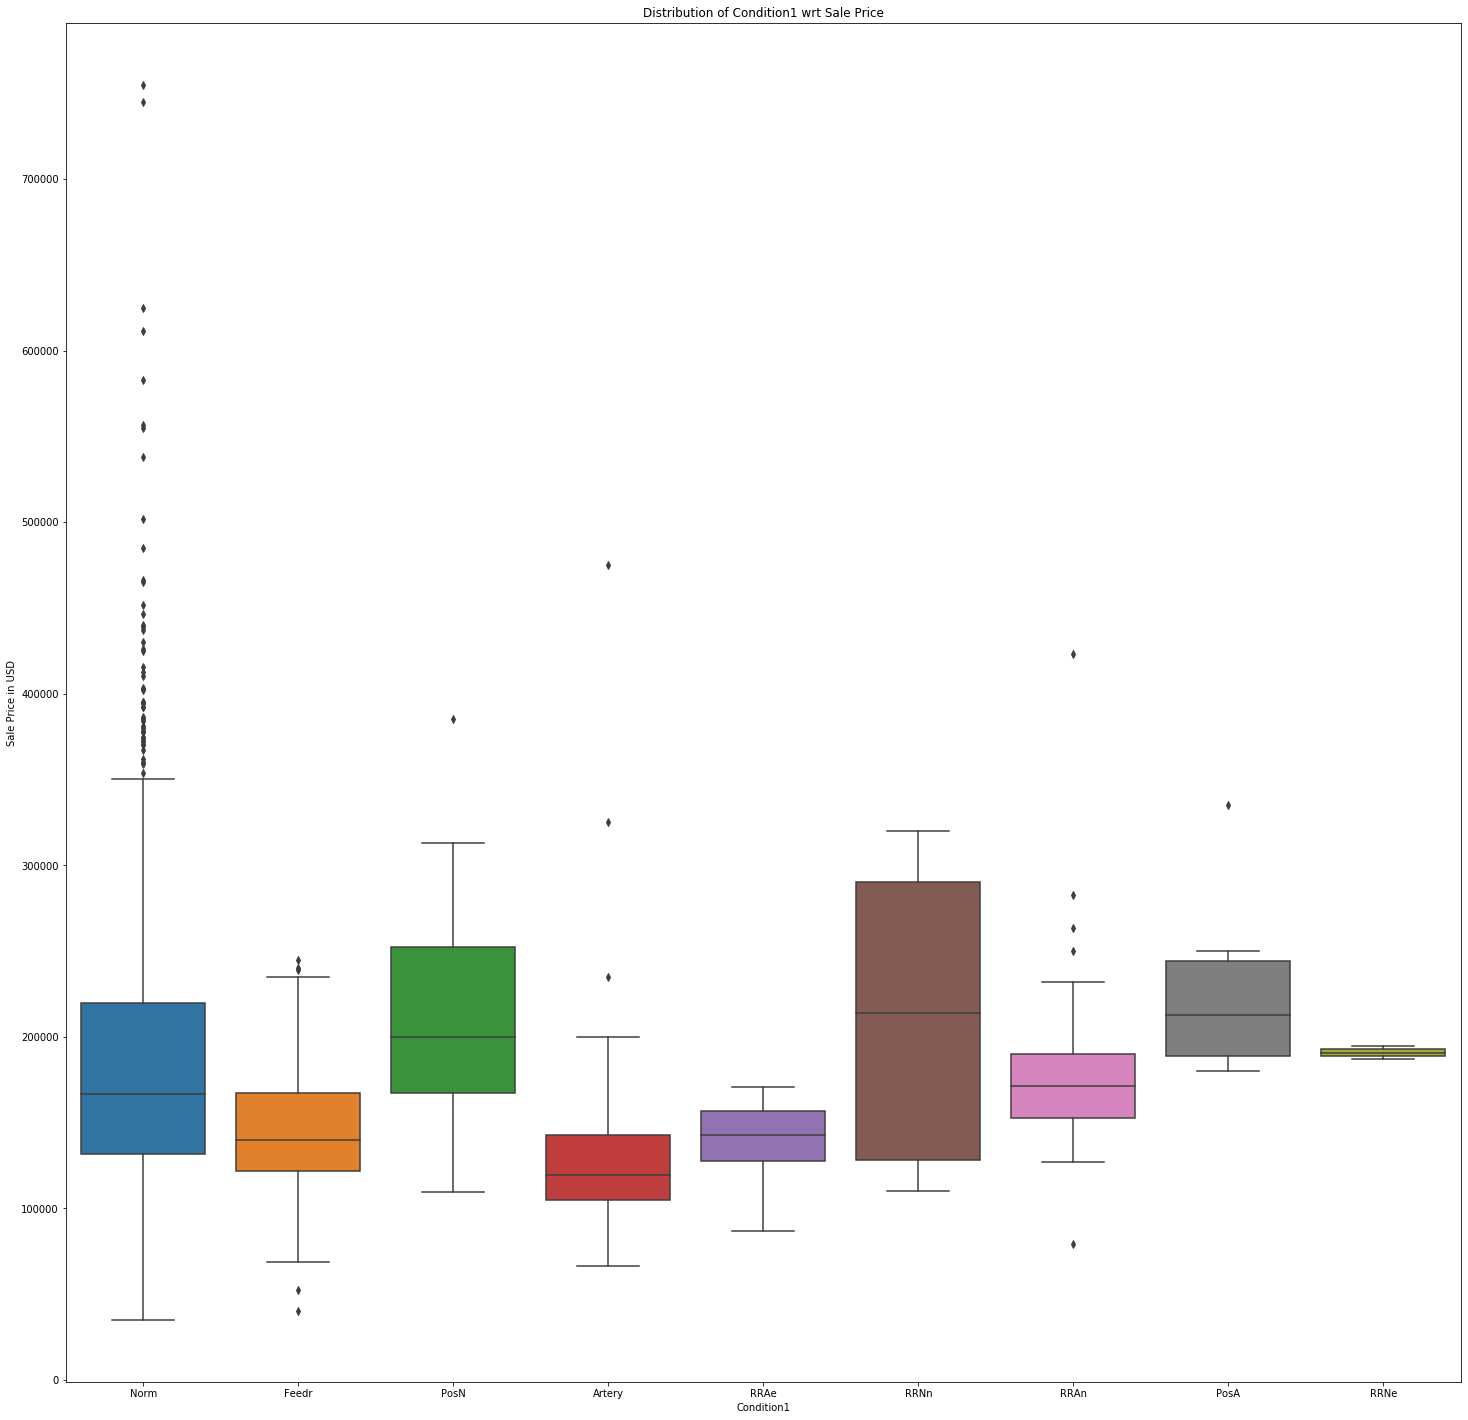

Least Occuring Value for the attribute - Condition1, is RRNe - Condition1


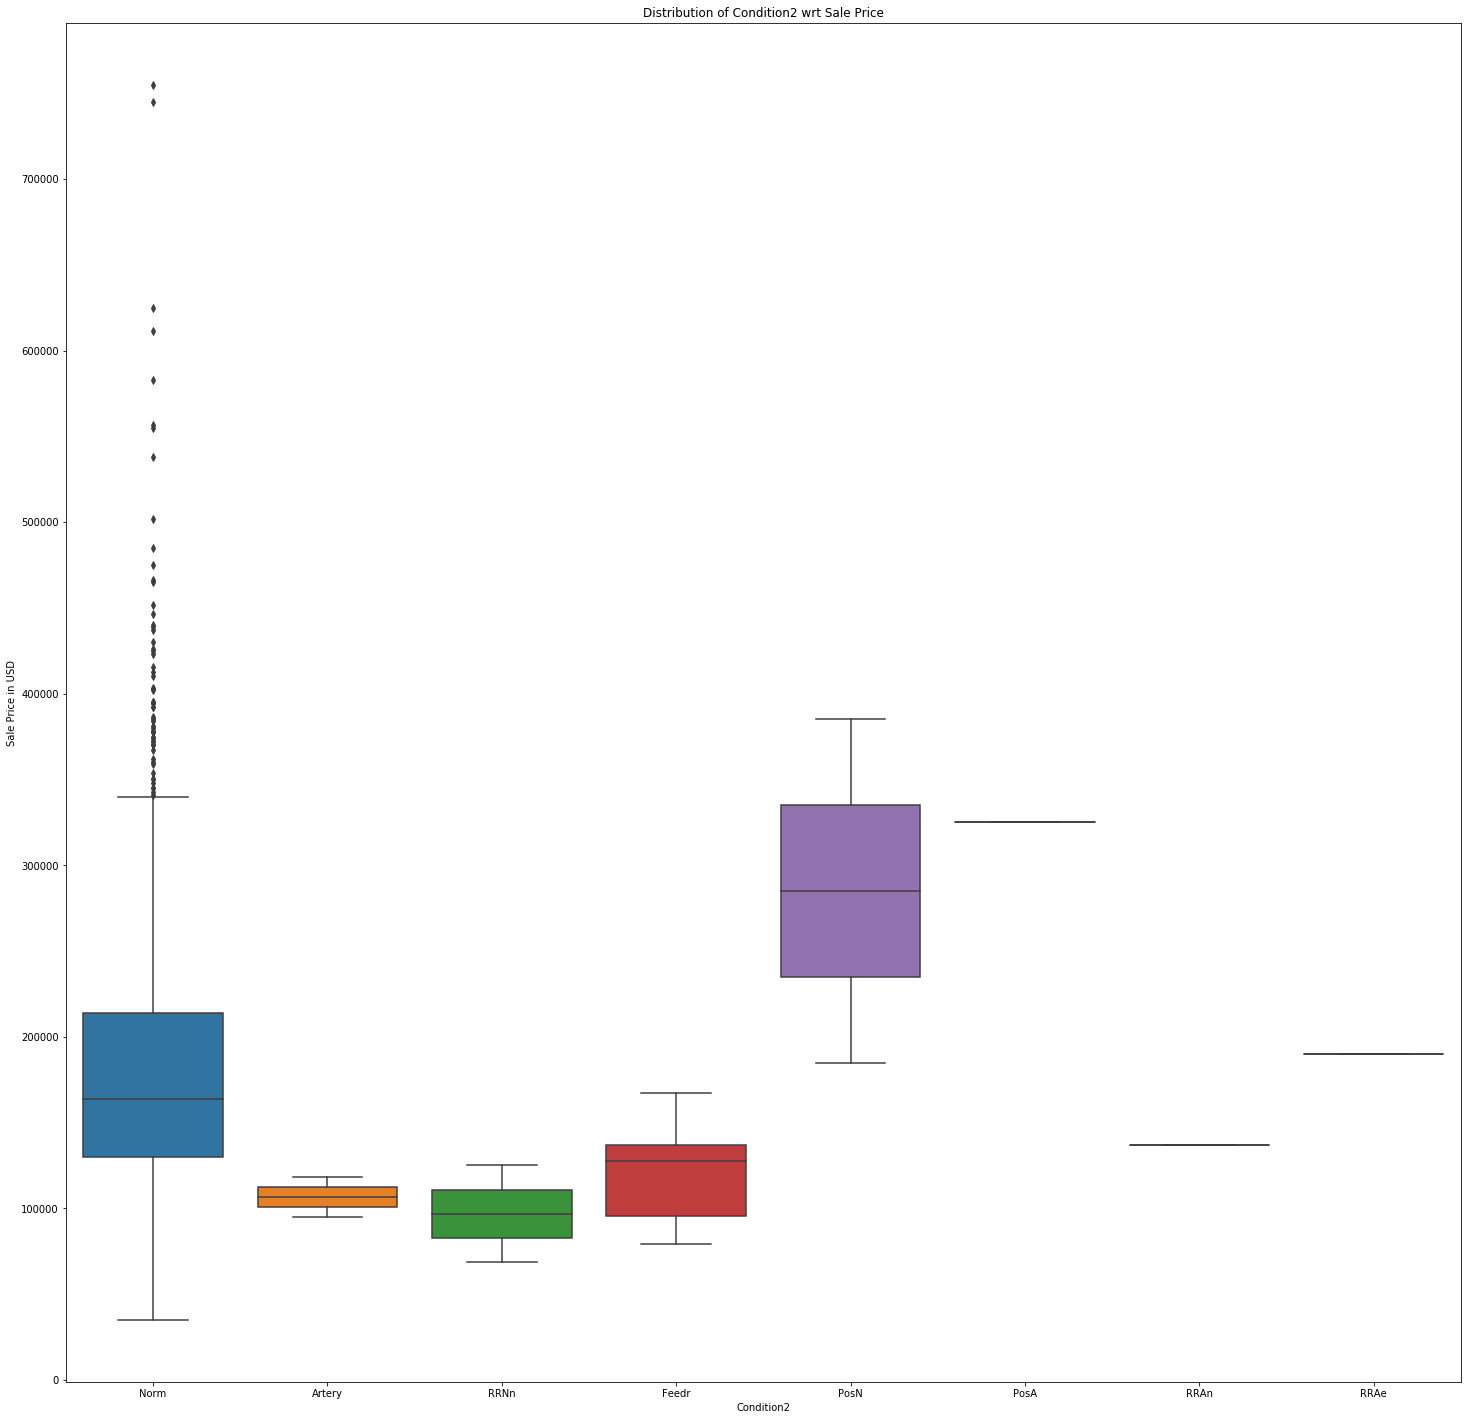

Least Occuring Value for the attribute - Condition2, is RRAn - Condition2


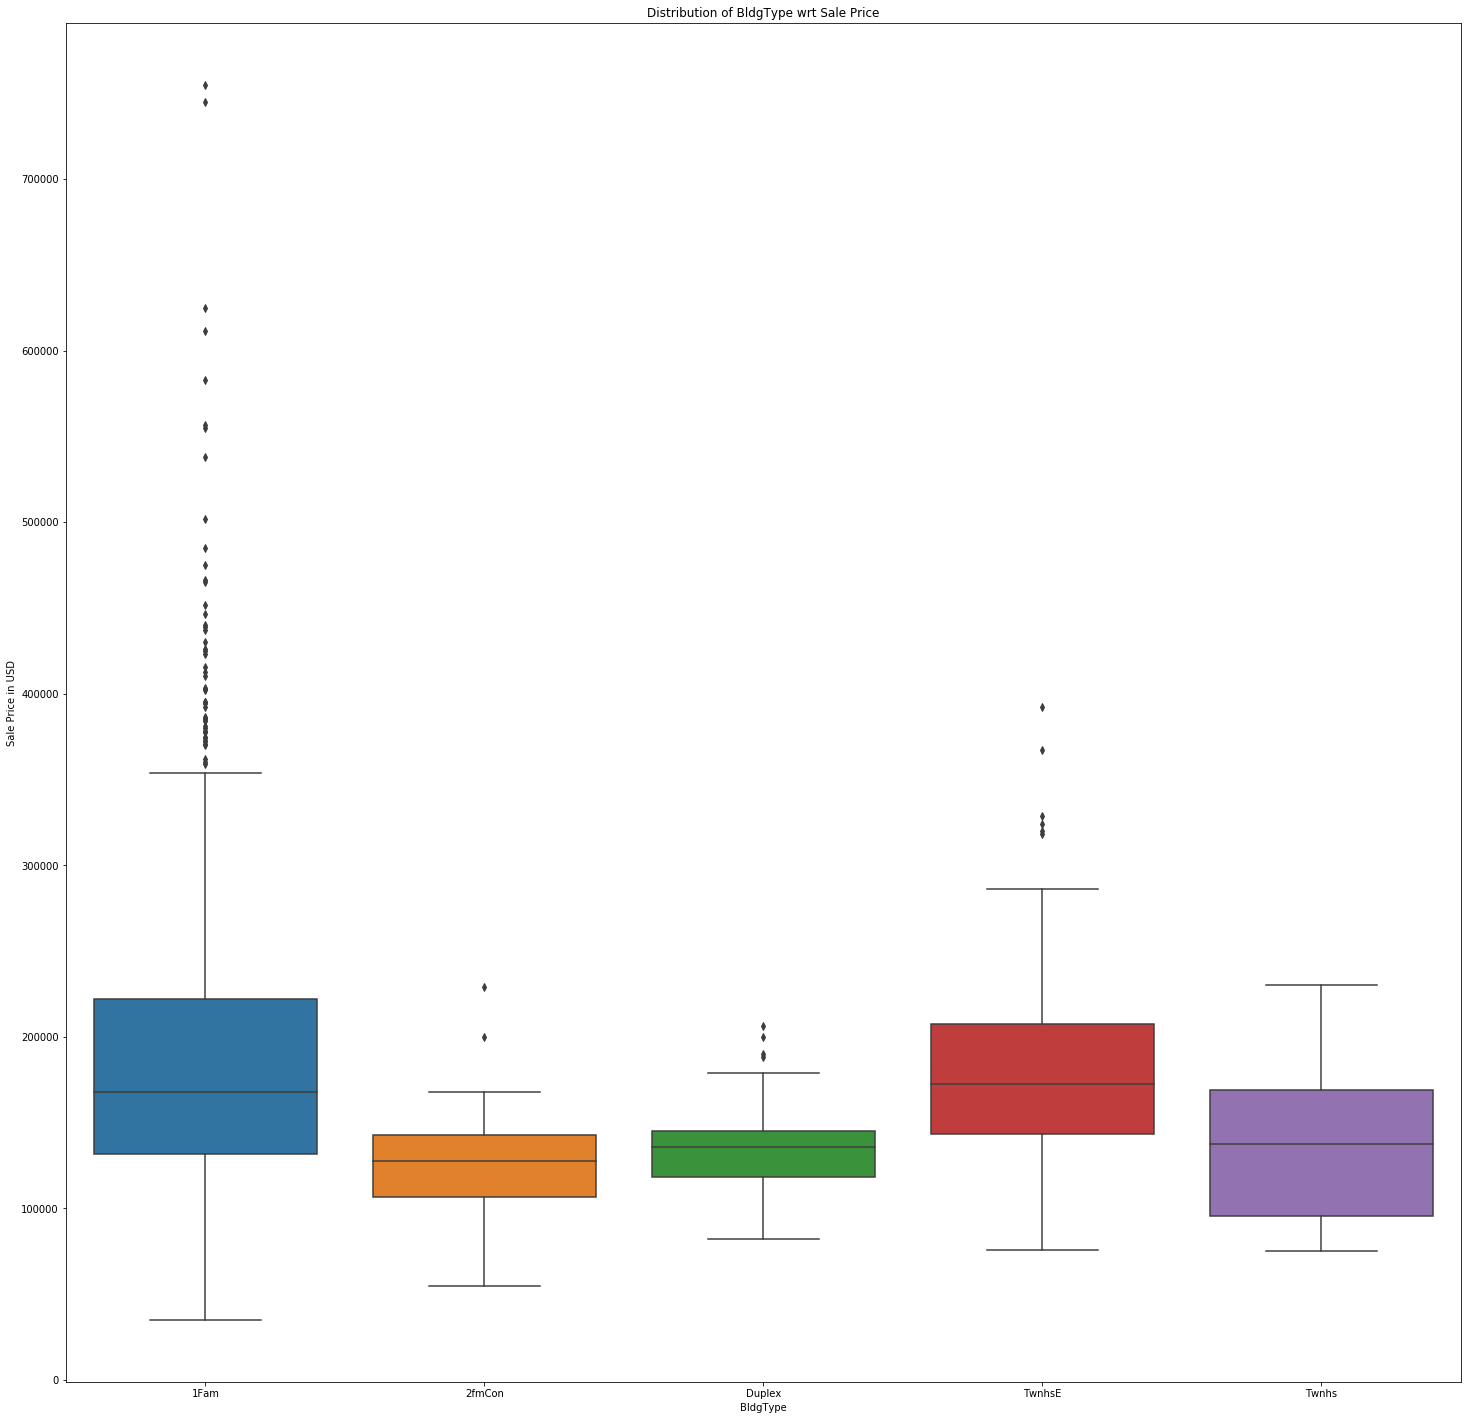

Least Occuring Value for the attribute - BldgType, is 2fmCon - BldgType


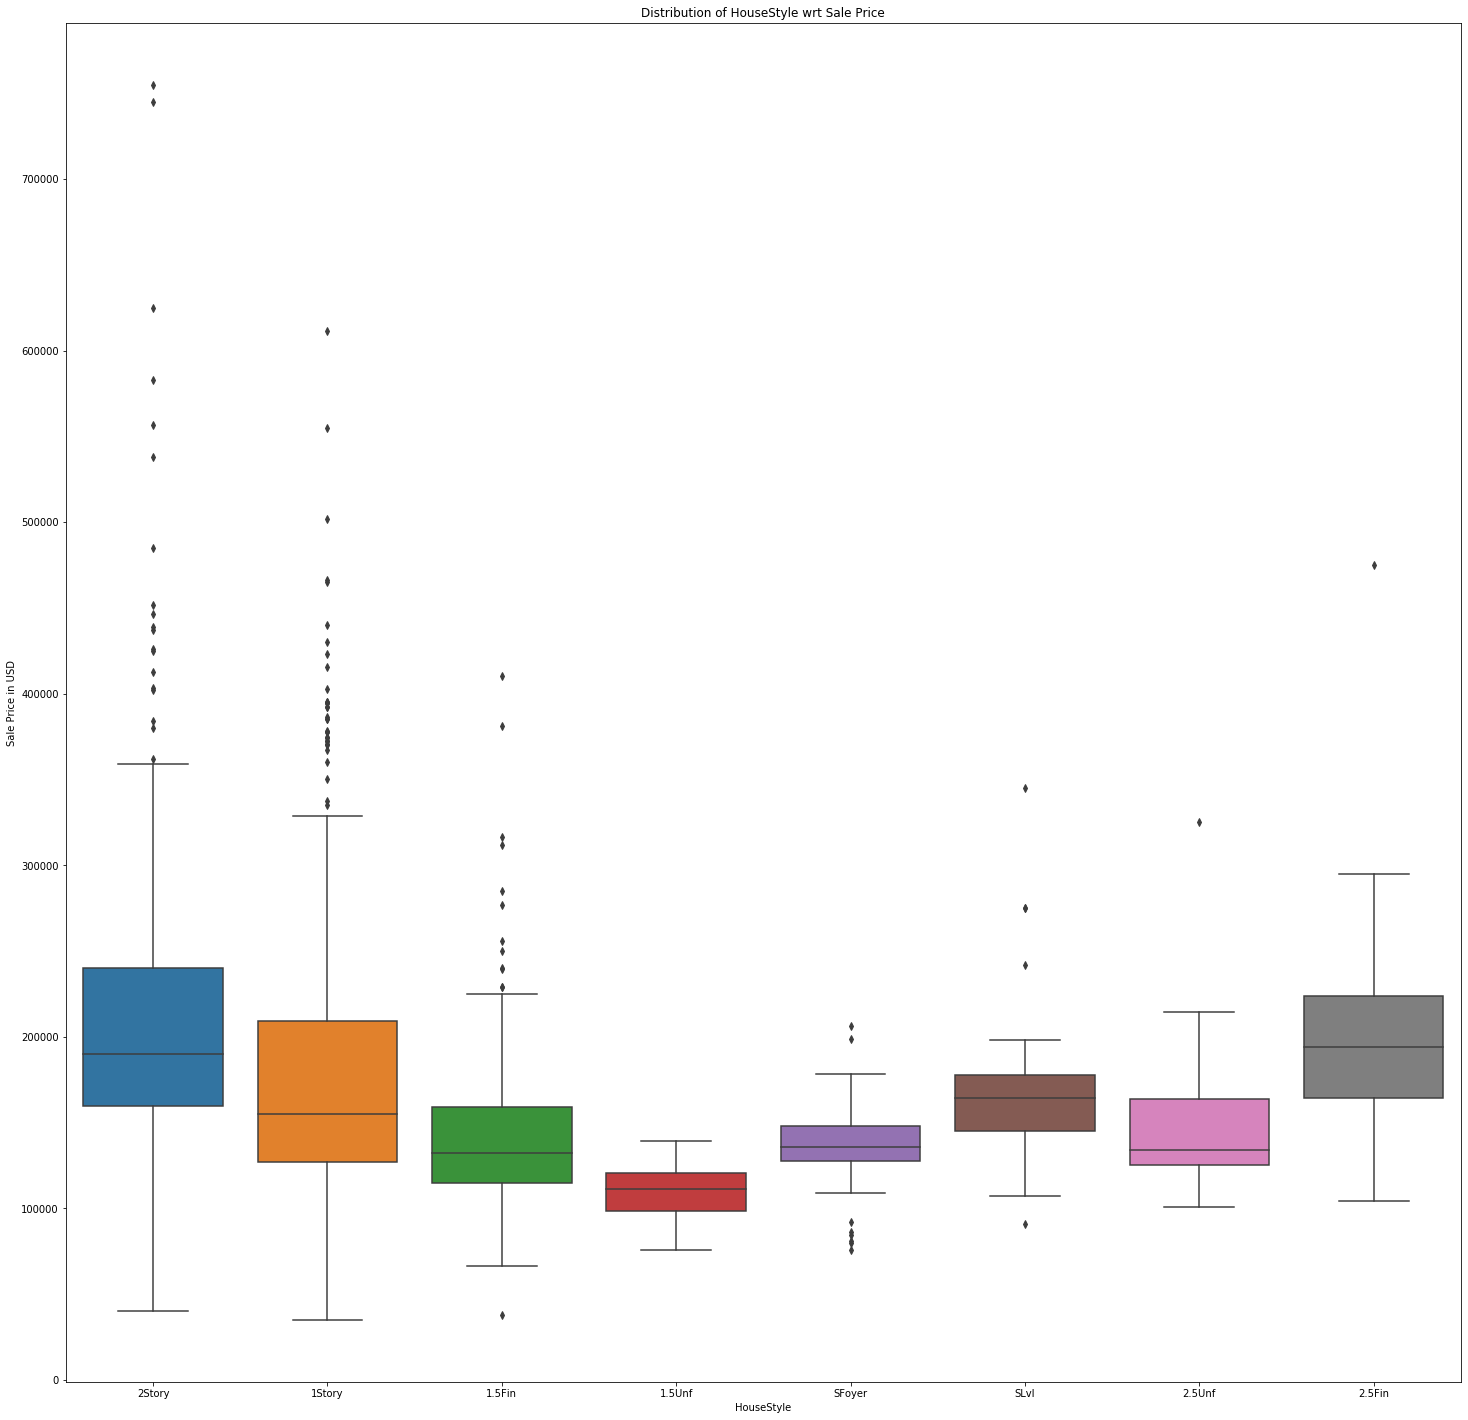

Least Occuring Value for the attribute - HouseStyle, is 2.5Fin - HouseStyle


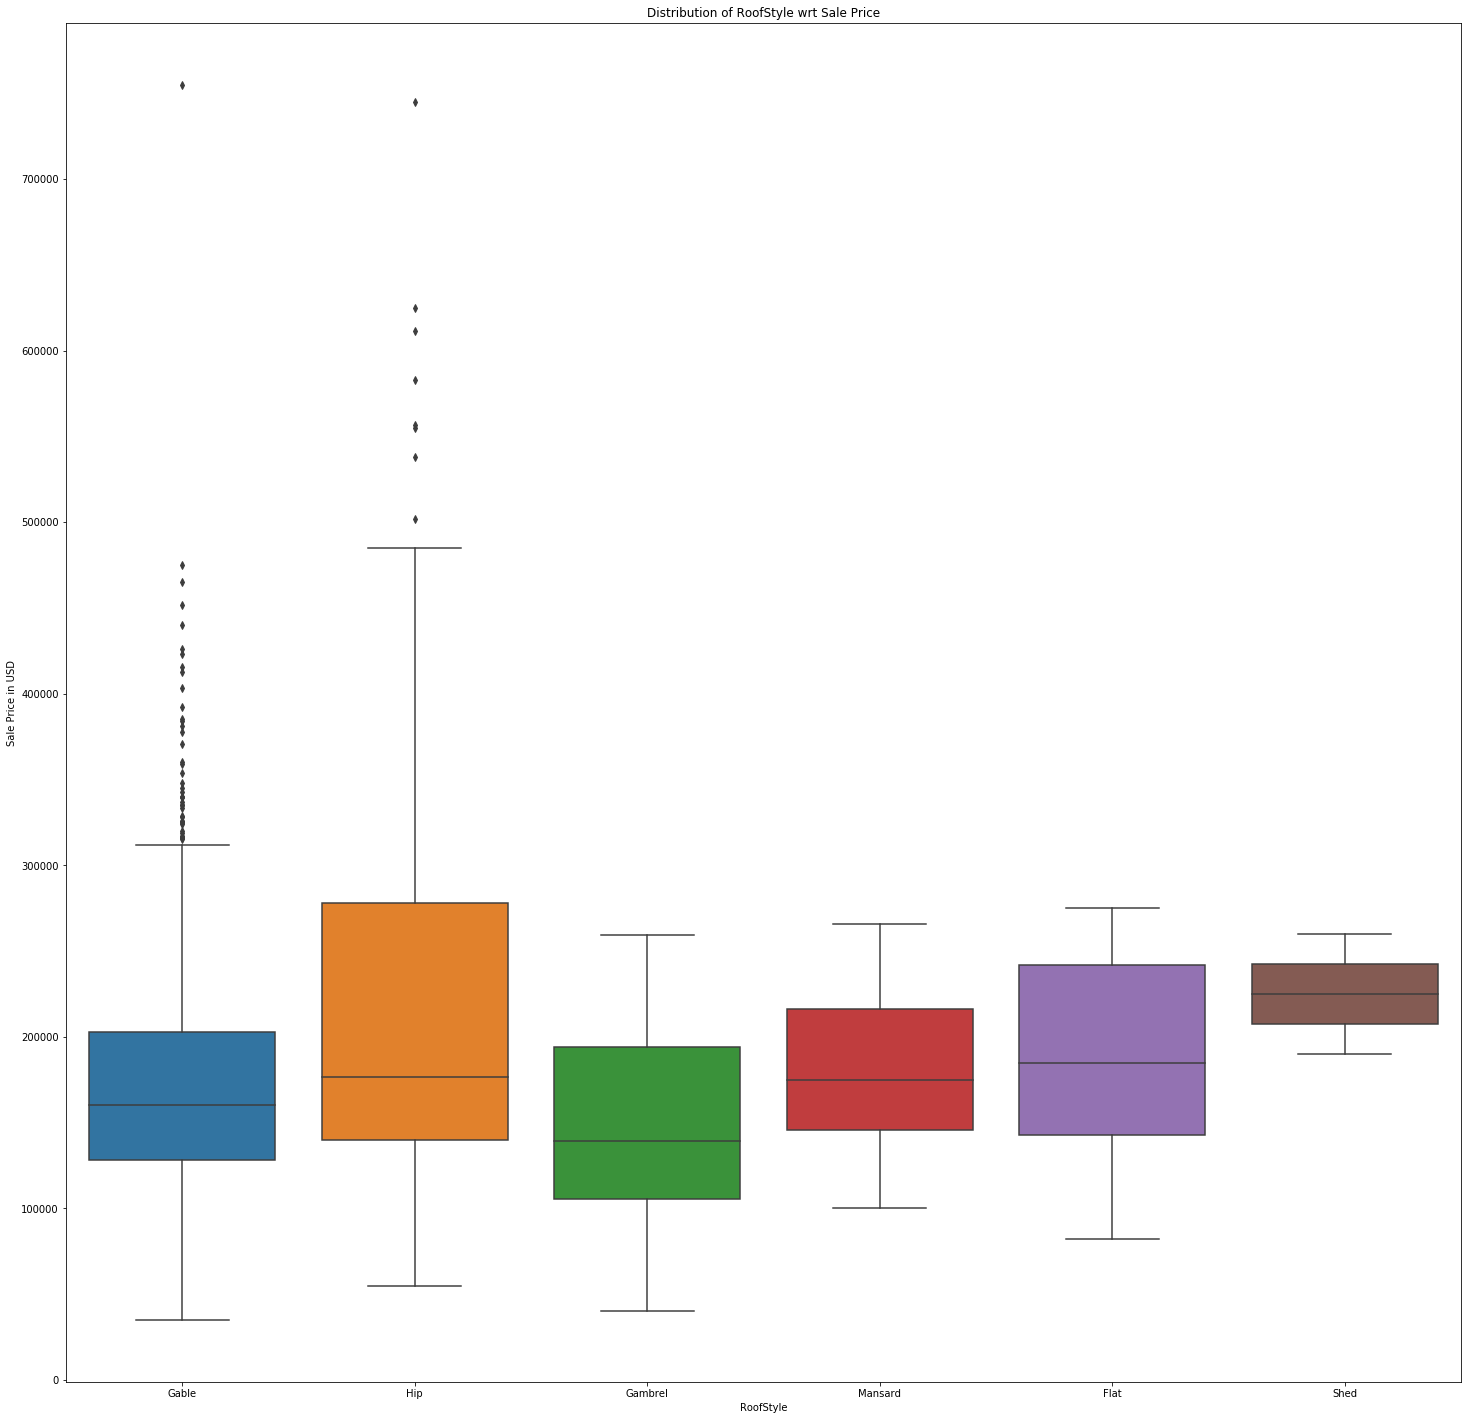

Least Occuring Value for the attribute - RoofStyle, is Shed - RoofStyle


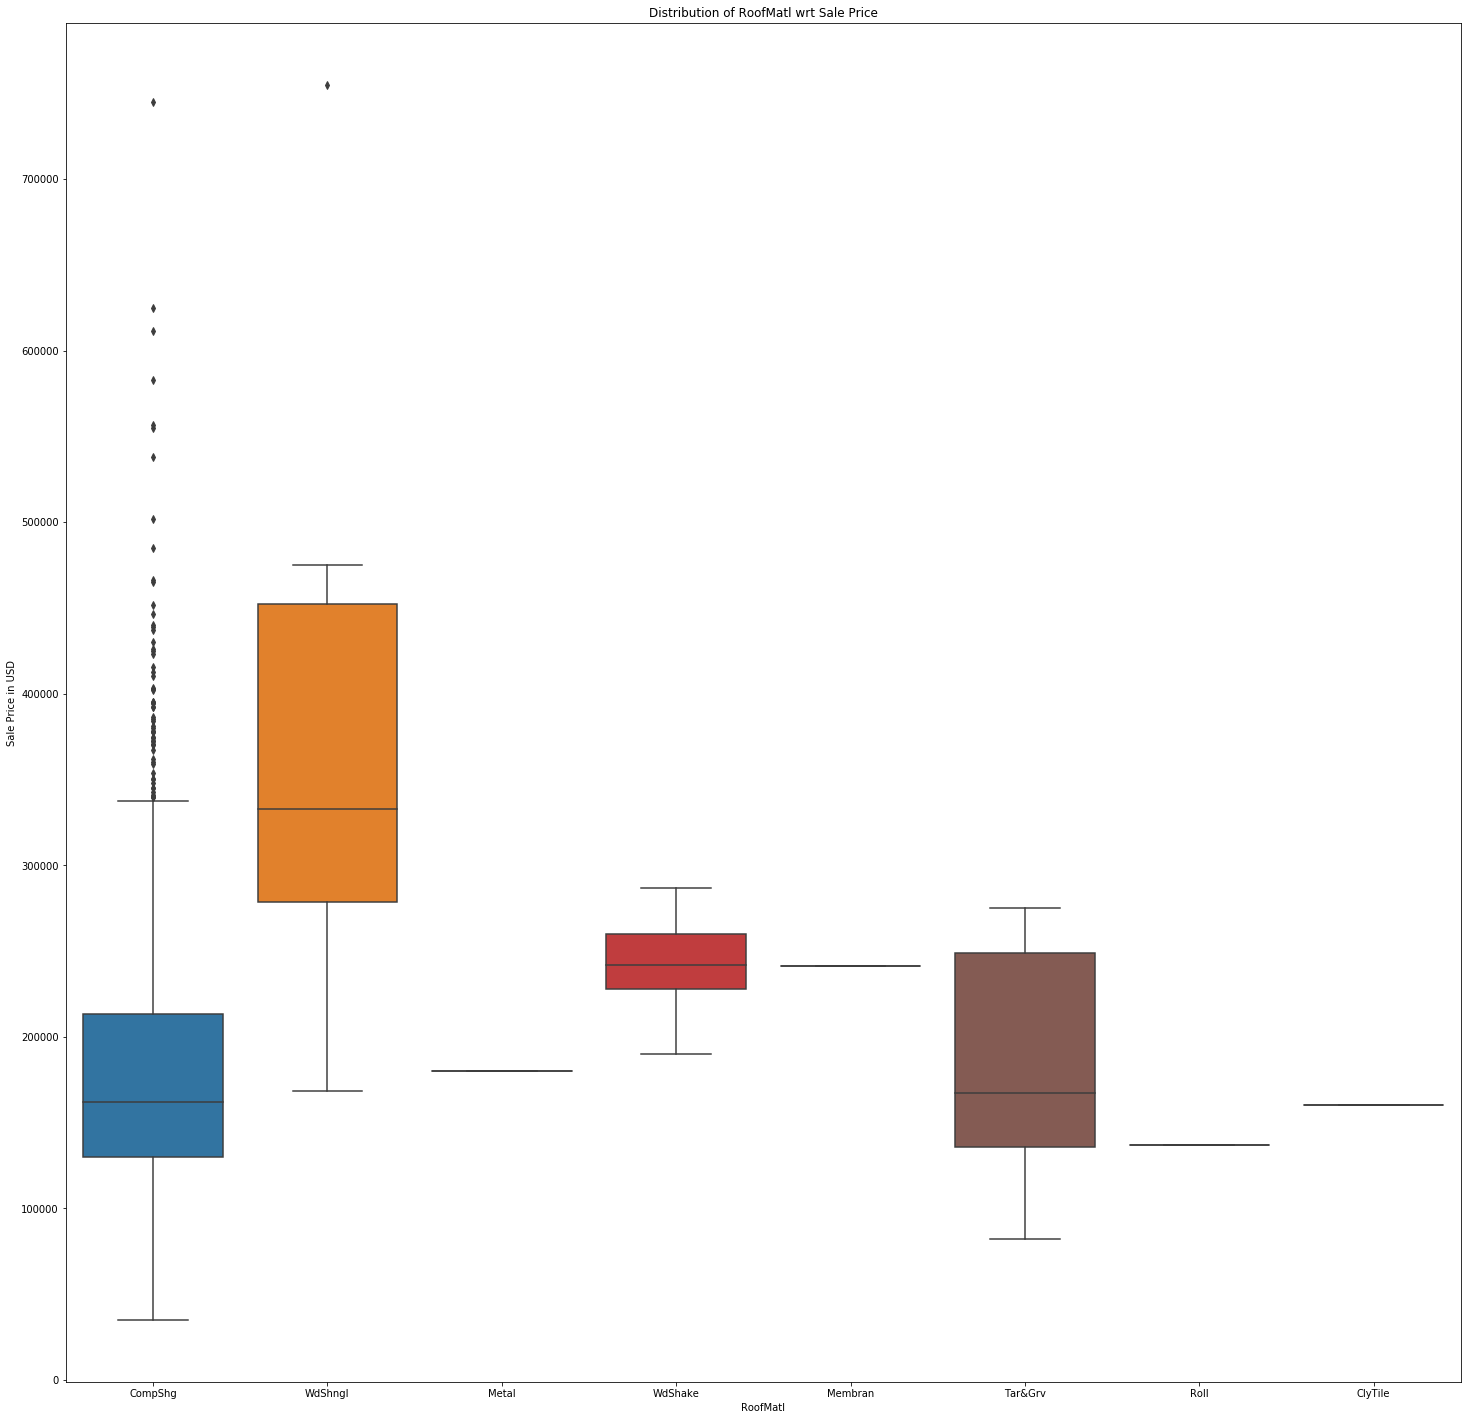

Least Occuring Value for the attribute - RoofMatl, is Metal - RoofMatl


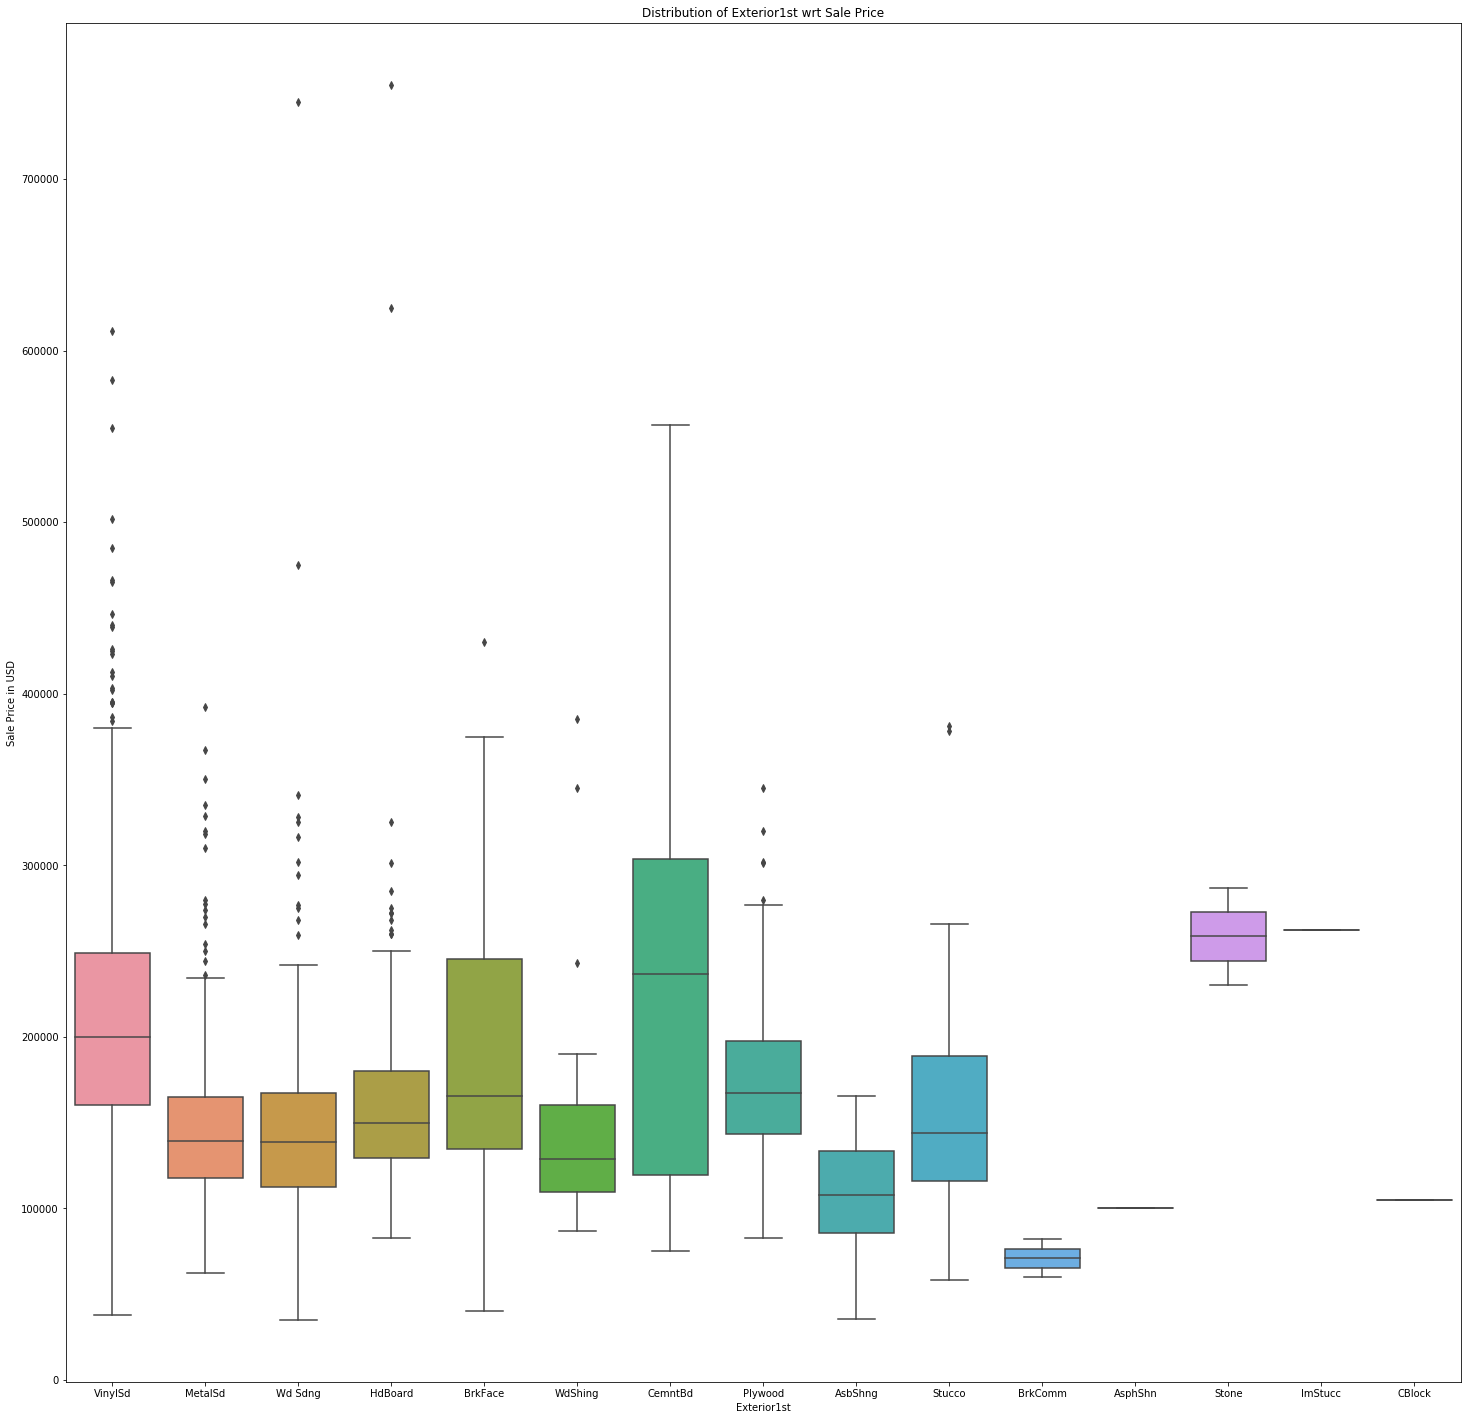

Least Occuring Value for the attribute - Exterior1st, is AsphShn - Exterior1st


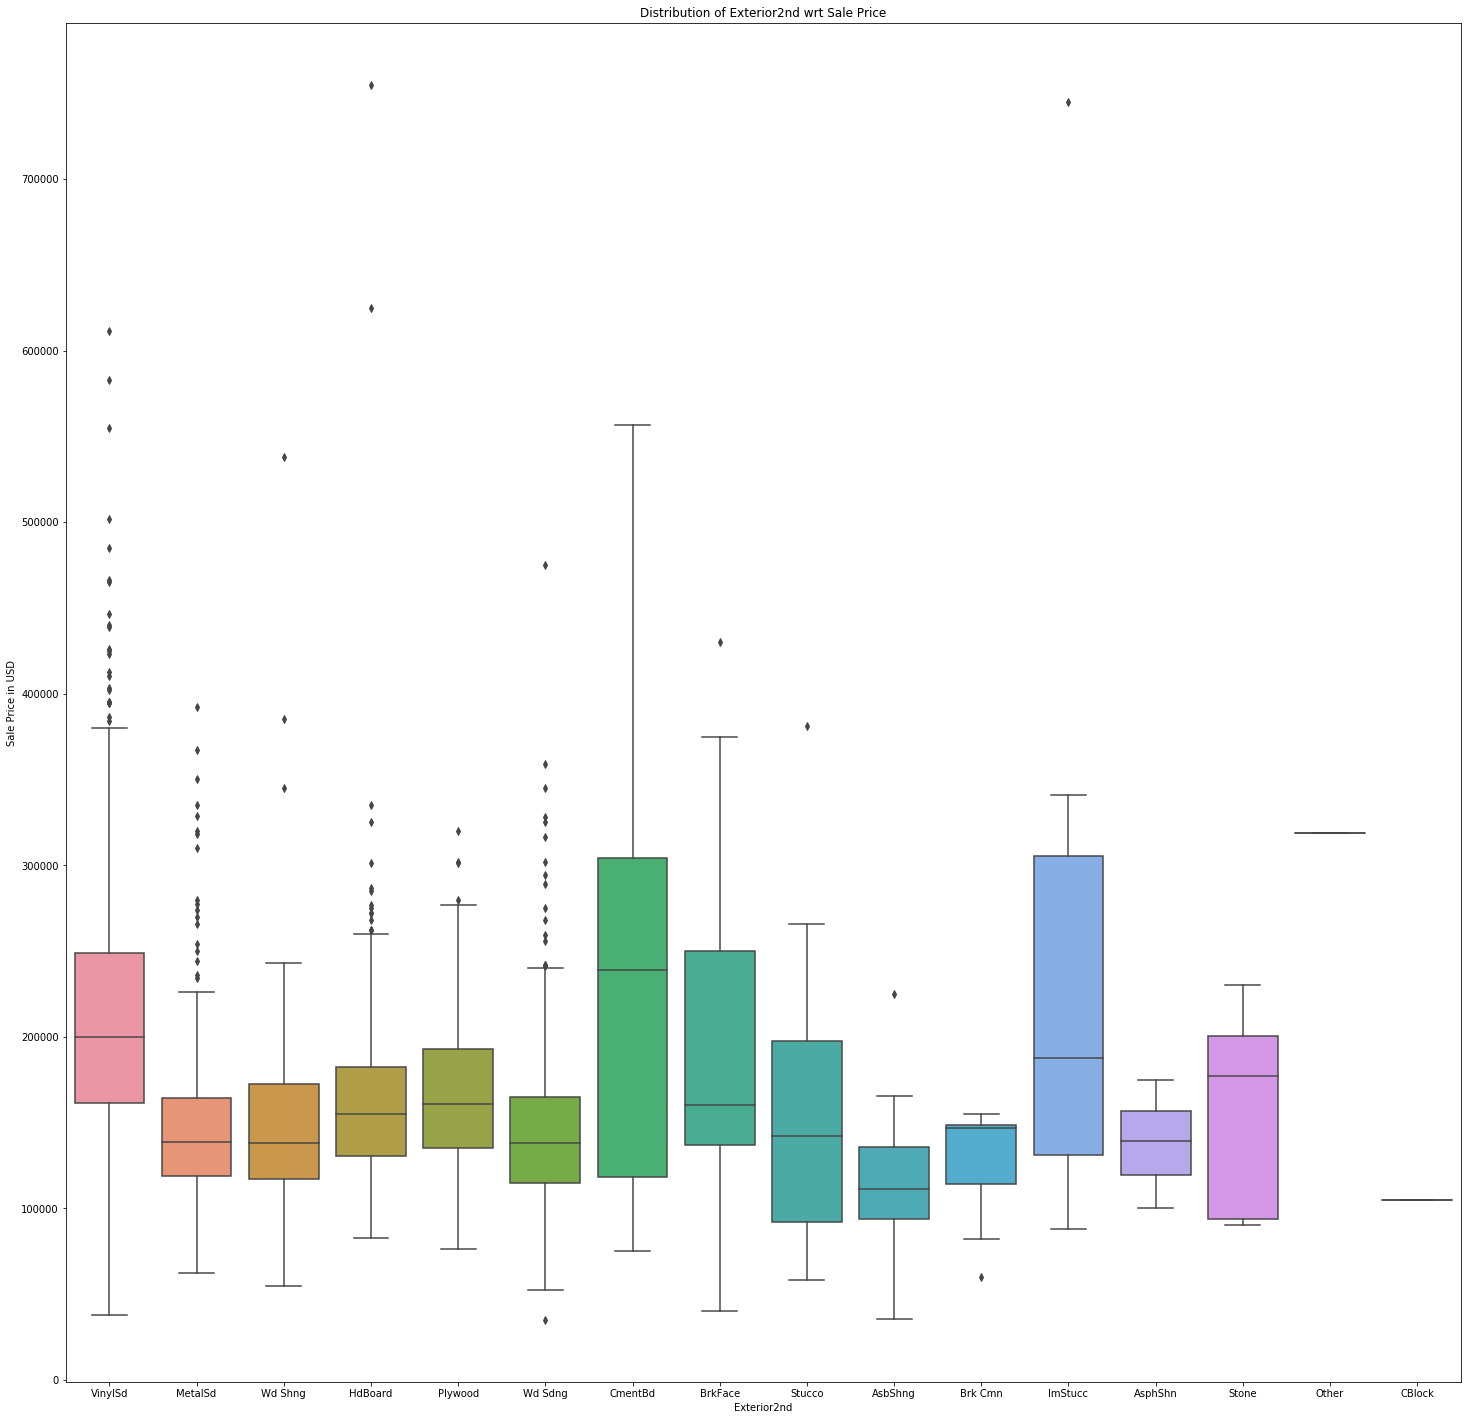

Least Occuring Value for the attribute - Exterior2nd, is CBlock - Exterior2nd


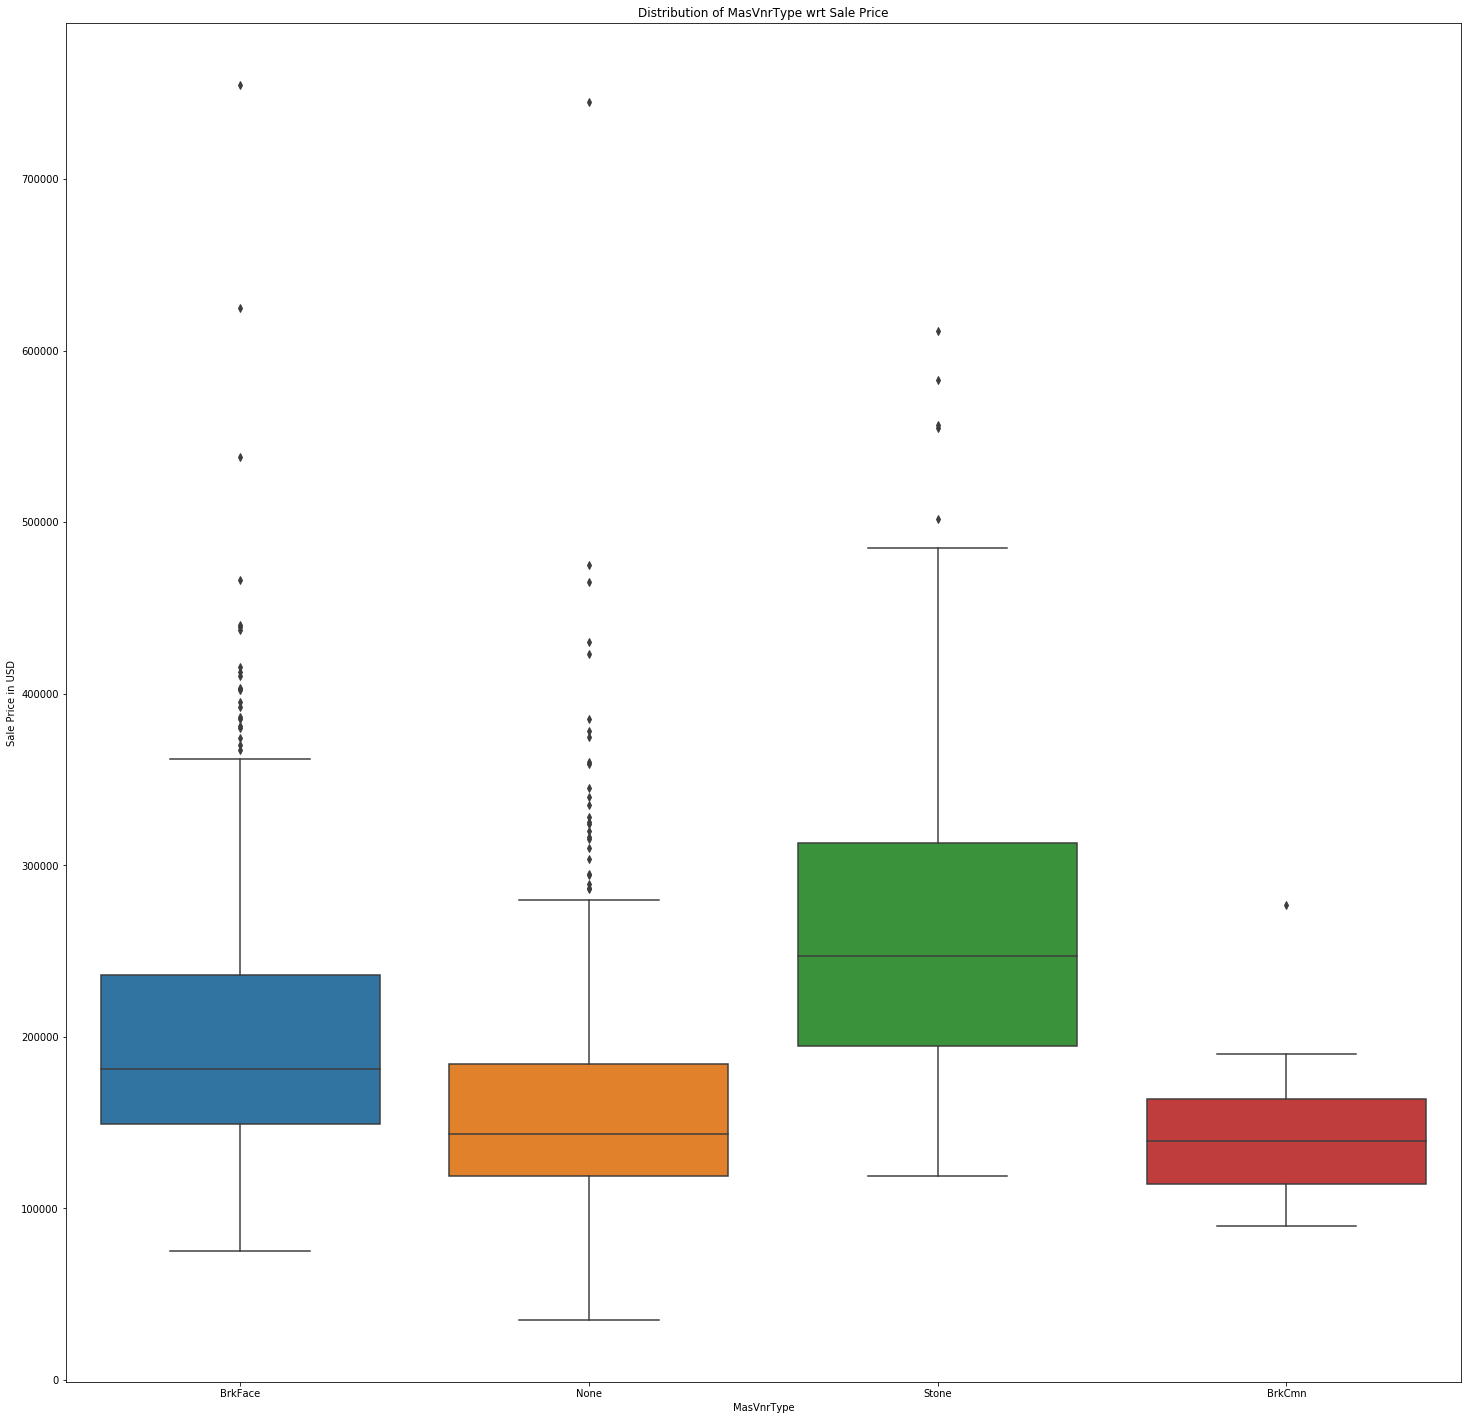

Least Occuring Value for the attribute - MasVnrType, is BrkCmn - MasVnrType


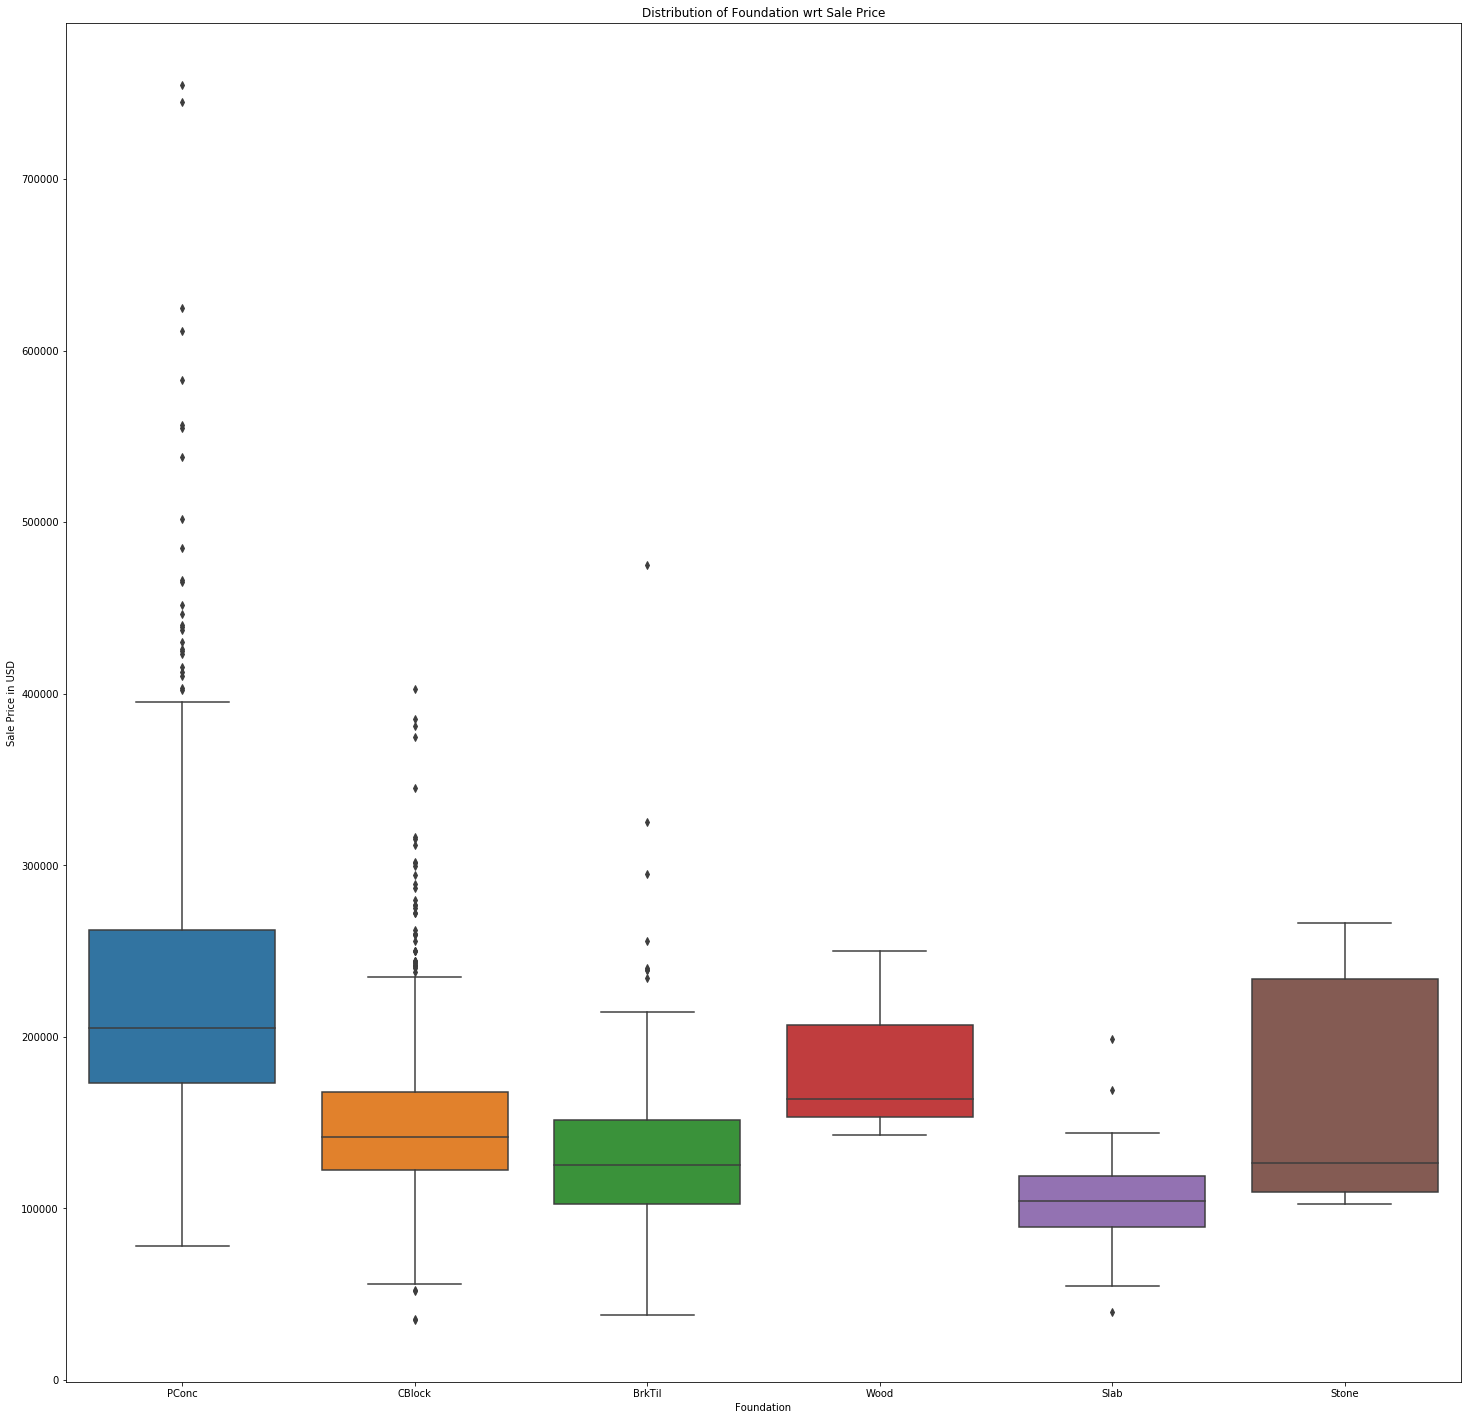

Least Occuring Value for the attribute - Foundation, is Wood - Foundation


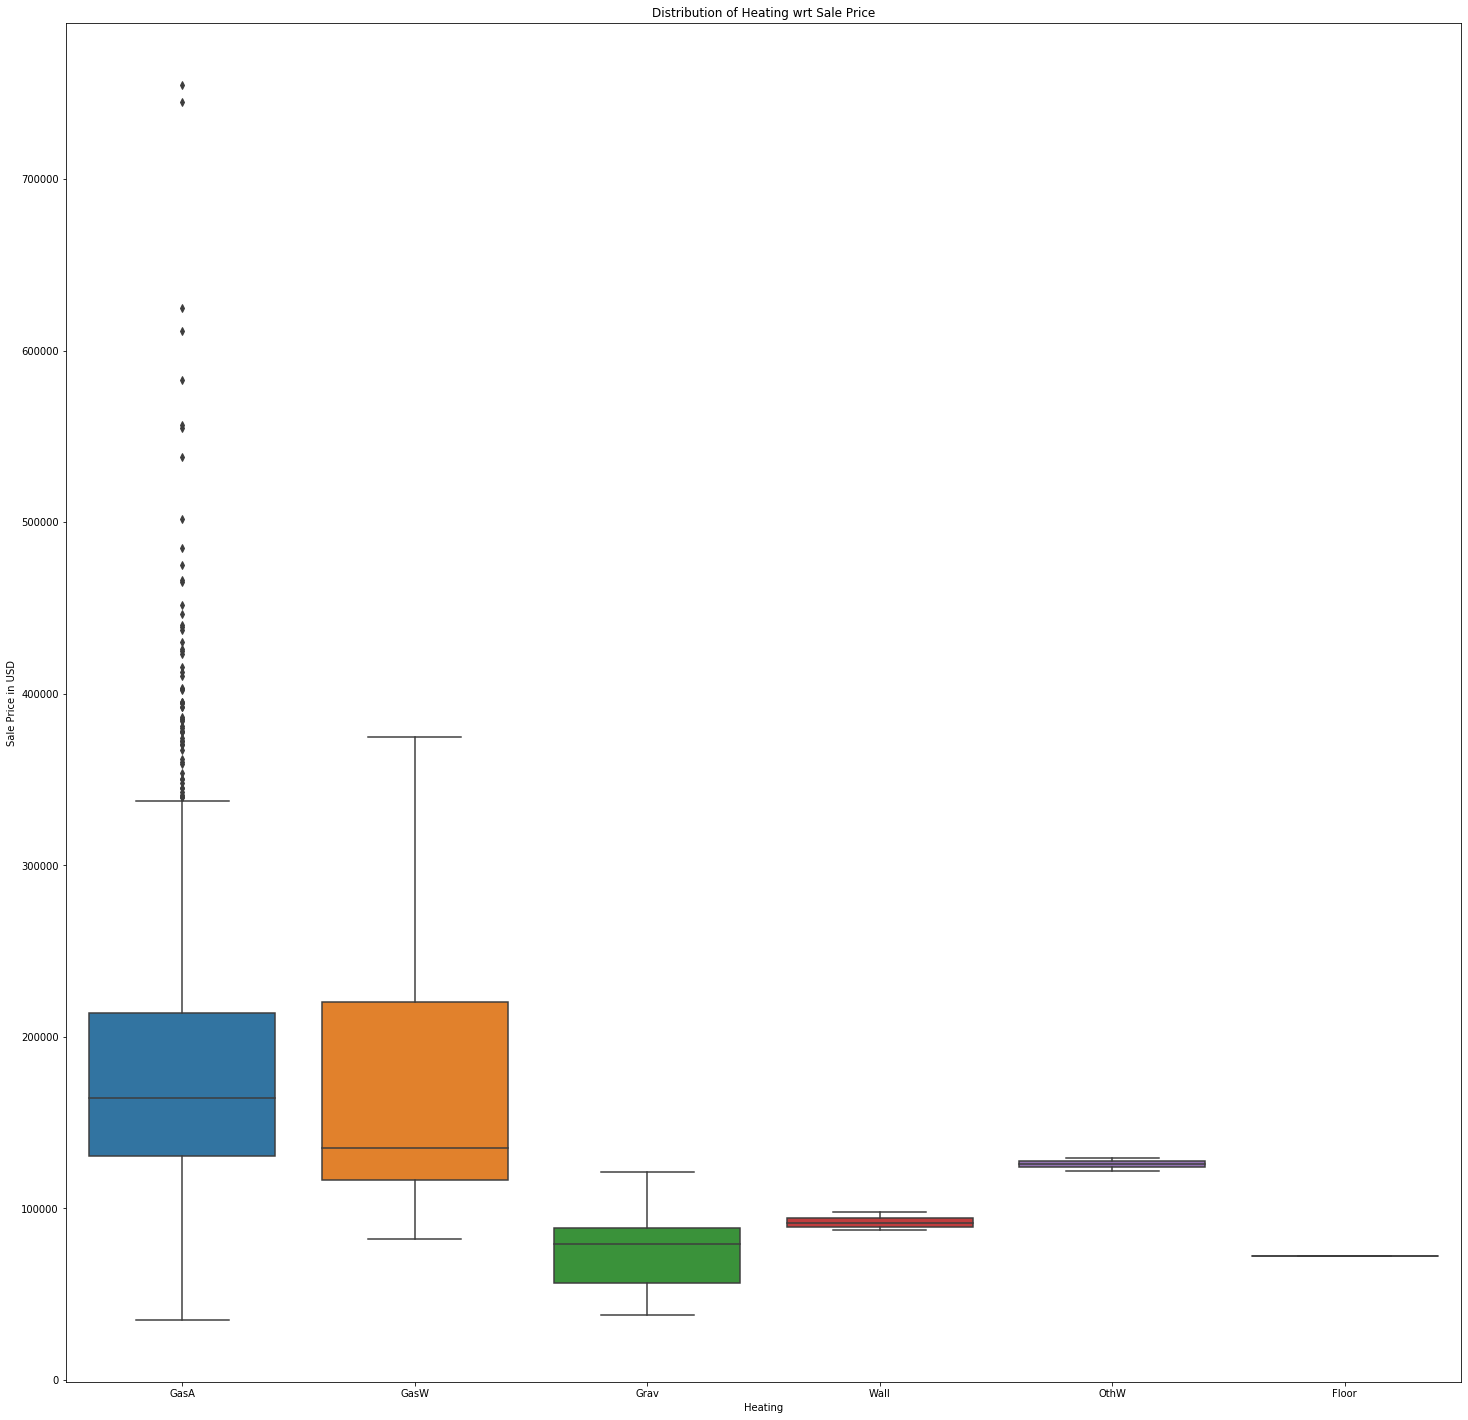

Least Occuring Value for the attribute - Heating, is Floor - Heating


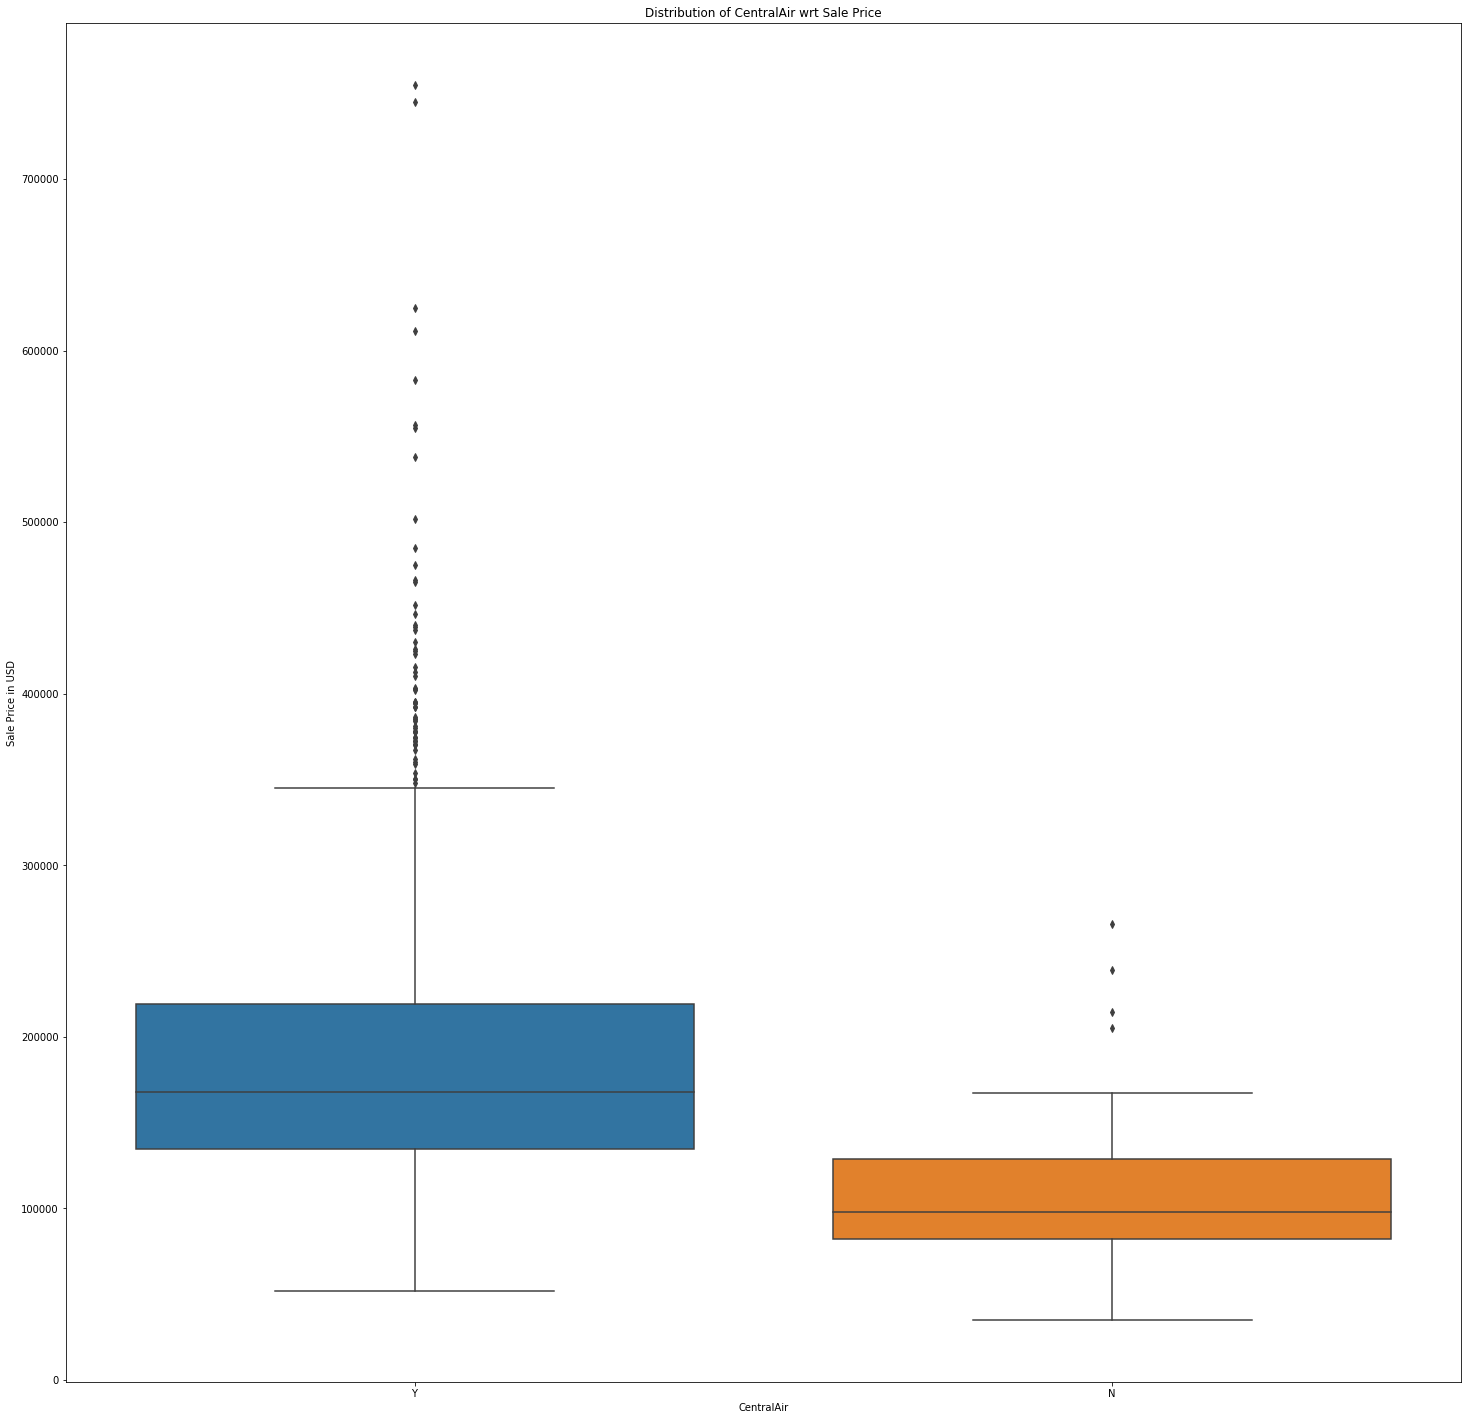

Least Occuring Value for the attribute - CentralAir, is N - CentralAir


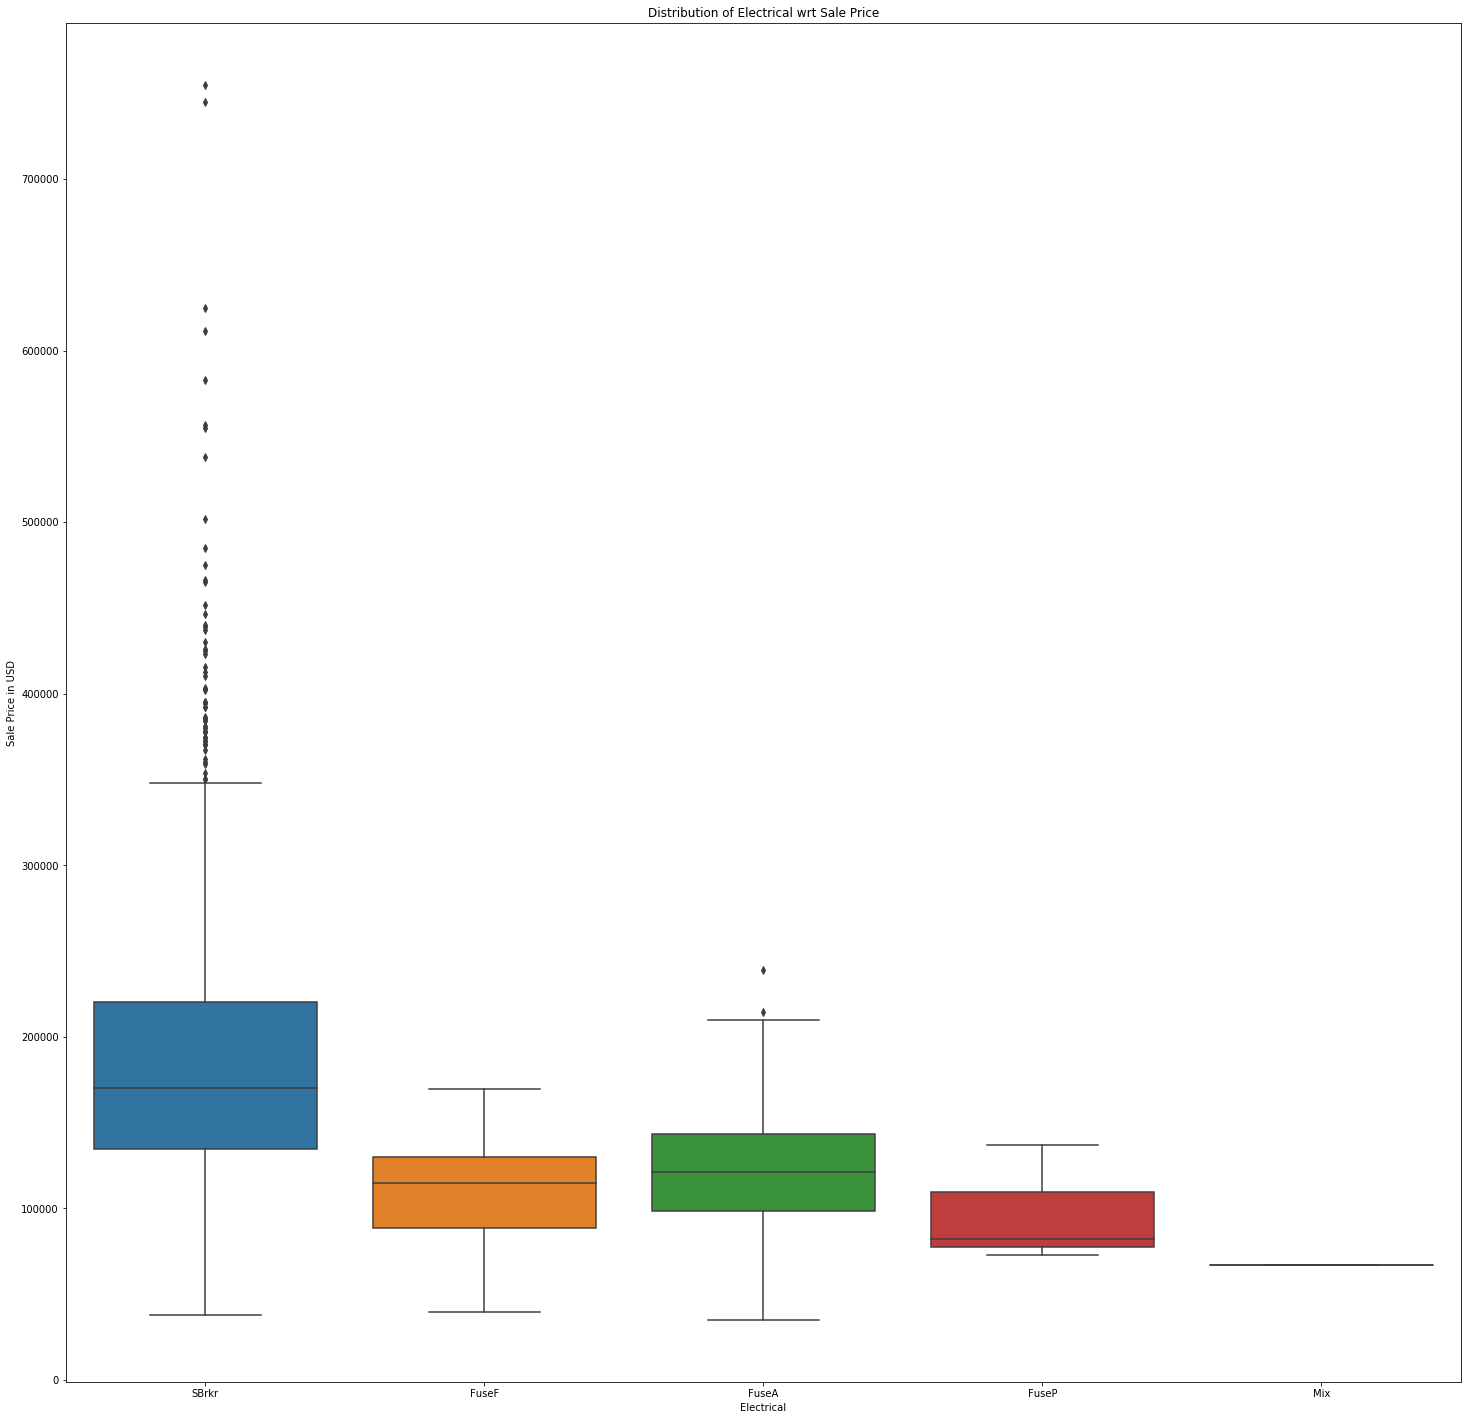

Least Occuring Value for the attribute - Electrical, is Mix - Electrical


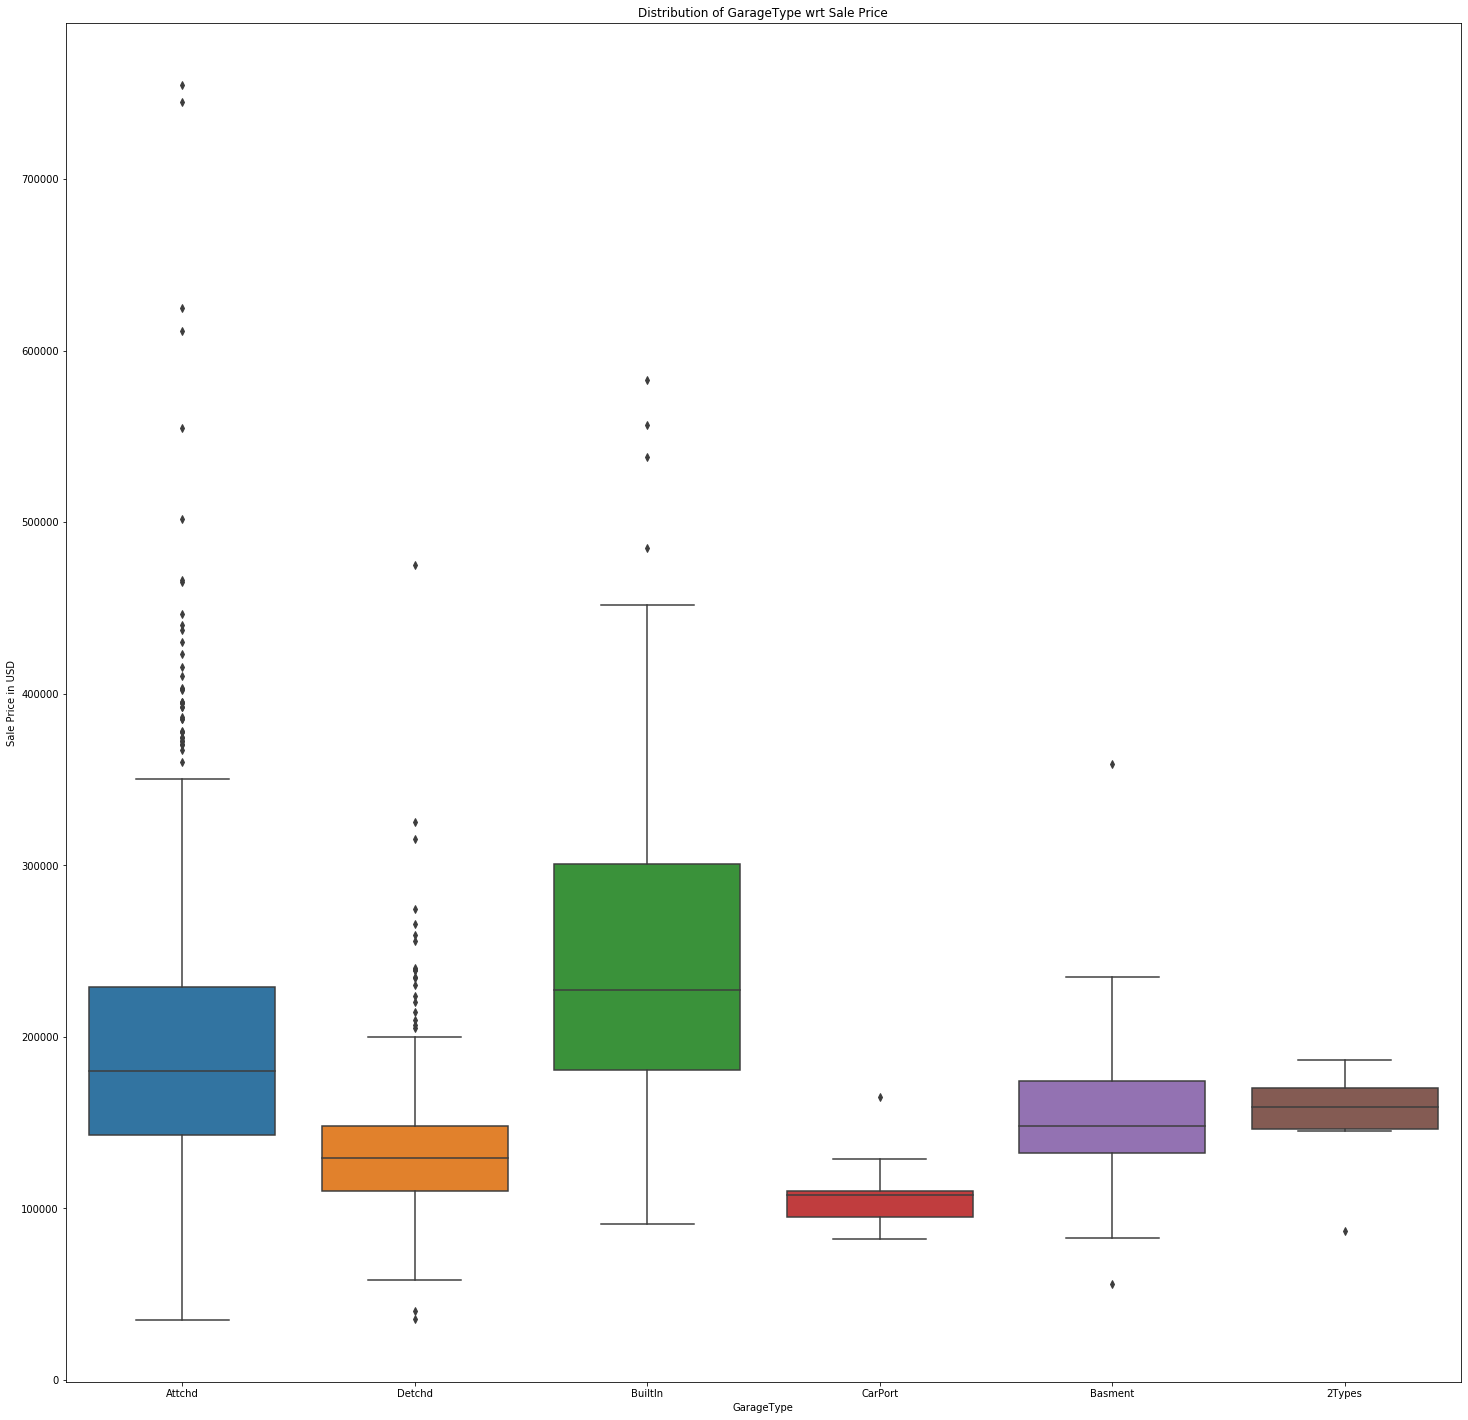

Least Occuring Value for the attribute - GarageType, is 2Types - GarageType


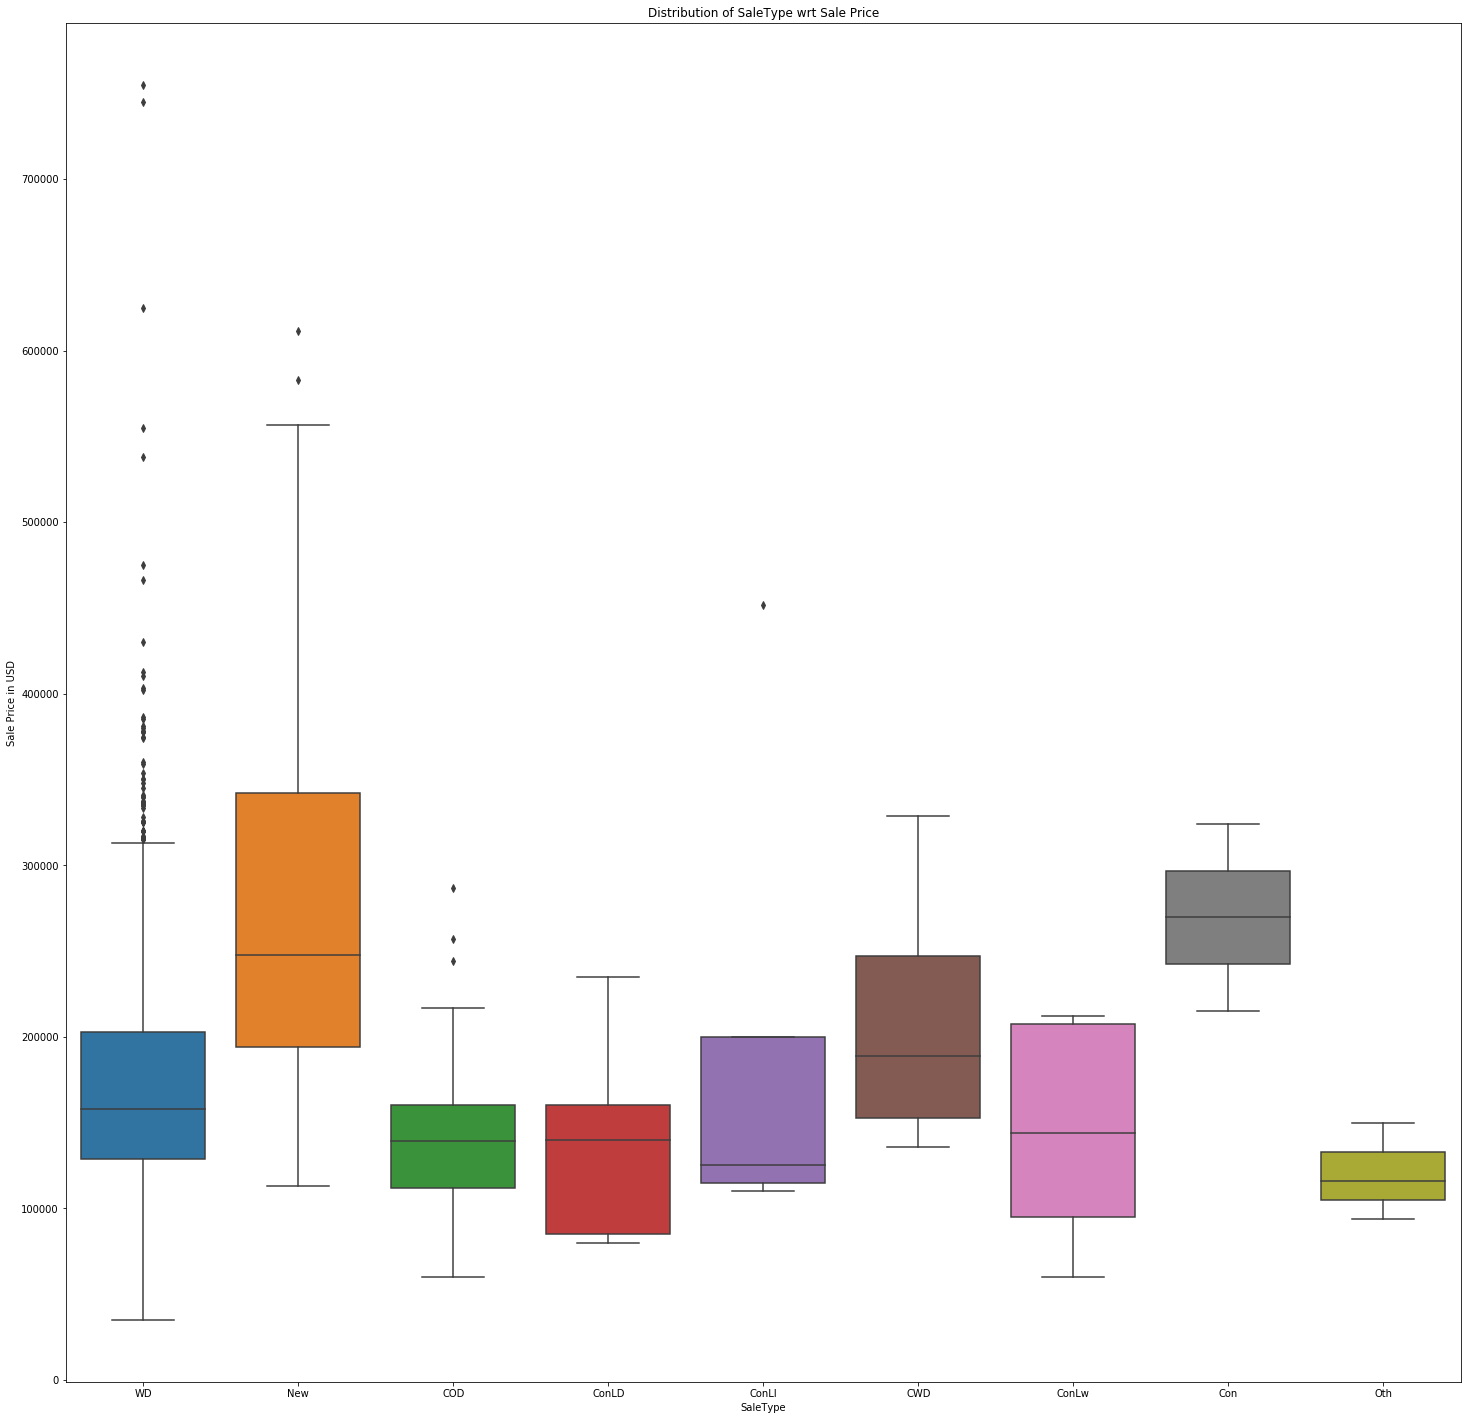

Least Occuring Value for the attribute - SaleType, is Con - SaleType


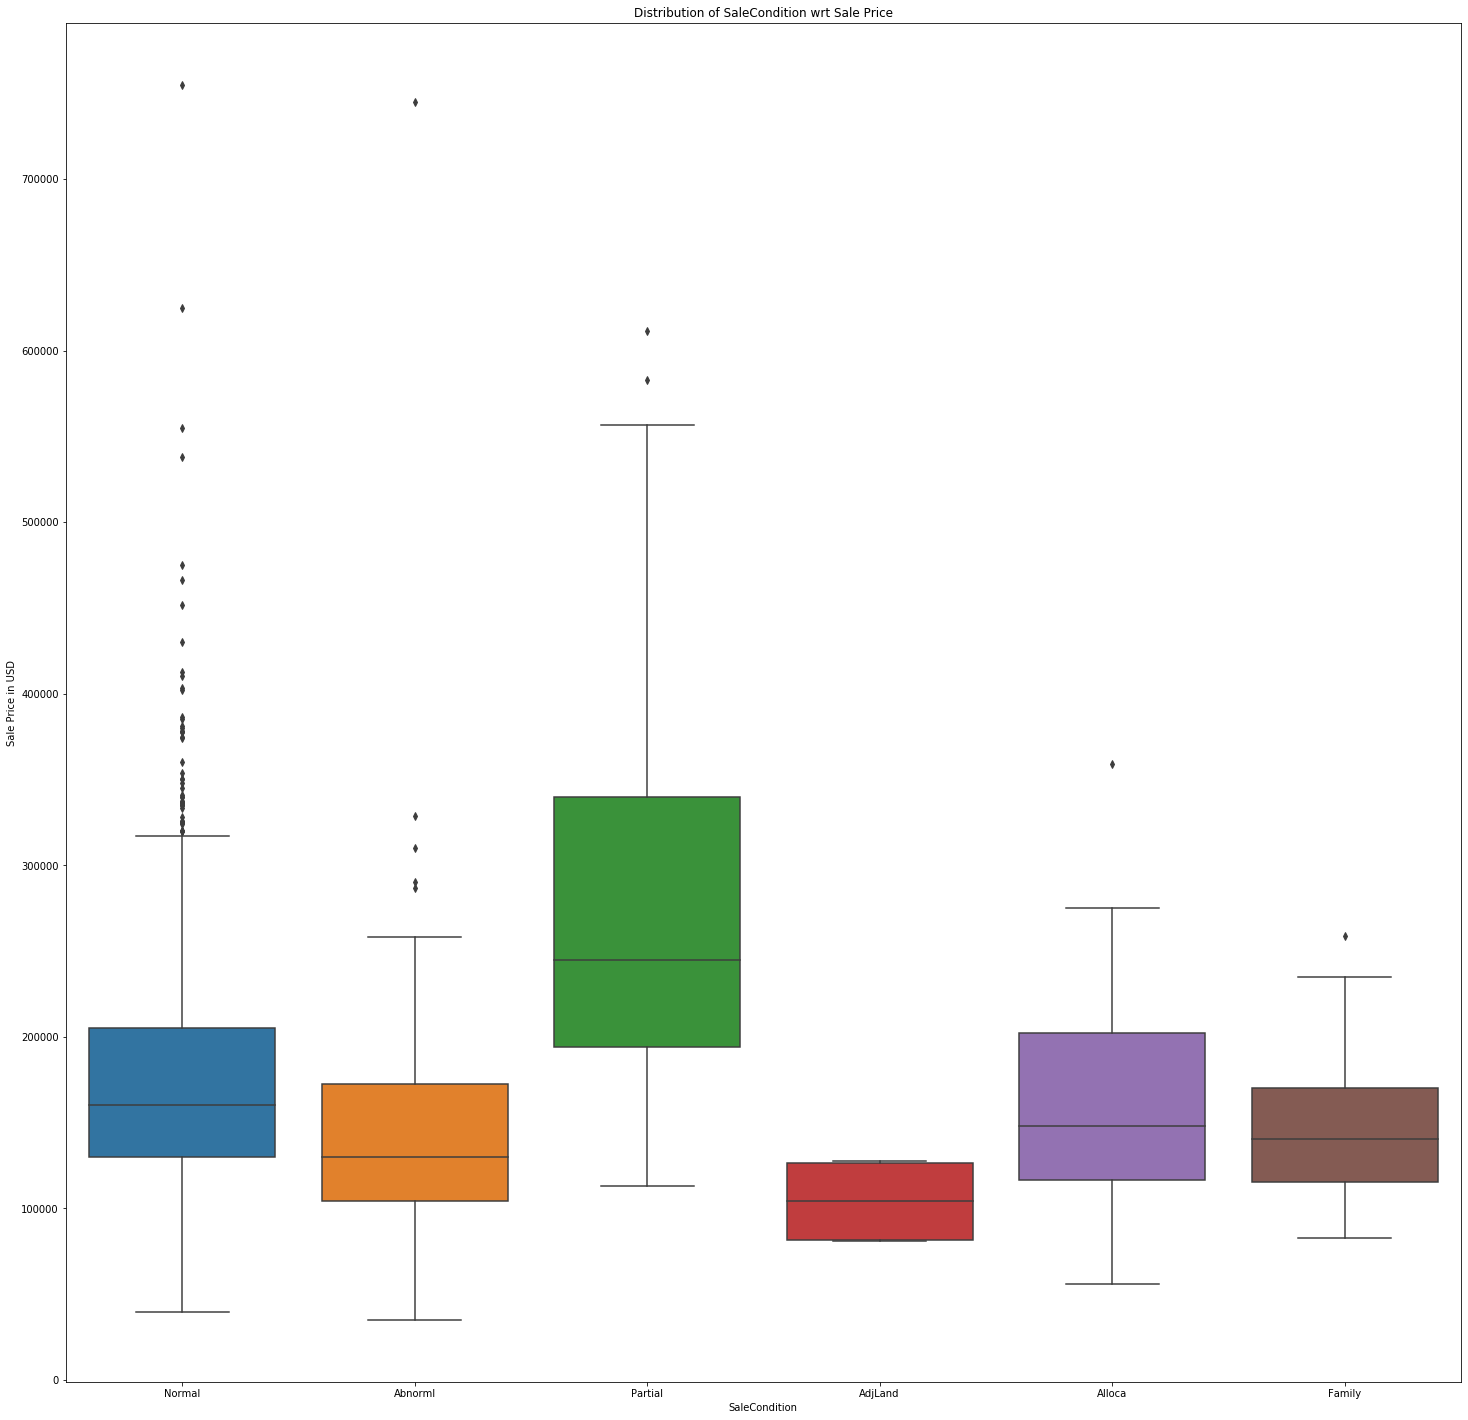

Least Occuring Value for the attribute - SaleCondition, is AdjLand - SaleCondition


In [21]:
for col in categorical_cols:
    # Plotting Box plots of each categorical attribute to understand the behaviour with respect to SalePrice
    plotBoxPlots(col)
    
    # Renaming the values to have a better understanding of the dummy variables names
    data[col] = data[col].map(str) + ' - ' + col
    
    # Creating dummy variables
    temp_df = pd.get_dummies(data[col])
    
    # Adding the dummy variables to the original dataset
    data = pd.concat([data, temp_df], axis = 1)
    
    # Dropping least occuring dummy variable instead of first
    leastOccuringValue = data[col].value_counts(ascending = True).index[0]
    data.drop([leastOccuringValue], axis = 1, inplace = True)
    print('Least Occuring Value for the attribute - '+ col + ', is ' + leastOccuringValue)
    
    # Now we can drop the original attribute as we have represented it as dummy variable.
    data.drop(col, axis = 1, inplace = True)

In [22]:
# Checking the dummy variable creation
data.head()

MSSubClass  LotFrontage  LotArea  LotShape  LandSlope  OverallQual  \
0          60         65.0     8450         3          2            7   
1          20         80.0     9600         3          2            6   
2          60         68.0    11250         2          2            7   
3          70         60.0     9550         2          2            7   
4          60         84.0    14260         2          2            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  ConLI - SaleType  \
0            5       2003          2003       196.0  ...                 0   
1            8       1976          1976         0.0  ...                 0   
2            5       2001          2002       162.0  ...                 0   
3            5       1915          1970         0.0  ...                 0   
4            5       2000          2000       350.0  ...                 0   

   ConLw - SaleType  New - SaleType  Oth - SaleType  WD - SaleType  \
0                 0               0               0              1   
1                 0               0               0              1   
2                 0               0               0              1   
3                 0               0               0              1   
4                 0               0               0              1   

   Abnorml - SaleCondition  Alloca - SaleCondition  Family - SaleCondition  \
0                        0                       0                       0   
1                        0                       0                       0   
2                        0                       0                       0   
3                        1                       0                       0   
4                        0                       0                       0   

   Normal - SaleCondition  Partial - SaleCondition  
0                       1                        0  
1                       1                        0  
2                       1                        0  
3                       0                        0  
4                       1                        0  

[5 rows x 193 columns]

In [23]:
# Checking the dummy variable creation
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'ConLI - SaleType', 'ConLw - SaleType', 'New - SaleType',
       'Oth - SaleType', 'WD - SaleType', 'Abnorml - SaleCondition',
       'Alloca - SaleCondition', 'Family - SaleCondition',
       'Normal - SaleCondition', 'Partial - SaleCondition'],
      dtype='object', length=193)

# Numeric Attributes

In [24]:
# Getting only numeric attributes from the data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data = data.select_dtypes(include = numerics)
numeric_cols = numeric_data.columns
numeric_data.head()

MSSubClass  LotFrontage  LotArea  LotShape  LandSlope  OverallQual  \
0          60         65.0     8450         3          2            7   
1          20         80.0     9600         3          2            6   
2          60         68.0    11250         2          2            7   
3          70         60.0     9550         2          2            7   
4          60         84.0    14260         2          2            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  WoodDeckSF  \
0            5       2003          2003       196.0  ...           0   
1            8       1976          1976         0.0  ...         298   
2            5       2001          2002       162.0  ...           0   
3            5       1915          1970         0.0  ...           0   
4            5       2000          2000       350.0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 53 columns]

In [25]:
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Plotting pair-wise plots for numeric attributes to understand the relationship with the output variable

In [26]:
continous_numeric_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
continous_numeric_data = data[continous_numeric_cols]
continous_numeric_data.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  
0           0           61              0          0            0         0  
1         298            0              0          0            0         0  
2           0           42              0          0            0         0  
3           0           35            272          0            0         0  
4         192           84              0          0            0         0

In [27]:
# Splitting the numeric data attributes into chunks as we have more than 10 attributes
num_data1 = pd.concat([numeric_data['SalePrice'], continous_numeric_data.iloc[:, [0, 1, 2, 3, 4, 5]]], axis = 1)
num_data2 = pd.concat([numeric_data['SalePrice'], continous_numeric_data.iloc[:, [5, 6, 7, 8, 9, 10, 11]]], axis = 1)
num_data3 = pd.concat([numeric_data['SalePrice'], continous_numeric_data.iloc[:, [11, 12, 13, 14, 15, 16, 17]]], axis = 1)

<Figure size 1080x576 with 0 Axes>

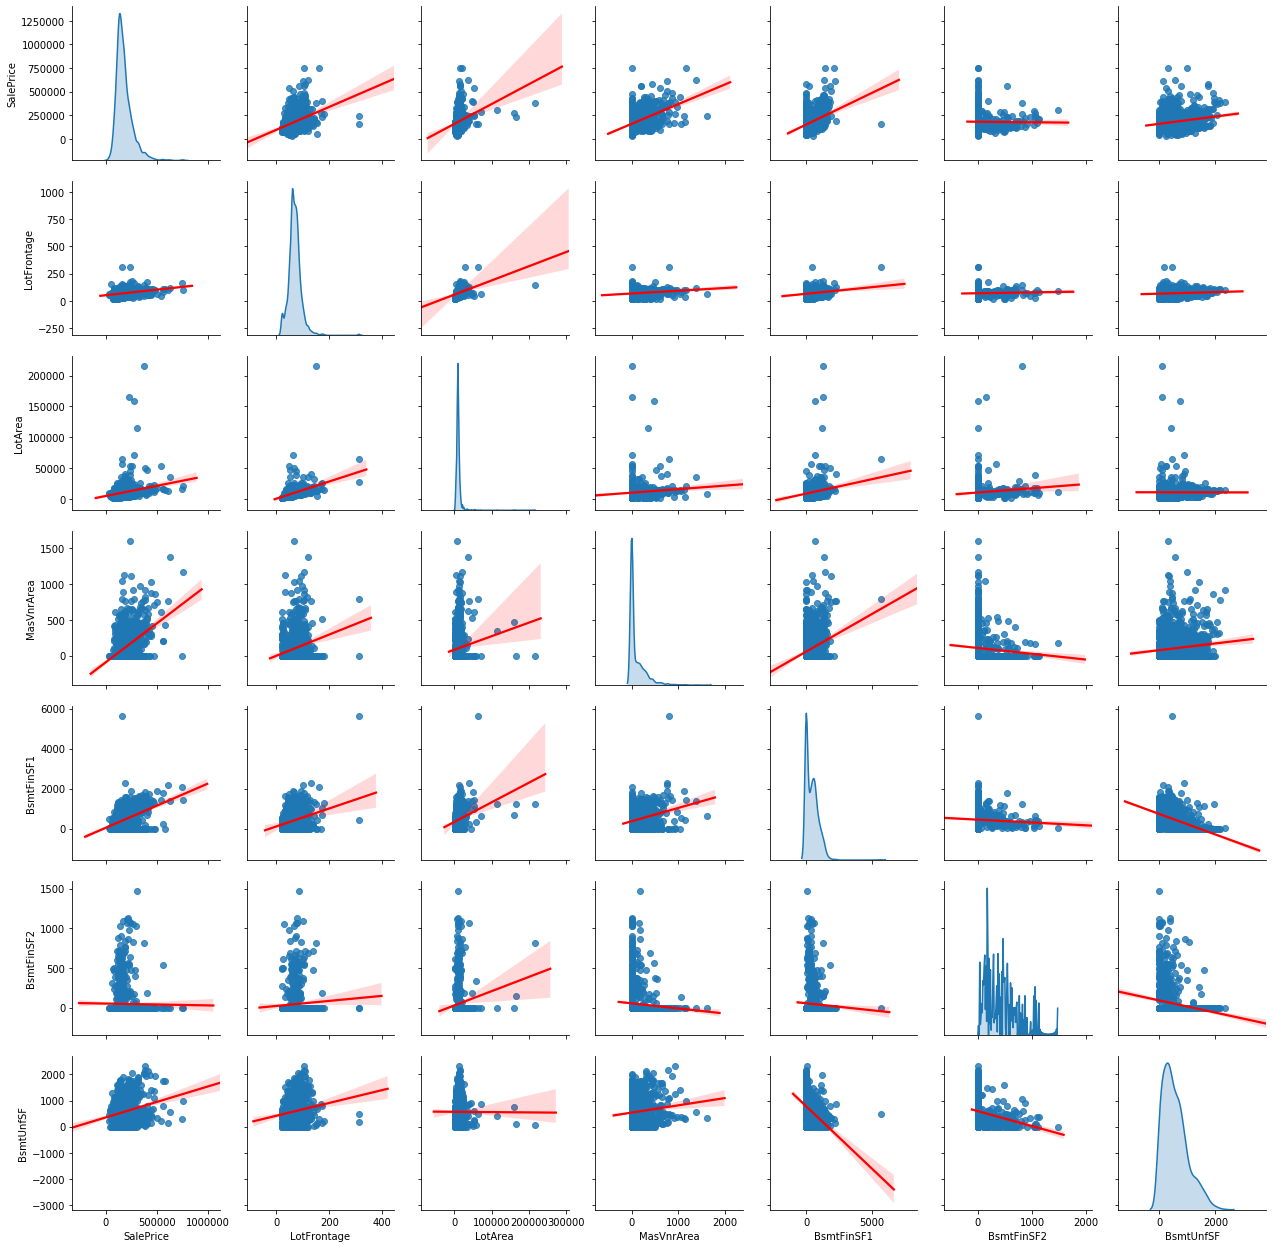

In [28]:
# Plotting pairplots
plt.figure(figsize = (15, 8))
sns.pairplot(num_data1, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws' : {'color' : 'red'}})
plt.show()

<Figure size 1080x576 with 0 Axes>

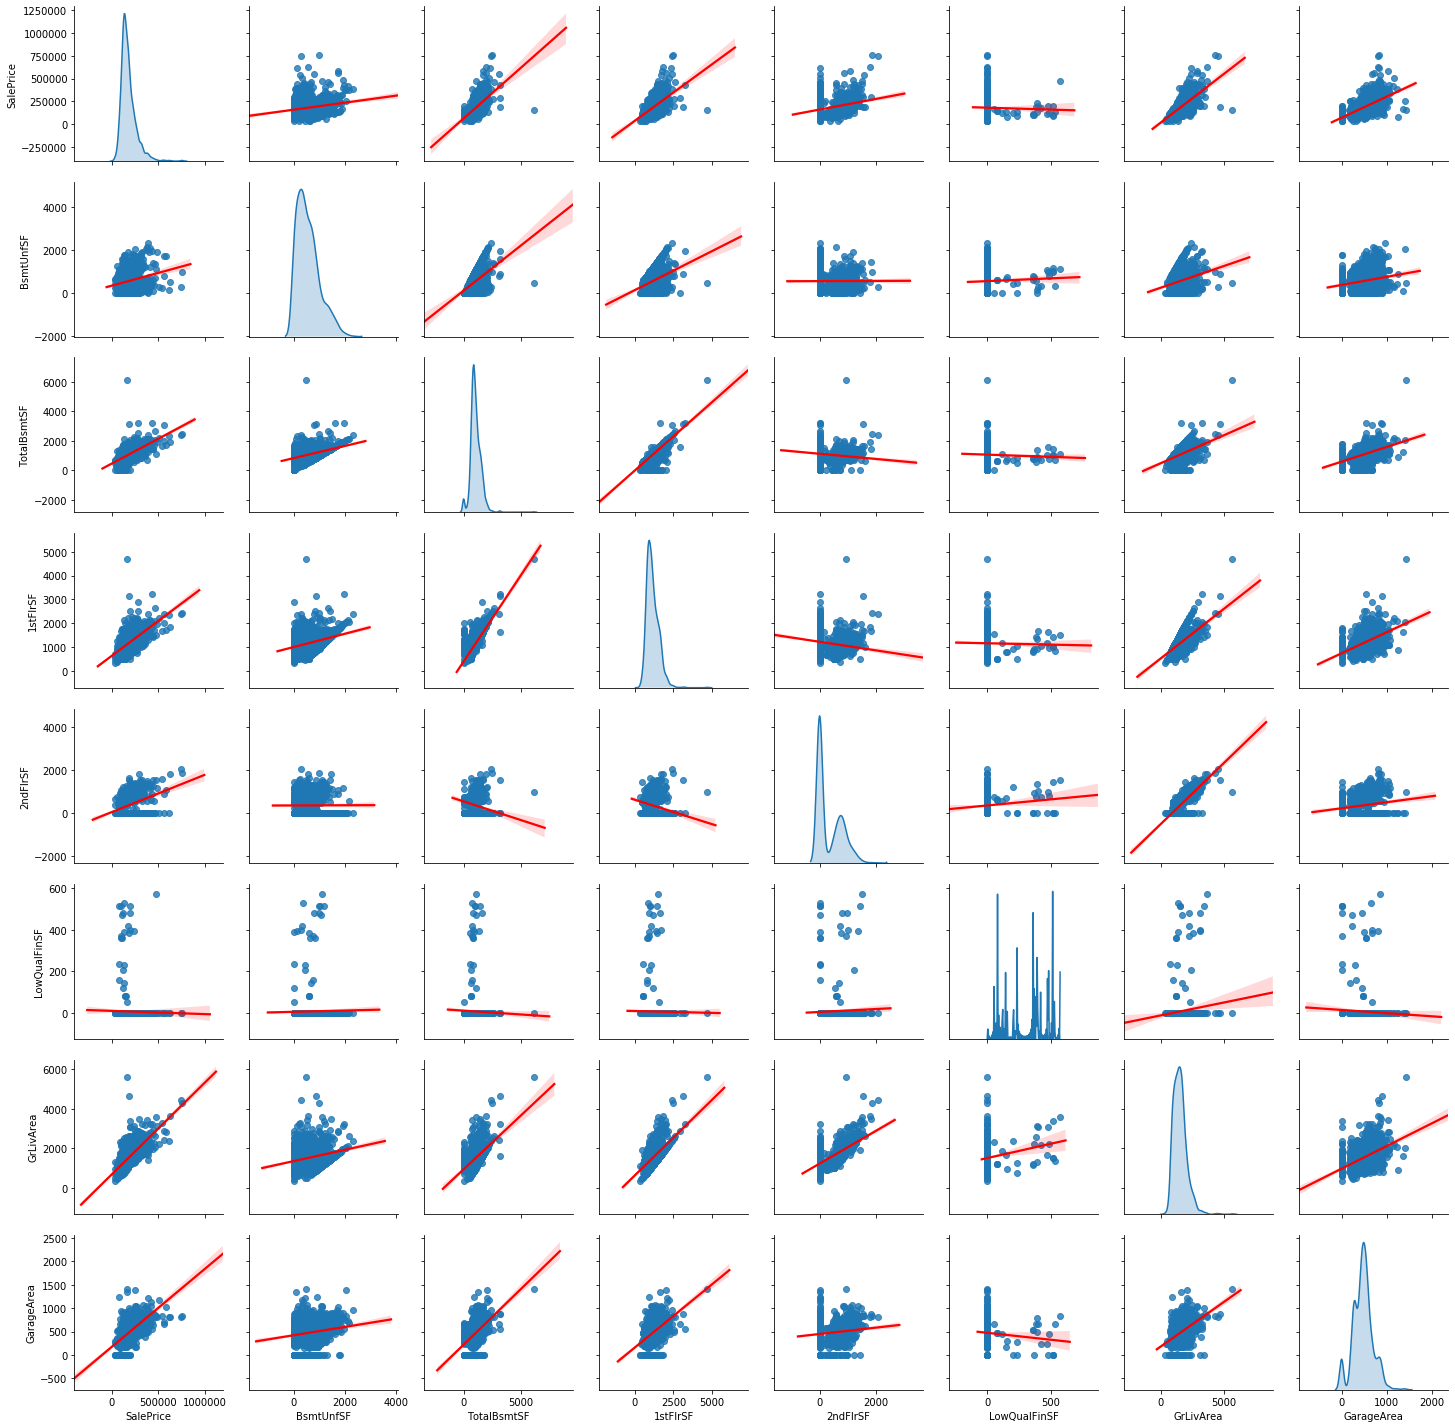

In [29]:
# Plotting pairplots
plt.figure(figsize = (15, 8))
sns.pairplot(num_data2, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws' : {'color' : 'red'}})
plt.show()

<Figure size 1080x576 with 0 Axes>

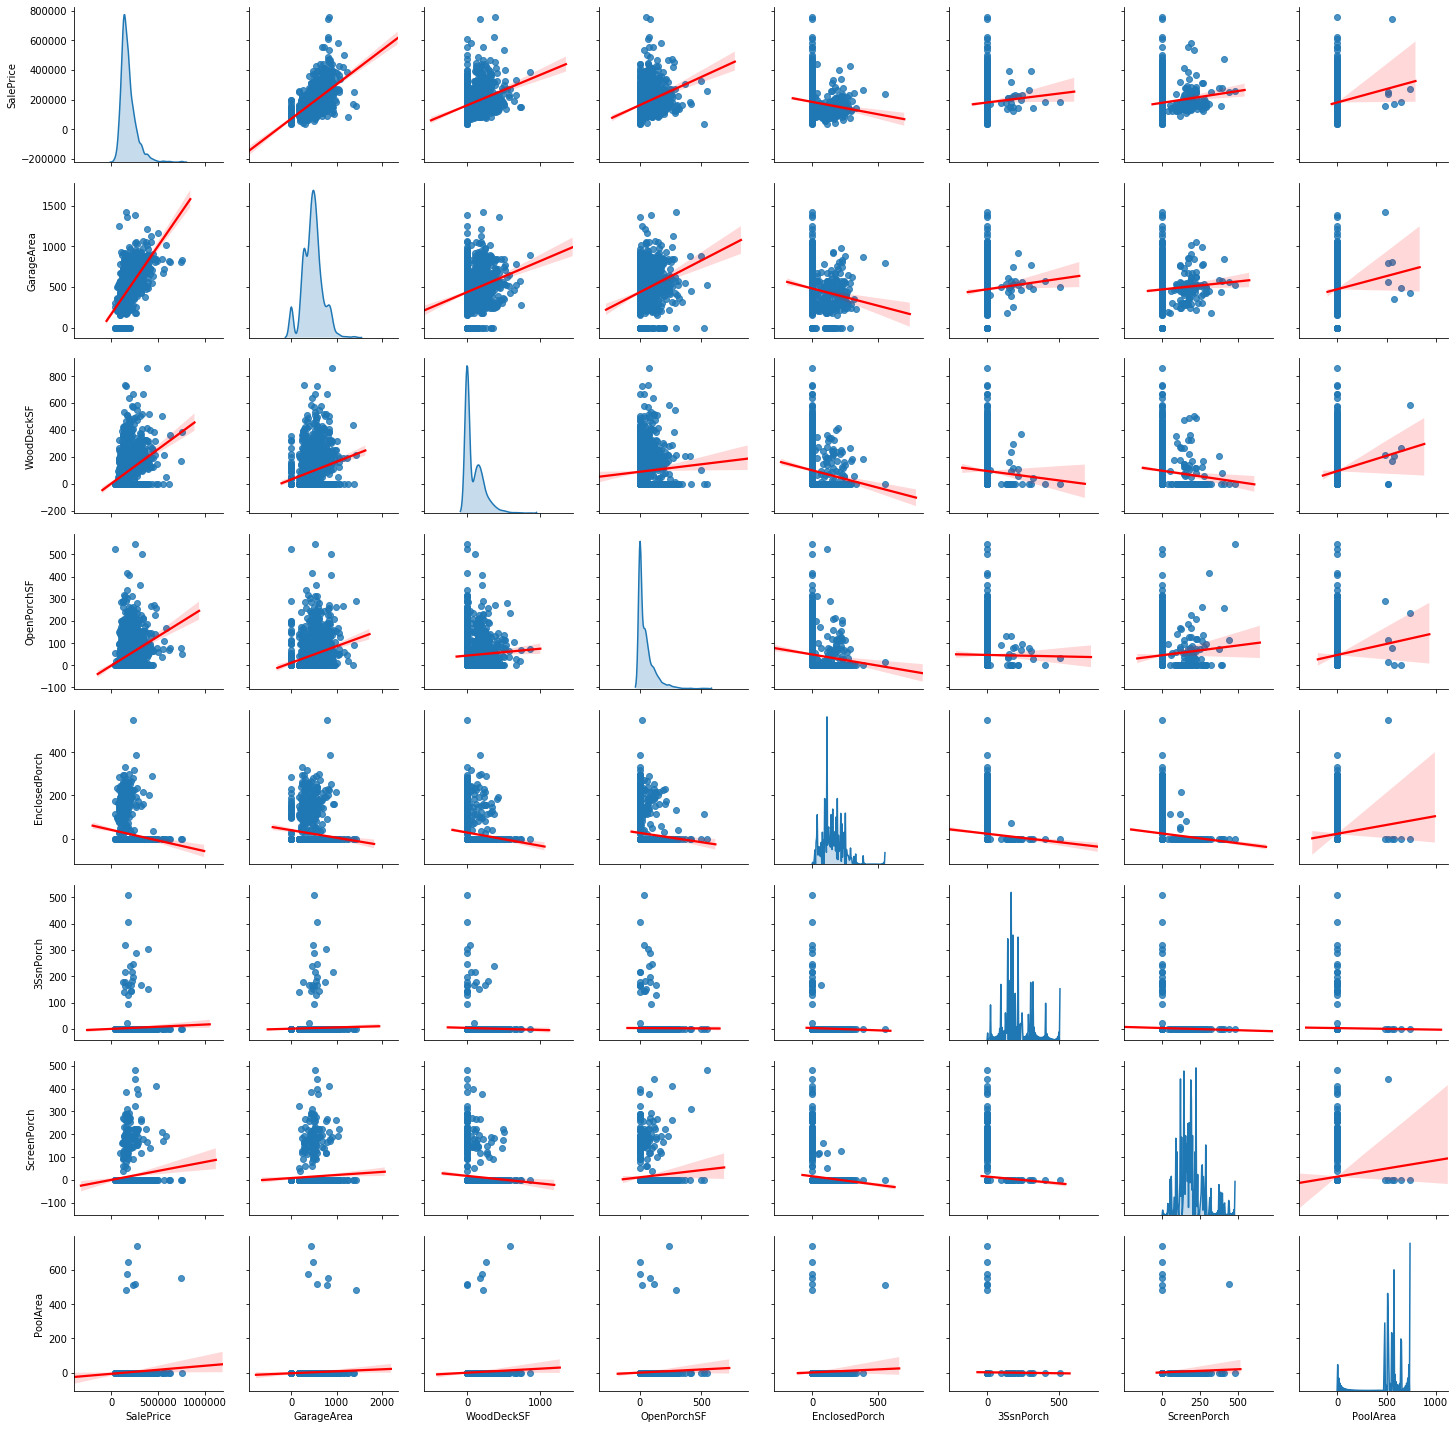

In [30]:
# Plotting pairplots
plt.figure(figsize = (15, 8))
sns.pairplot(num_data3, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws' : {'color' : 'red'}})
plt.show()

We can plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [31]:
# Correlation matrix
cor = numeric_data.corr()
cor

MSSubClass  LotFrontage   LotArea  LotShape  LandSlope  \
MSSubClass       1.000000    -0.386347 -0.139781  0.115361   0.025672   
LotFrontage     -0.386347     1.000000  0.426095 -0.231878  -0.088345   
LotArea         -0.139781     0.426095  1.000000 -0.315484  -0.436868   
LotShape         0.115361    -0.231878 -0.315484  1.000000   0.144248   
LandSlope        0.025672    -0.088345 -0.436868  0.144248   1.000000   
OverallQual      0.032628     0.251646  0.105806 -0.198994   0.066450   
OverallCond     -0.059316    -0.059213 -0.005636  0.033747  -0.010355   
YearBuilt        0.027850     0.123349  0.014228 -0.229365   0.073639   
YearRemodAdd     0.040581     0.088866  0.013788 -0.175488   0.059105   
MasVnrArea       0.022936     0.193458  0.104160 -0.089178   0.021815   
ExterQual        0.016178     0.178993  0.055570 -0.188668   0.086525   
ExterCond       -0.064686    -0.017264  0.014732 -0.014073   0.039610   
BsmtQual         0.076820     0.174698  0.079775 -0.226048   0.023497   
BsmtCond        -0.005152     0.049286  0.028160 -0.097207  -0.017487   
BsmtExposure     0.054925     0.181500  0.232300 -0.178891  -0.265739   
BsmtFinType1     0.029052     0.080121  0.058555 -0.108316  -0.050350   
BsmtFinSF1      -0.069836     0.233633  0.214103 -0.157718  -0.113834   
BsmtFinType2    -0.022856     0.016278  0.085312 -0.051584  -0.074537   
BsmtFinSF2      -0.065649     0.049900  0.111170 -0.060419  -0.085518   
BsmtUnfSF       -0.140759     0.132644 -0.002618 -0.014179   0.116456   
TotalBsmtSF     -0.238518     0.392075  0.260833 -0.200469  -0.032498   
HeatingQC       -0.019458     0.098509  0.003581 -0.119556   0.057444   
1stFlrSF        -0.251758     0.457181  0.299475 -0.189251  -0.068323   
2ndFlrSF         0.307886     0.080177  0.050986 -0.089380   0.009255   
LowQualFinSF     0.046474     0.038469  0.004779  0.007973  -0.013888   
GrLivArea        0.074853     0.402797  0.263116 -0.212741  -0.043860   
BsmtFullBath     0.003491     0.100949  0.158155 -0.064638  -0.116165   
BsmtHalfBath    -0.002333    -0.007234  0.048046 -0.057729  -0.070299   
FullBath         0.131608     0.198769  0.126031 -0.184213   0.046936   
HalfBath         0.177354     0.053532  0.014259 -0.116576  -0.000781   
BedroomAbvGr    -0.023438     0.263170  0.119690 -0.060028   0.048196   
KitchenAbvGr     0.281721    -0.006069 -0.017784  0.094870   0.036467   
KitchenQual     -0.012383     0.181839  0.067864 -0.157933   0.039474   
TotRmsAbvGrd     0.040380     0.352096  0.190015 -0.137148   0.033768   
Functional      -0.006716     0.025544 -0.025128 -0.023444   0.095140   
Fireplaces      -0.045569     0.266639  0.271364 -0.202019  -0.123995   
GarageYrBlt      0.085072     0.070250 -0.024947 -0.200238   0.074875   
GarageFinish    -0.012301     0.234318  0.116326 -0.236831   0.025008   
GarageCars      -0.040110     0.285691  0.154871 -0.194984   0.002683   
GarageArea      -0.098672     0.344997  0.180403 -0.173472  -0.004826   
GarageQual       0.024439     0.050608  0.026851 -0.091955  -0.011491   
GarageCond      -0.025864     0.037449  0.016833 -0.074285   0.018713   
PavedDrive      -0.059925     0.094467  0.015134 -0.103643   0.024538   
WoodDeckSF      -0.012579     0.088521  0.171698 -0.161717  -0.095156   
OpenPorchSF     -0.006100     0.151972  0.084774 -0.093135   0.032622   
EnclosedPorch   -0.012037     0.010700 -0.018340  0.095092   0.008843   
3SsnPorch       -0.043825     0.070029  0.020423 -0.033801  -0.008694   
ScreenPorch     -0.026030     0.041383  0.043160 -0.065182  -0.052976   
PoolArea         0.008283     0.206167  0.077672 -0.047100   0.015505   
MiscVal         -0.007683     0.003368  0.038068 -0.028638   0.003518   
MoSold          -0.013585     0.011200  0.001205 -0.026617  -0.007072   
YrSold          -0.021407     0.007450 -0.014261  0.037391   0.002305   
SalePrice       -0.084284     0.351799  0.263843 -0.267759  -0.051152   

               OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnr

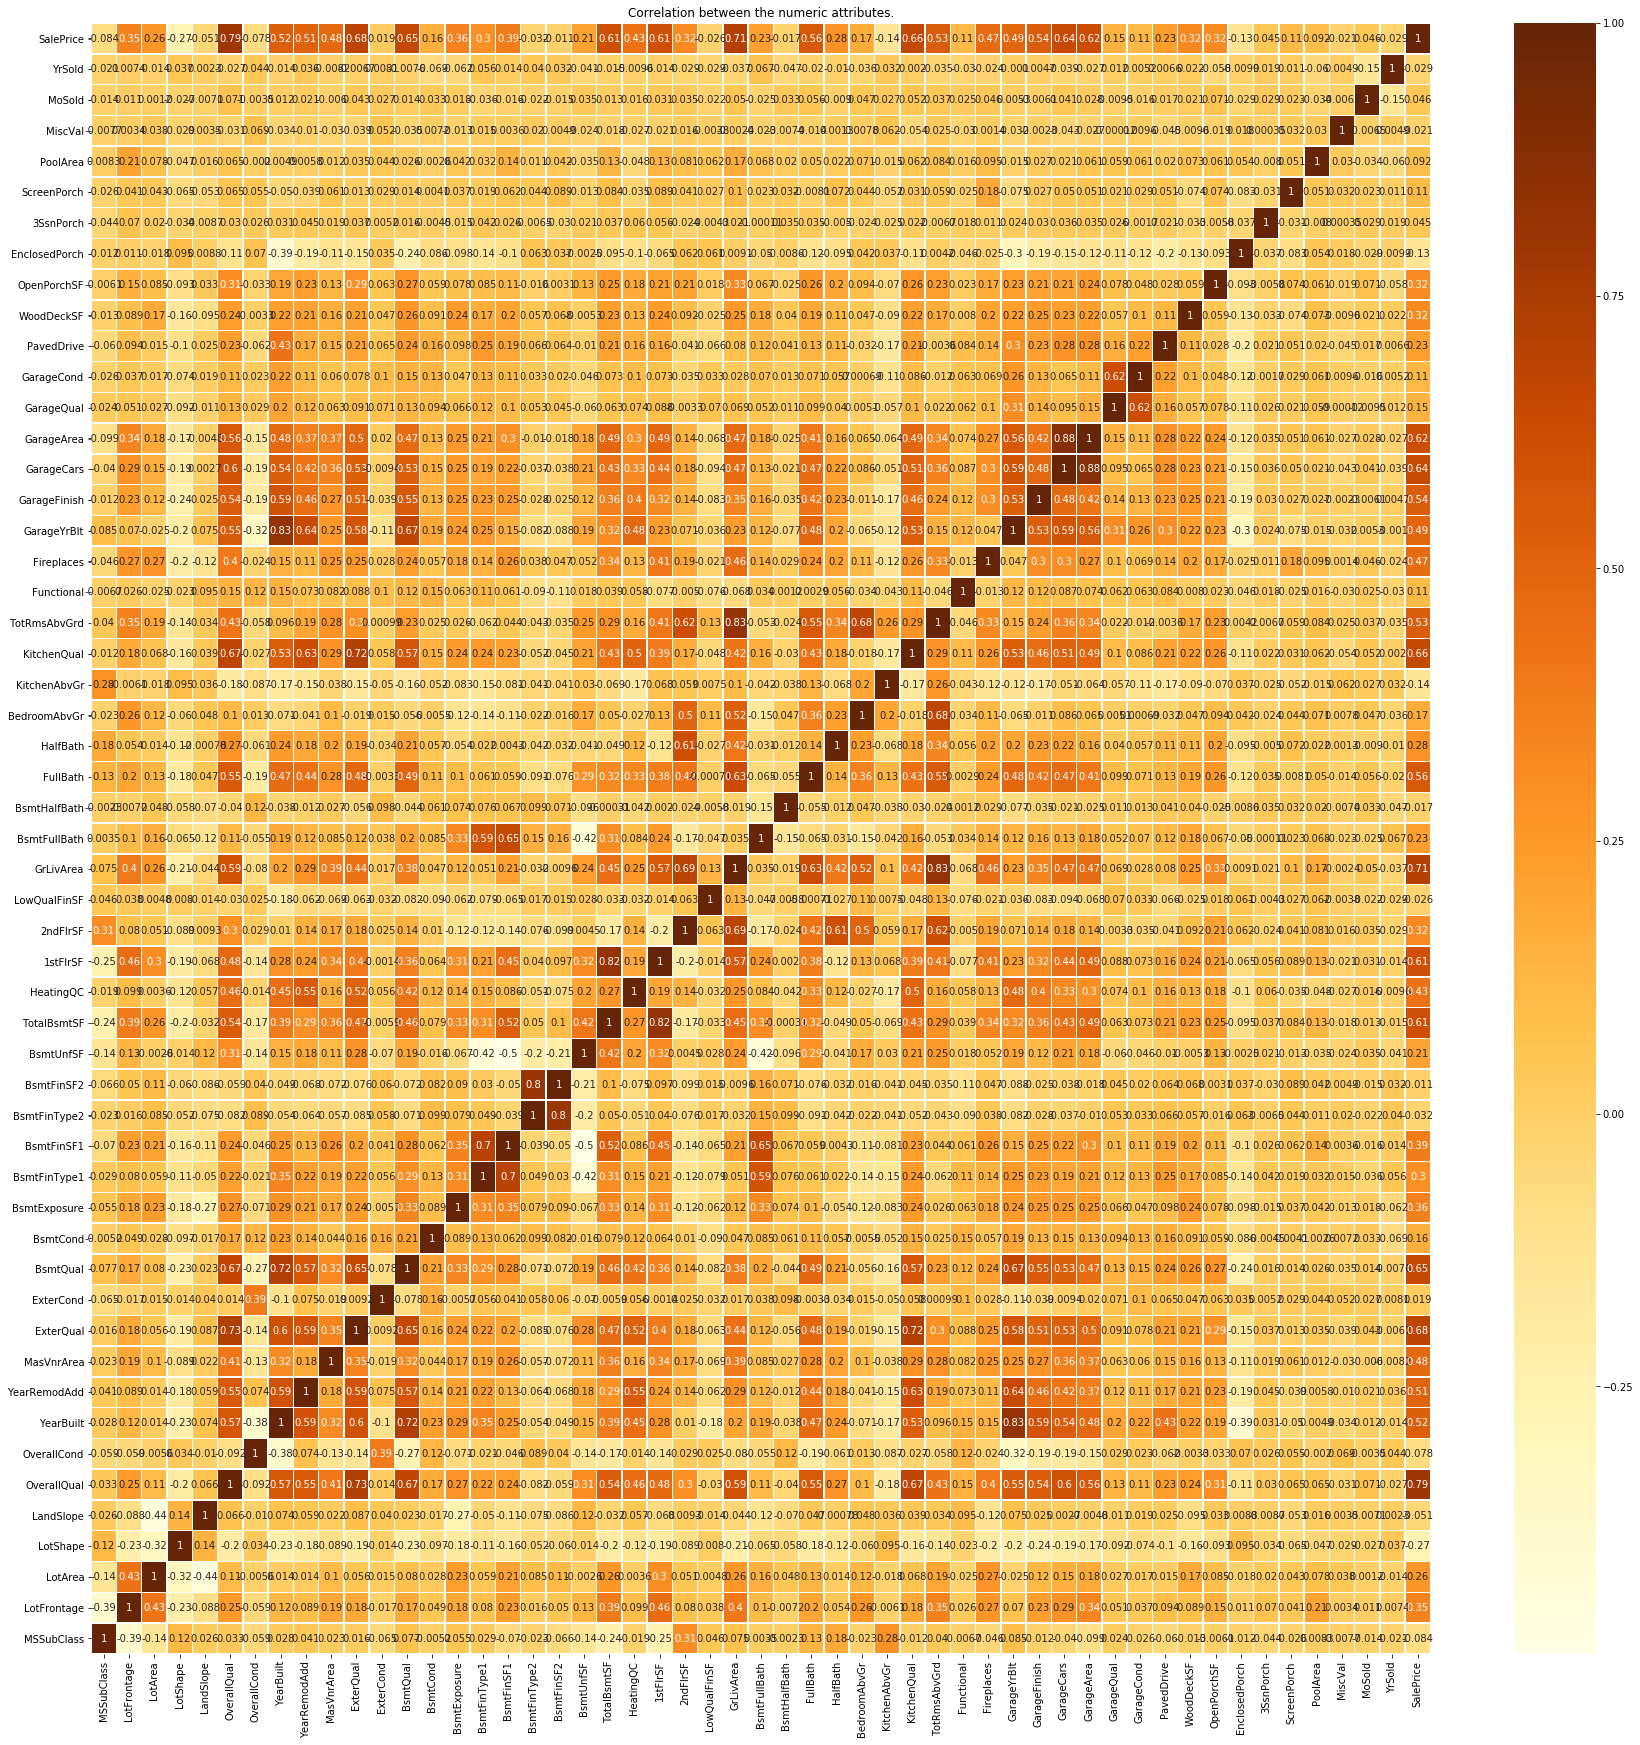

In [32]:
# Plotting a heat map
plt.figure(figsize = (30,30))
ax = sns.heatmap(cor, annot = True, linewidth = 0.5, cmap = 'YlOrBr')
t, bot = ax.get_ylim()
ax.set_ylim(top = t + 0.5, bottom = bot - 0.5)
plt.title('Correlation between the numeric attributes.')
plt.show()

From the above pairplots, correlation matrix and the heatmap, following as the useful insights:

**Correlation of SalePrice with independent variables:**
- Positive Correlation:
    - House price is highly positively correlated with OverallQual (Overall material and finish of the house), GrLivArea (Above grade (ground) living area square feet), GarageCars (Size of garage in car capacity), GarageArea (Size of garage in square feet, TotalBsmtSF (Total square feet of basement area), 1stFlrSF (First Floor square feet)
- Negative Correlation:
    - House price is highly negatively correlated with EnclosedPorch (Enclosed porch area in square feet), KitchenAbvGrd (Kitchens above grade), MSSubClass (Identifies the type of dwelling involved in the sale), OverallCond (Rates the overall condition of the house)
   
However Overall Condition of the house can be considered as an important attribute to determine the price of house, it is negatively correlated with price. This is might be because of multicollinearity among the attributes.

**Correlation among independent variables:** 
- GarageArea and Garage Cars are highly positively correlated.
- GarageYrBlt and YearBlt are highly positively correlated.

# Data Cleaning and Preparation for Numeric Attributes

In [33]:
# Finding number of null values in numeric columns
data[numeric_cols].isnull().sum().sort_values(ascending = False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
SalePrice          0
BsmtExposure       0
2ndFlrSF           0
1stFlrSF           0
HeatingQC          0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
BsmtFinType2       0
BsmtFinSF1         0
BsmtFinType1       0
BsmtQual           0
BsmtCond           0
GrLivArea          0
ExterCond          0
ExterQual          0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LandSlope          0
LotShape           0
LotArea            0
LowQualFinSF       0
BsmtFullBath       0
YrSold             0
GarageQual         0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageCond         0
GarageArea         0
BsmtHalfBath       0
GarageCars         0
GarageFinish       0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
KitchenQual  

We can observe missing values in three attributes ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [34]:
numeric_null_cols = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
# Getting the percentages of the null values in each categorical attributes
round(100 * (data[numeric_null_cols].isnull().sum() / len(data)), 2).sort_values(ascending = False)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
dtype: float64

In [35]:
data[numeric_null_cols].describe()

LotFrontage  GarageYrBlt   MasVnrArea
count  1201.000000  1379.000000  1452.000000
mean     70.049958  1978.506164   103.685262
std      24.284752    24.689725   181.066207
min      21.000000  1900.000000     0.000000
25%      59.000000  1961.000000     0.000000
50%      69.000000  1980.000000     0.000000
75%      80.000000  2002.000000   166.000000
max     313.000000  2010.000000  1600.000000

# Handling missing values in numeric attributes

In [36]:
# Imputing the median value for misisng values in LotFrontage, considering median as the best representative value
data['LotFrontage'] = pd.to_numeric(data['LotFrontage'], errors = 'coerce')
data['LotFrontage'] = data['LotFrontage'].fillna(value = data['LotFrontage'].median())


# Imputing the median value for misisng values in MasVnrArea, considering median as the best representative value
data['MasVnrArea'] = pd.to_numeric(data['MasVnrArea'], errors = 'coerce')
data['MasVnrArea'] = data['MasVnrArea'].fillna(value = data['MasVnrArea'].median())

# Imputing 0 for missing values in GarageYrBlt as I will be using it to derived if the garage is old or new in the below steps
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)

# Checking the percentage of missing values after imputation
round(100 * (data[numeric_cols].isnull().sum() / len(data)), 2).sort_values(ascending = False)

SalePrice        0.0
GrLivArea        0.0
2ndFlrSF         0.0
1stFlrSF         0.0
HeatingQC        0.0
TotalBsmtSF      0.0
BsmtUnfSF        0.0
BsmtFinSF2       0.0
BsmtFinType2     0.0
BsmtFinSF1       0.0
BsmtFinType1     0.0
BsmtExposure     0.0
BsmtCond         0.0
BsmtQual         0.0
ExterCond        0.0
ExterQual        0.0
MasVnrArea       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
LandSlope        0.0
LotShape         0.0
LotArea          0.0
LotFrontage      0.0
LowQualFinSF     0.0
BsmtFullBath     0.0
YrSold           0.0
BsmtHalfBath     0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
GarageCars       0.0
GarageFinish     0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual  

In [37]:
data[numeric_cols].head()

MSSubClass  LotFrontage  LotArea  LotShape  LandSlope  OverallQual  \
0          60         65.0     8450         3          2            7   
1          20         80.0     9600         3          2            6   
2          60         68.0    11250         2          2            7   
3          70         60.0     9550         2          2            7   
4          60         84.0    14260         2          2            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  WoodDeckSF  \
0            5       2003          2003       196.0  ...           0   
1            8       1976          1976         0.0  ...         298   
2            5       2001          2002       162.0  ...           0   
3            5       1915          1970         0.0  ...           0   
4            5       2000          2000       350.0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 53 columns]

We can derive the age of the house using the year built attributes. The possible year attributes that we have in the dataset are YearBuilt, YearRemodAdd, GarageYrBlt, YrSold. Month Sold can be ignored if we are considering Year Sold attributes to use for calculating the age.

Dropping Month Sold attribute.

In [38]:
data.drop(['MoSold'], axis = 1, inplace = True)

We can determine if the house is remodelled or not using the YearRemodAdd. Adding a new derived variable which mentions if the house is remodelled or not

In [39]:
# Method to check if the house is remodelled or not
def isHouseRemodelled(entry):
    if(entry['YearBuilt'] == entry['YearRemodAdd']):
        return 0
    elif(entry['YearBuilt'] < entry['YearRemodAdd']):
        return 1
    else:
        return 2
    
data['isRemodelled'] = data.apply(isHouseRemodelled, axis = 1)
data.head()

MSSubClass  LotFrontage  LotArea  LotShape  LandSlope  OverallQual  \
0          60         65.0     8450         3          2            7   
1          20         80.0     9600         3          2            6   
2          60         68.0    11250         2          2            7   
3          70         60.0     9550         2          2            7   
4          60         84.0    14260         2          2            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  ConLw - SaleType  \
0            5       2003          2003       196.0  ...                 0   
1            8       1976          1976         0.0  ...                 0   
2            5       2001          2002       162.0  ...                 0   
3            5       1915          1970         0.0  ...                 0   
4            5       2000          2000       350.0  ...                 0   

   New - SaleType  Oth - SaleType  WD - SaleType  Abnorml - SaleCondition  \
0               0               0              1                        0   
1               0               0              1                        0   
2               0               0              1                        0   
3               0               0              1                        1   
4               0               0              1                        0   

   Alloca - SaleCondition  Family - SaleCondition  Normal - SaleCondition  \
0                       0                       0                       1   
1                       0                       0                       1   
2                       0                       0                       1   
3                       0                       0                       0   
4                       0                       0                       1   

   Partial - SaleCondition  isRemodelled  
0                        0             0  
1                        0             0  
2                        0             1  
3                        0             1  
4                        0             0  

[5 rows x 193 columns]

We can calculate the original age, remodel age, builtOrRemodelAge of the house using YearBuilt, YearRemodAdd.
Similarly we can caluate the age of garage.

In [40]:
# Method to calculate the built or remodelled age of the house
def getBuiltOrRemodelAge(entry):
    if(entry['YearBuilt'] == entry['YearRemodAdd']):
        return entry['YrSold'] - entry['YearBuilt']
    else:
        return entry['YrSold'] - entry['YearRemodAdd']
       
data['builtOrRemodelAge'] = data.apply(getBuiltOrRemodelAge, axis = 1)
data.head()

MSSubClass  LotFrontage  LotArea  LotShape  LandSlope  OverallQual  \
0          60         65.0     8450         3          2            7   
1          20         80.0     9600         3          2            6   
2          60         68.0    11250         2          2            7   
3          70         60.0     9550         2          2            7   
4          60         84.0    14260         2          2            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  New - SaleType  \
0            5       2003          2003       196.0  ...               0   
1            8       1976          1976         0.0  ...               0   
2            5       2001          2002       162.0  ...               0   
3            5       1915          1970         0.0  ...               0   
4            5       2000          2000       350.0  ...               0   

   Oth - SaleType  WD - SaleType  Abnorml - SaleCondition  \
0               0              1                        0   
1               0              1                        0   
2               0              1                        0   
3               0              1                        1   
4               0              1                        0   

   Alloca - SaleCondition  Family - SaleCondition  Normal - SaleCondition  \
0                       0                       0                       1   
1                       0                       0                       1   
2                       0                       0                       1   
3                       0                       0                       0   
4                       0                       0                       1   

   Partial - SaleCondition  isRemodelled  builtOrRemodelAge  
0                        0             0                5.0  
1                        0             0               31.0  
2                        0             1                6.0  
3                        0             1               36.0  
4                        0             0                8.0  

[5 rows x 194 columns]

We can calculate the number of years in which the house is sold from building by subtracting year sold and year built

In [41]:
data['soldAge'] = data['YrSold'] - data['YearBuilt']

# Dropping Yrsold attribute as it is no longer required
data.drop(['YrSold'], axis = 1, inplace = True)

In [42]:
# Calculating age of
def getAge(year):
    if year == 0:
        return 0
    else:
        return 2020 - year

# Age of the house
data['age'] = ''
data['age'] = data['YearBuilt'].apply(getAge)

# Remodelled age of the house
data['remodelAge'] = ''
data['remodelAge'] = data['YearRemodAdd'].apply(getAge)

# Age of garage
data['garageAge'] = ''
data['garageAge'] = data['GarageYrBlt'].apply(getAge)

Creating new column to know if the house is old or new. Considering if the house is built after 2000 as new : 1 and else old : 0. Earlier we have imputed 0 for missing values or GarageYrBlt - thus considering the missing values as old garages

In [43]:
def getGarageStatus(entry):
    if entry == 0:
        return 0
    elif entry <= 2000:        
        return 0
    else:   
        return 1

data['garageStatus'] = data['GarageYrBlt'].apply(getGarageStatus)
data.head()

MSSubClass  LotFrontage  LotArea  LotShape  LandSlope  OverallQual  \
0          60         65.0     8450         3          2            7   
1          20         80.0     9600         3          2            6   
2          60         68.0    11250         2          2            7   
3          70         60.0     9550         2          2            7   
4          60         84.0    14260         2          2            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  \
0            5       2003          2003       196.0  ...   
1            8       1976          1976         0.0  ...   
2            5       2001          2002       162.0  ...   
3            5       1915          1970         0.0  ...   
4            5       2000          2000       350.0  ...   

   Family - SaleCondition  Normal - SaleCondition  Partial - SaleCondition  \
0                       0                       1                        0   
1                       0                       1                        0   
2                       0                       1                        0   
3                       0                       0                        0   
4                       0                       1                        0   

   isRemodelled  builtOrRemodelAge  soldAge  age  remodelAge  garageAge  \
0             0                5.0        5   17          17         17   
1             0               31.0       31   44          44         44   
2             1                6.0        7   19          18         19   
3             1               36.0       91  105          50         22   
4             0                8.0        8   20          20         20   

   garageStatus  
0             1  
1             0  
2             1  
3             0  
4             0  

[5 rows x 198 columns]

In [44]:
# Dropping the original attributes are we created derived variables from them
data.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis = 1, inplace = True)

In [45]:
data.head()

MSSubClass  LotFrontage  LotArea  LotShape  LandSlope  OverallQual  \
0          60         65.0     8450         3          2            7   
1          20         80.0     9600         3          2            6   
2          60         68.0    11250         2          2            7   
3          70         60.0     9550         2          2            7   
4          60         84.0    14260         2          2            8   

   OverallCond  MasVnrArea  ExterQual  ExterCond  ...  Family - SaleCondition  \
0            5       196.0          3          2  ...                       0   
1            8         0.0          2          2  ...                       0   
2            5       162.0          3          2  ...                       0   
3            5         0.0          2          2  ...                       0   
4            5       350.0          3          2  ...                       0   

   Normal - SaleCondition  Partial - SaleCondition  isRemodelled  \
0                       1                        0             0   
1                       1                        0             0   
2                       1                        0             1   
3                       0                        0             1   
4                       1                        0             0   

   builtOrRemodelAge  soldAge  age  remodelAge  garageAge  garageStatus  
0                5.0        5   17          17         17             1  
1               31.0       31   44          44         44             0  
2                6.0        7   19          18         19             1  
3               36.0       91  105          50         22             0  
4                8.0        8   20          20         20             0  

[5 rows x 195 columns]

# Outlier Detection

In [46]:
# Getting only numeric attributes from the data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data = data.select_dtypes(include = numerics)
numeric_cols = numeric_data.columns
numeric_data.head()

MSSubClass  LotFrontage  LotArea  LotShape  LandSlope  OverallQual  \
0          60         65.0     8450         3          2            7   
1          20         80.0     9600         3          2            6   
2          60         68.0    11250         2          2            7   
3          70         60.0     9550         2          2            7   
4          60         84.0    14260         2          2            8   

   OverallCond  MasVnrArea  ExterQual  ExterCond  ...  PoolArea  MiscVal  \
0            5       196.0          3          2  ...         0        0   
1            8         0.0          2          2  ...         0        0   
2            5       162.0          3          2  ...         0        0   
3            5         0.0          2          2  ...         0        0   
4            5       350.0          3          2  ...         0        0   

   SalePrice  isRemodelled  builtOrRemodelAge  soldAge  age  remodelAge  \
0     208500             0                5.0        5   17          17   
1     181500             0               31.0       31   44          44   
2     223500             1                6.0        7   19          18   
3     140000             1               36.0       91  105          50   
4     250000             0                8.0        8   20          20   

   garageAge  garageStatus  
0         17             1  
1         44             0  
2         19             1  
3         22             0  
4         20             0  

[5 rows x 55 columns]

In [47]:
# Checking the data distribution
data[numeric_cols[0 : 20]].quantile([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])

MSSubClass  LotFrontage    LotArea  LotShape  LandSlope  OverallQual  \
0.00        20.0        21.00    1300.00       0.0        0.0          1.0   
0.10        20.0        49.00    5000.00       2.0        2.0          5.0   
0.20        20.0        59.00    7078.40       2.0        2.0          5.0   
0.30        20.0        60.00    8063.70       2.0        2.0          5.0   
0.40        30.0        68.00    8793.40       3.0        2.0          6.0   
0.50        50.0        69.00    9478.50       3.0        2.0          6.0   
0.60        60.0        70.00   10198.20       3.0        2.0          6.0   
0.70        60.0        75.00   11066.50       3.0        2.0          7.0   
0.80        80.0        80.00   12205.80       3.0        2.0          7.0   
0.90       120.0        92.00   14381.70       3.0        2.0          8.0   
0.95       160.0       104.00   17401.15       3.0        2.0          8.0   
0.96       160.0       107.00   18857.60       3.0        2.0          9.0   
0.97       160.0       114.00   21571.80       3.0        2.0          9.0   
0.98       188.2       120.82   25251.62       3.0        2.0          9.0   
0.99       190.0       137.41   37567.64       3.0        2.0         10.0   
1.00       190.0       313.00  215245.00       3.0        2.0         10.0   

      OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0.00          1.0        0.00        1.0        0.0       2.0       1.0   
0.10          5.0        0.00        2.0        2.0       3.0       3.0   
0.20          5.0        0.00        2.0        2.0       3.0       3.0   
0.30          5.0        0.00        2.0        2.0       3.0       3.0   
0.40          5.0        0.00        2.0        2.0       3.0       3.0   
0.50          5.0        0.00        2.0        2.0       4.0       3.0   
0.60          5.0       16.00        2.0        2.0       4.0       3.0   
0.70          6.0      116.00        3.0        2.0       4.0       3.0   
0.80          7.0      205.20        3.0        2.0       4.0       3.0   
0.90          7.0      335.00        3.0        3.0       4.0       3.0   
0.95          8.0      456.00        3.0        3.0       5.0       3.0   
0.96          8.0      487.40        3.0        3.0       5.0       4.0   
0.97          8.0      573.69        4.0        3.0       5.0       4.0   
0.98          8.0      650.82        4.0        3.0       5.0       4.0   
0.99          9.0      791.28        4.0        3.0       5.0       4.0   
1.00          9.0     1600.00        4.0        4.0       5.0       4.0   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0.00           1.0           1.0        0.00           1.0        0.00   
0.10           1.0           1.0        0.00           1.0        0.00   
0.20           1.0           1.0        0.00           1.0        0.00   
0.30           1.0           1.0        0.00           1.0        0.00   
0.40           1.0           3.0      218.60           1.0        0.00   
0.50           1.0           4.0      383.50           1.0        0.00   
0.60           1.0           5.0      525.60           1.0        0.00   
0.70           2.0           5.0      655.00           1.0        0.00   
0.80           3.0           6.0      806.40           1.0        0.00   
0.90           3.0           6.0     1065.50           2.0      117.20   
0.95           4.0           6.0     1274.00           3.0      396.20   
0.96           4.0           6.0     1309.00           4.0      479.64   
0.97           4.0           6.0     1375.99           4.0      546.23   
0.98           4.0           6.0     1442.64           5.0      658.12   
0.99           4.0           6.0     1572.41           5.0      830.38   
1.00           4.0           6.0     5644.00           6.0     1474.00   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  
0.00       0.00         0.00        0.0  
0.10      74.90       636.90        2.0  
0.20     172.00   

In [48]:
Q99 = data.quantile(0.99)

# Removing outliers in the last 0.01 quantile of 'LotFrontage'
data = data[data['LotFrontage'] <= Q99['LotFrontage']]

# Removing outliers in the last 0.01 quantile of' LotArea'
data = data[data['LotArea'] <= Q99['LotArea']]

# Removing outliers in the last 0.01 quantile of 'MasVnrArea'
data = data[data['MasVnrArea'] <= Q99['MasVnrArea']]

# Removing outliers in the last 0.01 quantile of 'BsmtFinSF1'
data = data[data['BsmtFinSF1'] <= Q99['BsmtFinSF1']]

# Removing outliers in the last 0.01 quantile of 'BsmtFinSF2'
data = data[data['BsmtFinSF2'] <= Q99['BsmtFinSF2']]

# Removing outliers in the last 0.01 quantile of 'TotalBsmtSF'
data = data[data['TotalBsmtSF'] <= Q99['TotalBsmtSF']]

In [49]:
# Checking the data distribution
data[numeric_cols[20 : 40]].quantile([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])

1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0.00    334.00      0.00          0.00     334.00           0.0           0.0   
0.10    756.00      0.00          0.00     904.00           0.0           0.0   
0.20    846.60      0.00          0.00    1056.00           0.0           0.0   
0.30    912.00      0.00          0.00    1196.00           0.0           0.0   
0.40    988.00      0.00          0.00    1316.20           0.0           0.0   
0.50   1071.00      0.00          0.00    1440.00           0.0           0.0   
0.60   1158.80    456.80          0.00    1558.00           0.0           0.0   
0.70   1282.60    670.00          0.00    1688.60           1.0           0.0   
0.80   1440.00    793.00          0.00    1838.40           1.0           0.0   
0.90   1636.80    929.20          0.00    2097.00           1.0           0.0   
0.95   1744.40   1118.40          0.00    2375.20           1.0           1.0   
0.96   1800.00   1163.84          0.00    2466.96           1.0           1.0   
0.97   1846.16   1215.00          0.00    2554.36           1.0           1.0   
0.98   1961.16   1277.20          0.00    2640.72           1.0           1.0   
0.99   2046.84   1349.96        249.12    2822.72           1.0           1.0   
1.00   2898.00   1818.00        572.00    3608.00           3.0           2.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0.00       0.0       0.0          0.00           0.0          1.0   
0.10       1.0       0.0          2.00           1.0          2.0   
0.20       1.0       0.0          2.00           1.0          2.0   
0.30       1.0       0.0          3.00           1.0          2.0   
0.40       1.0       0.0          3.00           1.0          2.0   
0.50       2.0       0.0          3.00           1.0          2.0   
0.60       2.0       0.0          3.00           1.0          3.0   
0.70       2.0       1.0          3.00           1.0          3.0   
0.80       2.0       1.0          3.00           1.0          3.0   
0.90       2.0       1.0          4.00           1.0          3.0   
0.95       2.0       1.0          4.00           1.0          4.0   
0.96       2.0       1.0          4.00           2.0          4.0   
0.97       2.0       1.0          4.00           2.0          4.0   
0.98       2.0       1.0          4.24           2.0          4.0   
0.99       3.0       1.0          5.00           2.0          4.0   
1.00       3.0       2.0          8.00           3.0          4.0   

      TotRmsAbvGrd  Functional  Fireplaces  GarageFinish  GarageCars  \
0.00           2.0         1.0         0.0           1.0         0.0   
0.10           5.0         7.0         0.0           1.0         1.0   
0.20           5.0         7.0         0.0           1.0         1.0   
0.30           6.0         7.0         0.0           1.0         1.0   
0.40           6.0         7.0         0.0           1.0         2.0   
0.50           6.0         7.0         1.0           2.0         2.0   
0.60           7.0         7.0         1.0           2.0         2.0   
0.70           7.0         7.0         1.0           2.0         2.0   
0.80           8.0         7.0         1.0           3.0         2.0   
0.90           8.0         7.0         1.0           3.0         3.0   
0.95           9.0         7.0         2.0           3.0         3.0   
0.96          10.0         7.0         2.0           3.0         3.0   
0.97          10.0         7.0         2.0           3.0         3.0   
0.98          10.0         7.0         2.0           3.0         3.0   
0.99          11.0         7.0         2.0           3.0         3.0   
1.00          14.0         7.0         3.0           3.0         4.0   

      GarageArea  GarageQual  GarageCond  PavedDrive  
0.00        0.00         1.0         1.0         0.0  
0.10      240.00         3.0         3.0         2.0  
0.20      288.00         3.0         3.0         2.0  
0.30     

In [50]:
# Removing outliers in the last 0.01 quantile of '1stFlrSF'
data = data[data['1stFlrSF'] <= Q99['1stFlrSF']]

# Removing outliers in the last 0.01 quantile of 'GrLivArea'
data = data[data['GrLivArea'] <= Q99['GrLivArea']]

# Removing outliers in the last 0.01 quantile of 'GarageArea'
data = data[data['GarageArea'] <= Q99['GarageArea']]

In [51]:
# Checking the data distribution
data[numeric_cols[40 : 54]].quantile([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])

WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0.00        0.00         0.00           0.00        0.0         0.00   
0.10        0.00         0.00           0.00        0.0         0.00   
0.20        0.00         0.00           0.00        0.0         0.00   
0.30        0.00         0.00           0.00        0.0         0.00   
0.40        0.00         0.00           0.00        0.0         0.00   
0.50        0.00        24.00           0.00        0.0         0.00   
0.60      100.00        39.00           0.00        0.0         0.00   
0.70      144.00        54.30           0.00        0.0         0.00   
0.80      190.40        80.00           0.00        0.0         0.00   
0.90      250.20       128.10         112.00        0.0         0.00   
0.95      321.55       169.55         180.00        0.0       149.75   
0.96      342.00       188.24         192.48        0.0       171.44   
0.97      364.93       206.86         216.00        0.0       189.00   
0.98      410.96       234.62         235.24        0.0       218.48   
0.99      488.79       267.79         255.55      168.0       265.31   
1.00      736.00       547.00         386.00      508.0       480.00   

      PoolArea  MiscVal  SalePrice  isRemodelled  builtOrRemodelAge  soldAge  \
0.00       0.0      0.0   34900.00           0.0                0.0     0.00   
0.10       0.0      0.0  105000.00           0.0                1.0     1.00   
0.20       0.0      0.0  121920.00           0.0                3.0     5.00   
0.30       0.0      0.0  134444.60           0.0                6.0    11.00   
0.40       0.0      0.0  144000.00           0.0               10.0    27.00   
0.50       0.0      0.0  158250.00           0.0               15.0    36.00   
0.60       0.0      0.0  175200.00           1.0               29.0    43.00   
0.70       0.0      0.0  190000.00           1.0               38.0    51.00   
0.80       0.0      0.0  220000.00           1.0               47.0    62.00   
0.90       0.0      0.0  262550.00           1.0               56.0    84.00   
0.95       0.0      0.0  312217.40           1.0               58.0    91.00   
0.96       0.0      0.0  318286.36           1.0               59.0    94.00   
0.97       0.0    400.0  328837.00           1.0               59.0    96.93   
0.98       0.0    500.0  349240.00           1.0               59.0    99.62   
0.99       0.0    731.0  386459.30           1.0               60.0   110.00   
1.00     738.0  15500.0  556581.00           1.0               60.0   136.00   

         age  remodelAge  garageAge  
0.00   10.00        10.0       0.00  
0.10   14.00        14.0      13.00  
0.20   17.00        15.0      15.00  
0.30   23.00        18.0      19.00  
0.40   39.00        22.0      25.00  
0.50   48.00        27.0      37.00  
0.60   55.00        42.0      46.00  
0.70   63.00        50.0      54.00  
0.80   74.00        60.0      62.00  
0.90   96.00        70.0      74.00  
0.95  104.00        70.0      90.00  
0.96  105.24        70.0      94.00  
0.97  110.00        70.0      95.93  
0.98  110.00        70.0     100.00  
0.99  120.00        70.0     102.62  
1.00  148.00        70.0     120.00

In [52]:
# Removing outliers in the last 0.01 quantile of '3SsnPorch'
data = data[data['3SsnPorch'] <= Q99['3SsnPorch']]

# Removing outliers in the last 0.01 quantile of 'ScreenPorch'
data = data[data['ScreenPorch'] <= Q99['ScreenPorch']]

# Removing outliers in the last 0.01 quantile of 'PoolArea'
data = data[data['PoolArea'] <= Q99['PoolArea']]

# Removing outliers in the last 0.01 quantile of 'ScreenPorch'
data = data[data['ScreenPorch'] <= Q99['ScreenPorch']]

# Removing outliers in the last 0.01 quantile of 'MiscVal'
data = data[data['MiscVal'] <= Q99['MiscVal']]

In [53]:
# Method to create dist plots for numeric attributes
def plotDistPlots(col):
    # Plotting a distplot to check the distribution
    plt.figure(figsize = (15, 8))
    sns.distplot(data[col])
    plt.title('Distribution plot for '+ col)
    plt.show()

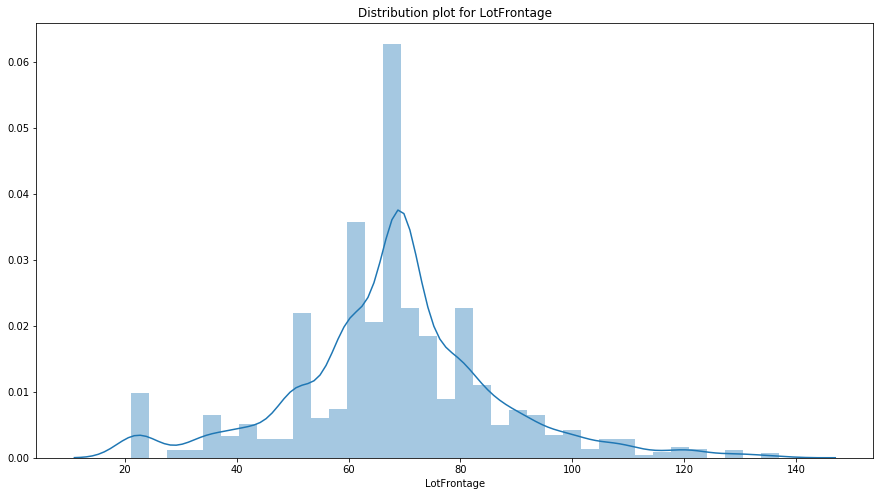

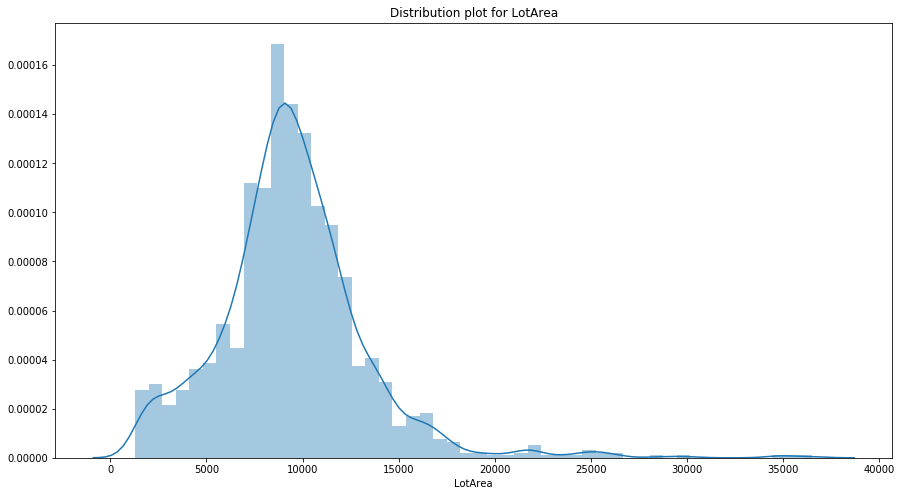

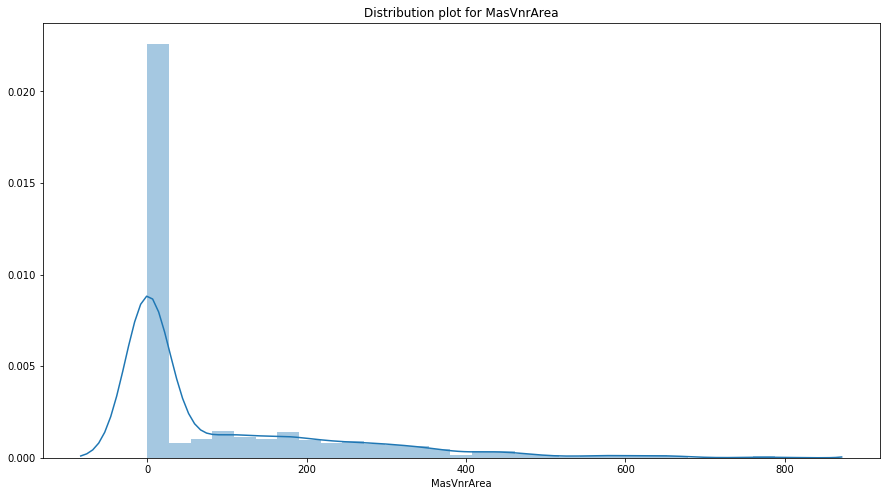

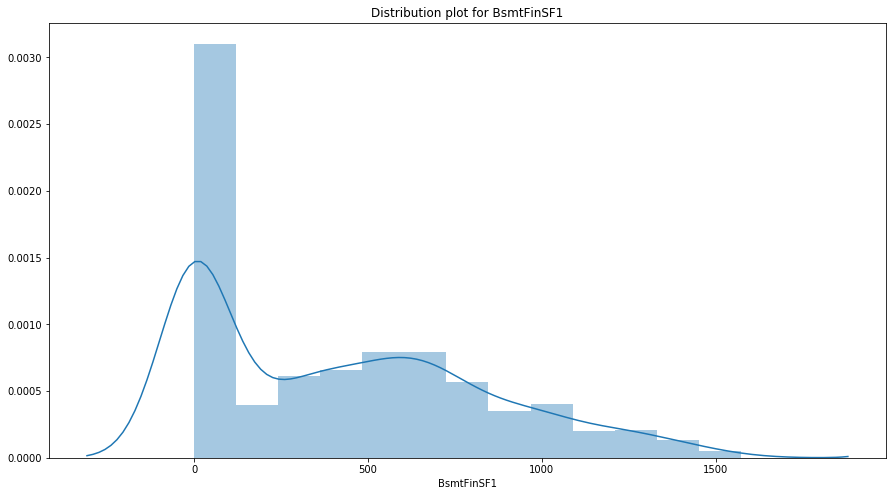

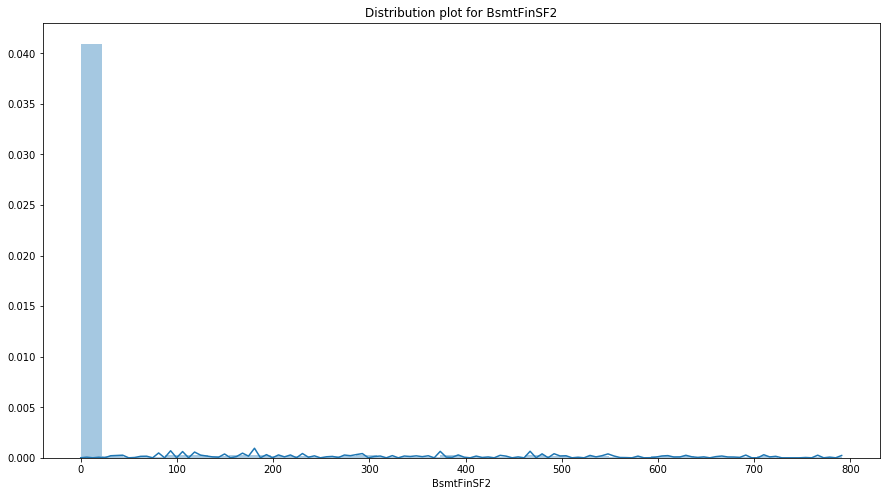

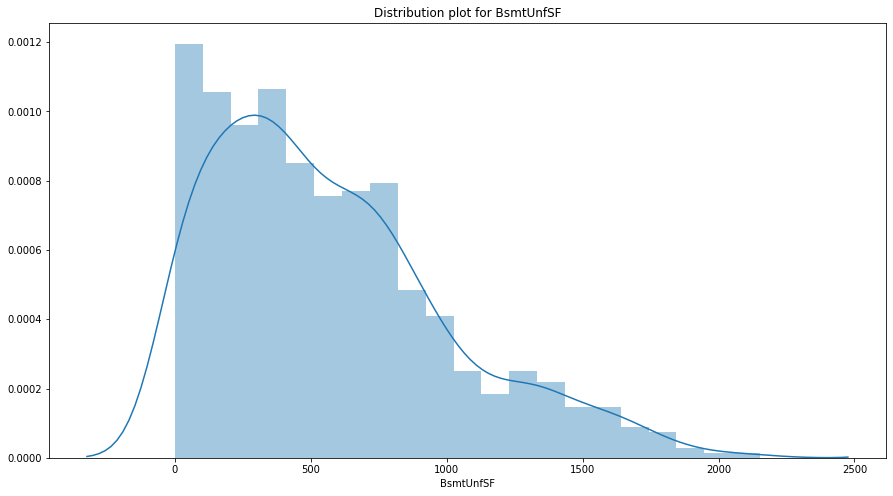

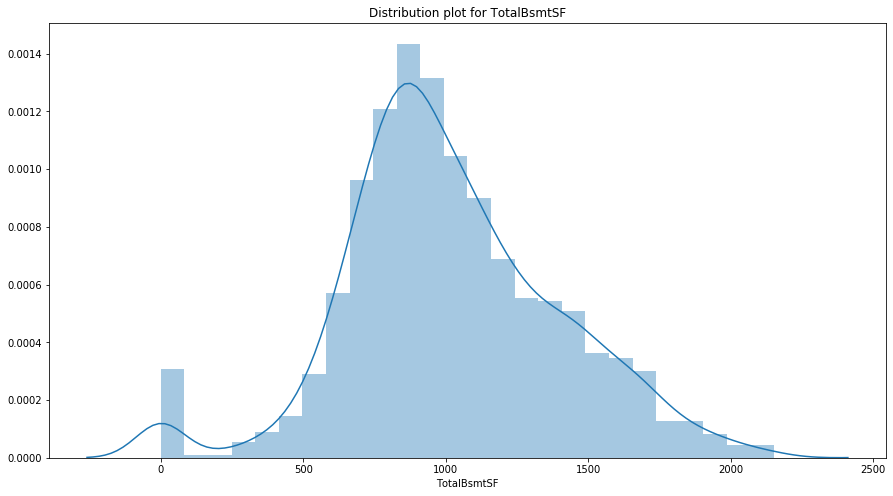

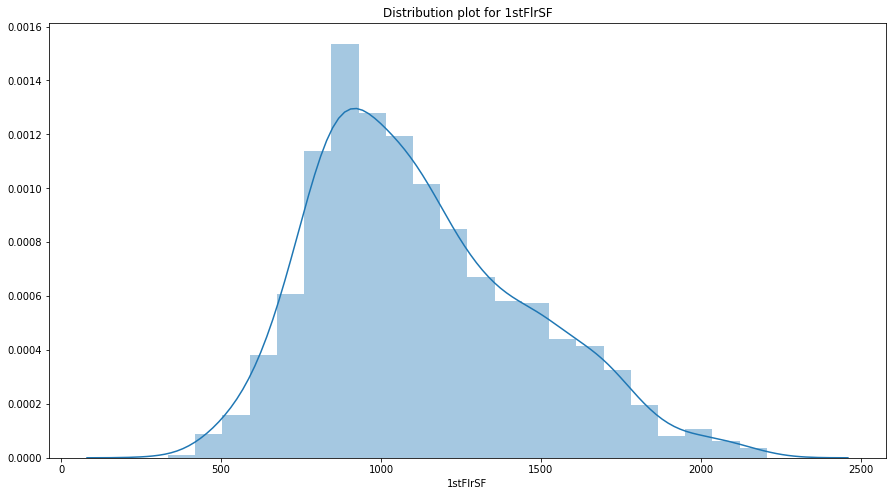

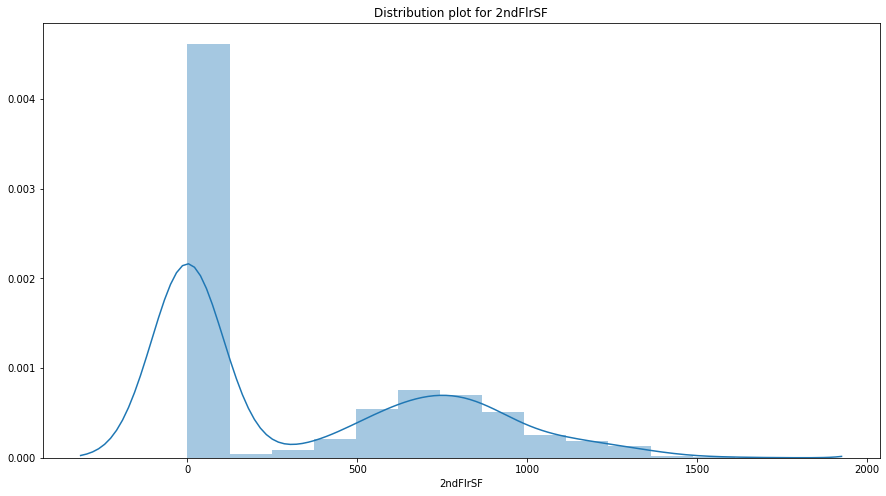

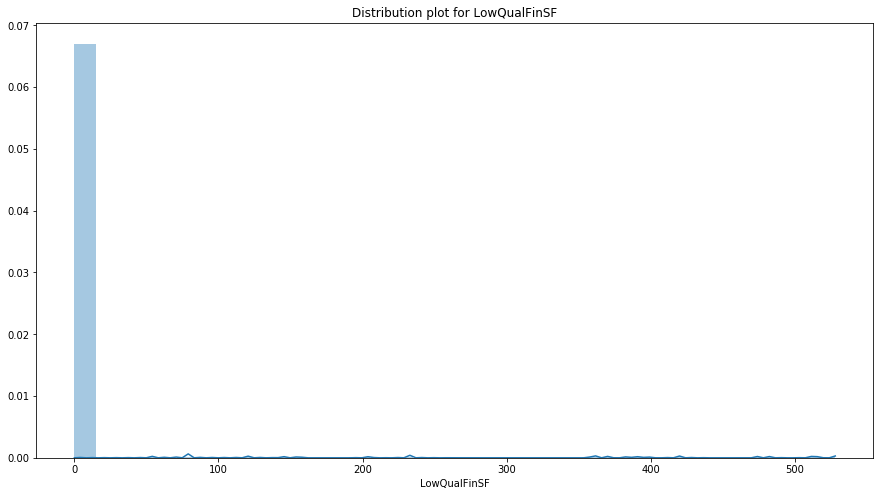

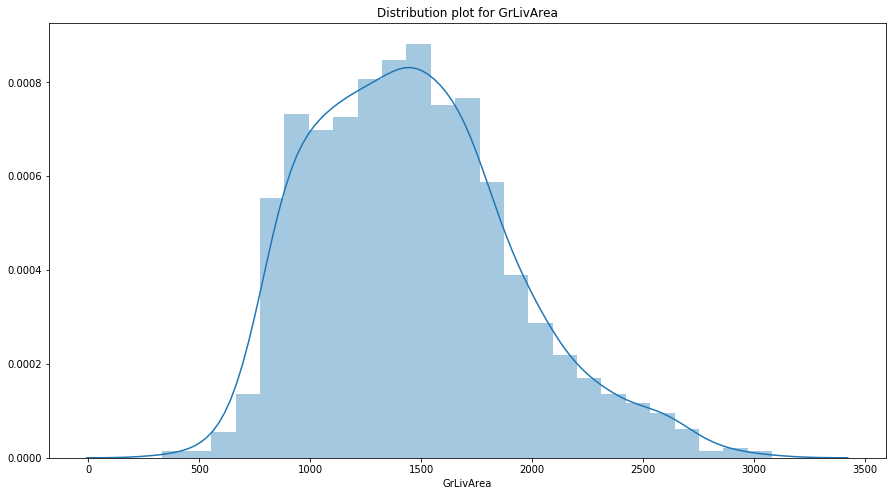

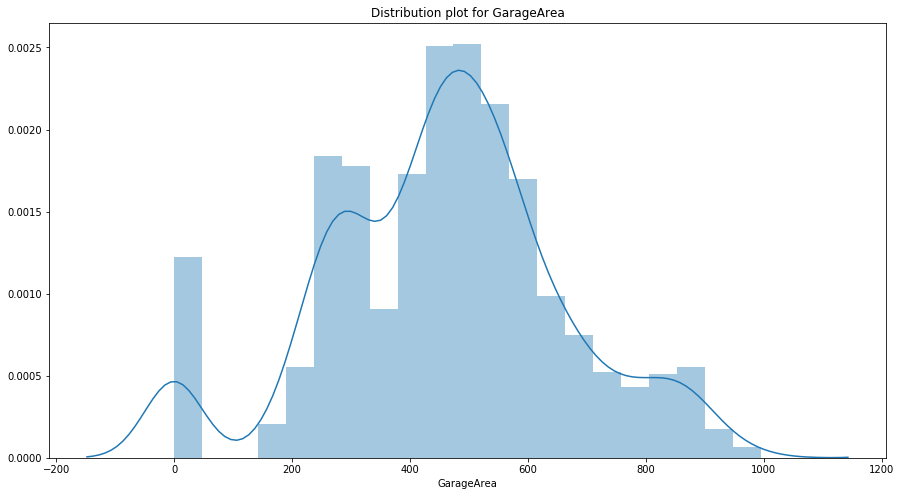

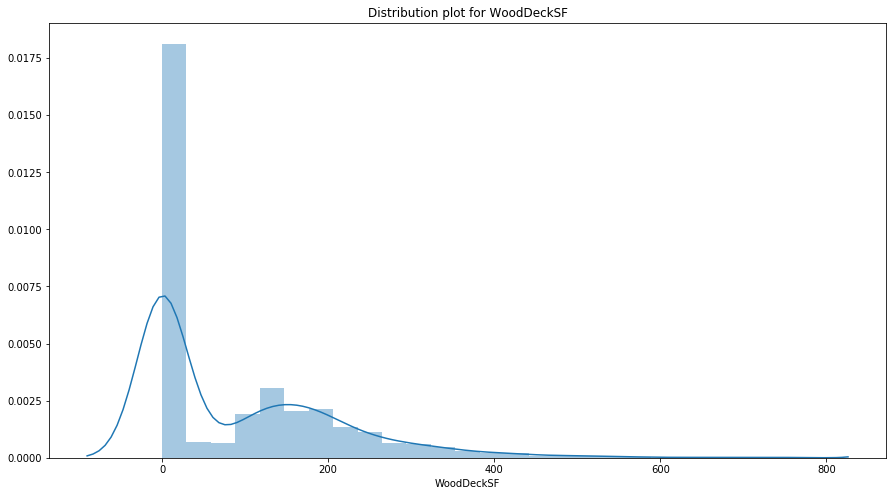

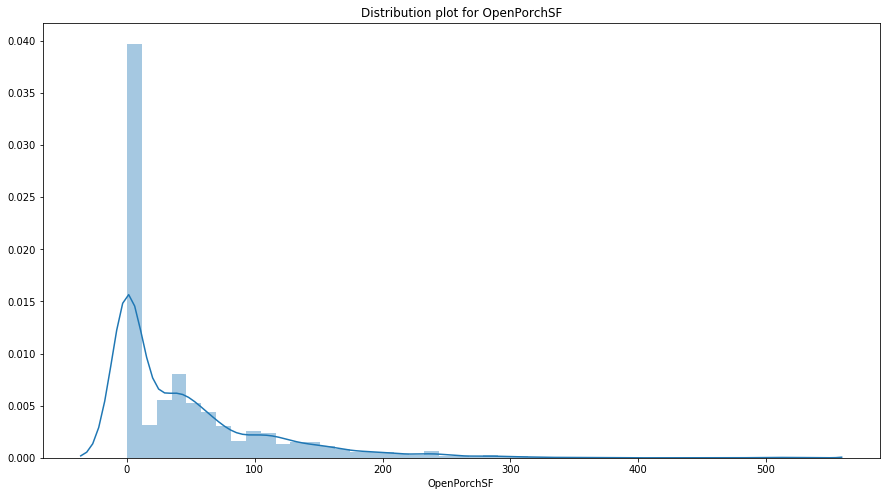

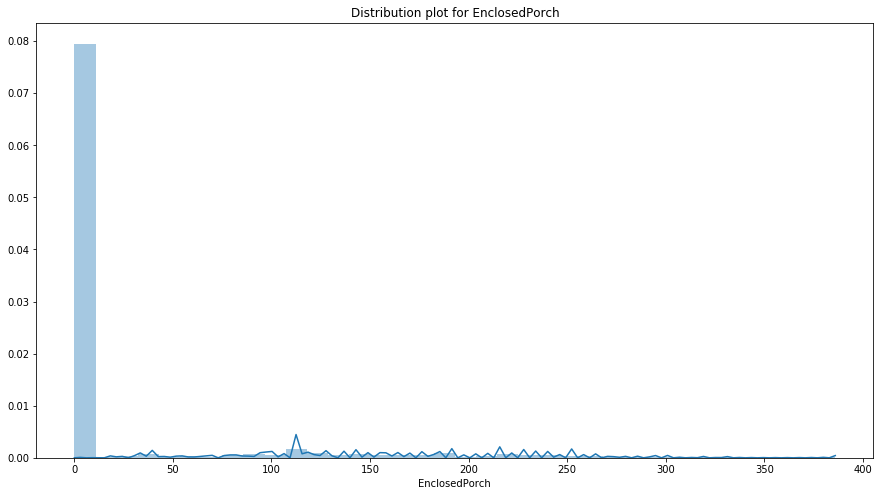

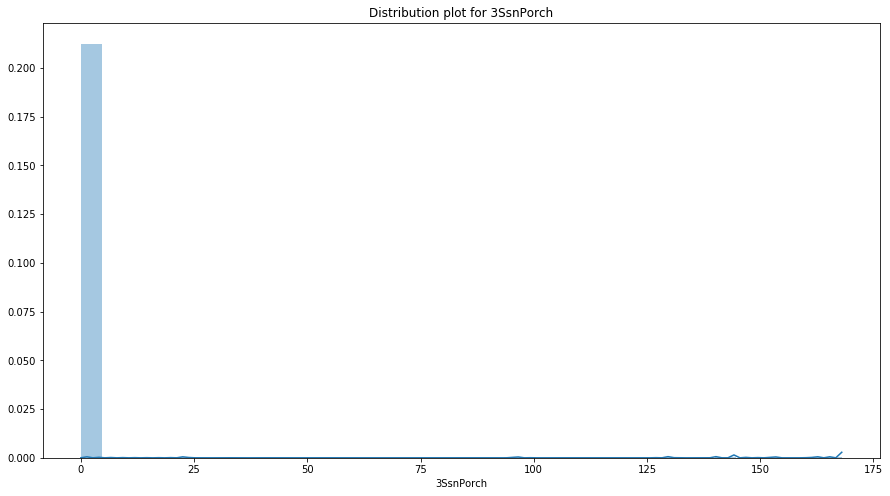

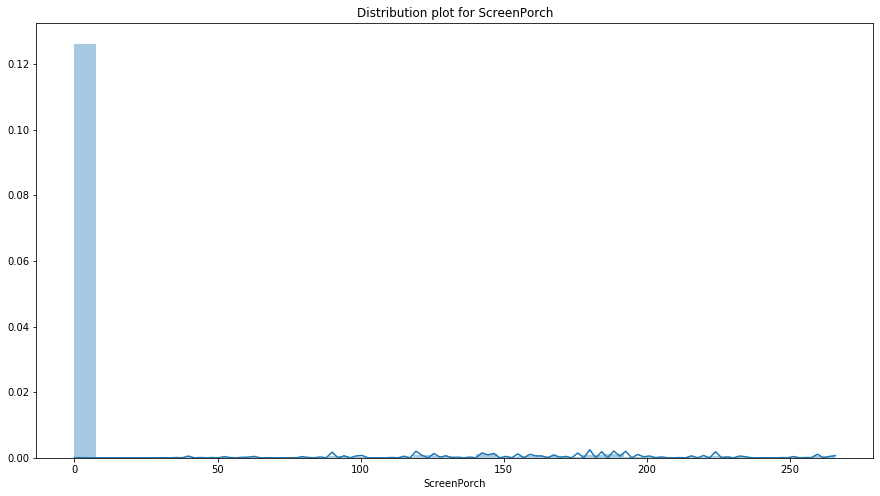

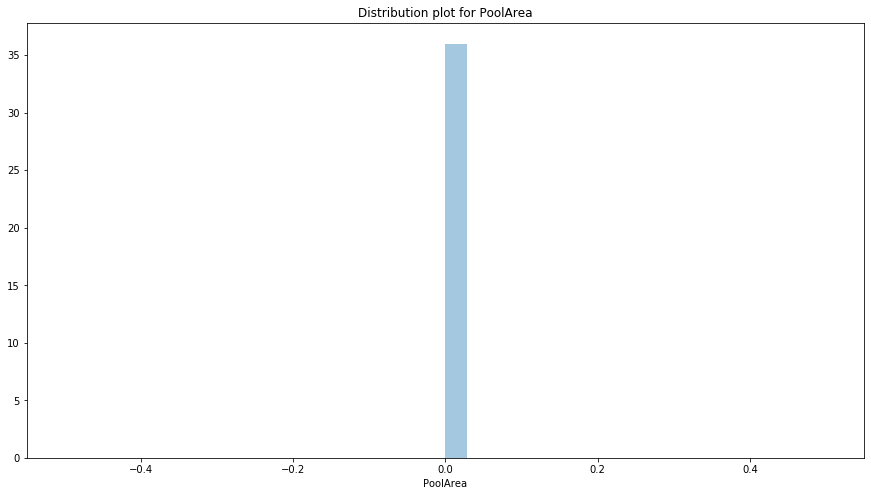

In [54]:
for col in continous_numeric_cols:
    # Plotting Dist plots of each numeric attribute to understand the distribution
    plotDistPlots(col)

# Analysing the output variable - SalePrice

In [55]:
data['SalePrice'].describe()

count      1330.000000
mean     172393.026316
std       66989.237240
min       34900.000000
25%      128050.000000
50%      157900.000000
75%      202500.000000
max      556581.000000
Name: SalePrice, dtype: float64

In [56]:
data['SalePrice'].quantile([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])

0.00     34900.00
0.10    105000.00
0.20    120900.00
0.30    133840.00
0.40    144000.00
0.50    157900.00
0.60    175000.00
0.70    190000.00
0.80    218242.00
0.90    262028.00
0.95    312775.00
0.96    318849.76
0.97    329454.84
0.98    348840.00
0.99    382818.70
1.00    556581.00
Name: SalePrice, dtype: float64

We can see that the outliers are present in the last 99th percentile to 100th percentile range.

In [57]:
# Removing outliers in the last 0.01 quantile of 'SalePrice'
data = data[data['SalePrice'] <= Q99['SalePrice']]

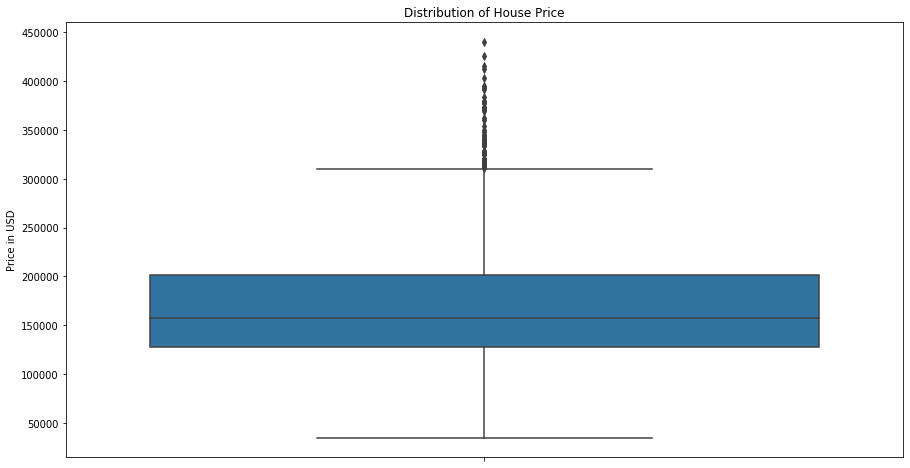

In [58]:
# Plotting box plot to see the SalePrice distribution
plt.figure(figsize = (15, 8))
sns.boxplot(y = data['SalePrice'])
plt.ylabel('Price in USD')
plt.title('Distribution of House Price')
plt.show()

# Distribution of the output variable - SalePrice

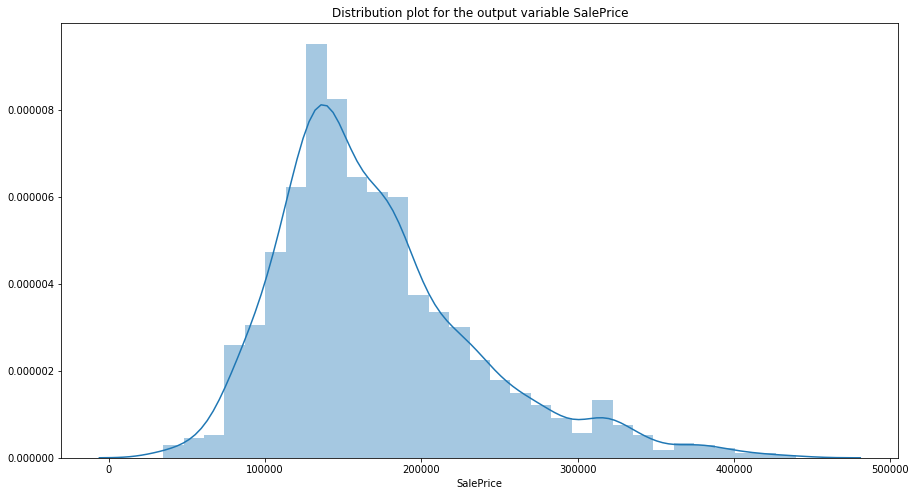

In [59]:
# Plotting a distplot to check the distribution of the output variable
plt.figure(figsize = (15, 8))
sns.distplot(data['SalePrice'])
plt.title('Distribution plot for the output variable SalePrice')
plt.show()

We can observe from the above distplot that the data is skewed towards right. Thus tranforming the SalePrice output variable in log.

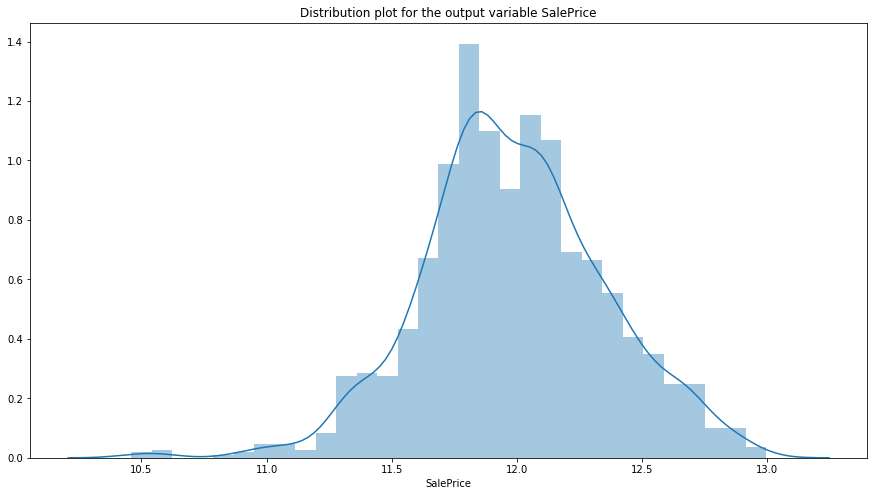

In [60]:
# Transforming the variable
data['SalePrice'] = np.log1p(data['SalePrice'])

# Plotting a distplot to check the distribution of the output variable after transformation
plt.figure(figsize = (15, 8))
sns.distplot(data['SalePrice'])
plt.title('Distribution plot for the output variable SalePrice')
plt.show()

In [61]:
data.head()

MSSubClass  LotFrontage  LotArea  LotShape  LandSlope  OverallQual  \
0          60         65.0     8450         3          2            7   
1          20         80.0     9600         3          2            6   
2          60         68.0    11250         2          2            7   
3          70         60.0     9550         2          2            7   
4          60         84.0    14260         2          2            8   

   OverallCond  MasVnrArea  ExterQual  ExterCond  ...  Family - SaleCondition  \
0            5       196.0          3          2  ...                       0   
1            8         0.0          2          2  ...                       0   
2            5       162.0          3          2  ...                       0   
3            5         0.0          2          2  ...                       0   
4            5       350.0          3          2  ...                       0   

   Normal - SaleCondition  Partial - SaleCondition  isRemodelled  \
0                       1                        0             0   
1                       1                        0             0   
2                       1                        0             1   
3                       0                        0             1   
4                       1                        0             0   

   builtOrRemodelAge  soldAge  age  remodelAge  garageAge  garageStatus  
0                5.0        5   17          17         17             1  
1               31.0       31   44          44         44             0  
2                6.0        7   19          18         19             1  
3               36.0       91  105          50         22             0  
4                8.0        8   20          20         20             0  

[5 rows x 195 columns]

Now we have cleaned the data and can proceed with data splitting, scaling and modelling.

# Data Scaling

In [62]:
# Getting all independent attributes by dropping the output variable
X = data.drop(['SalePrice'], axis = 1)
X.head()

MSSubClass  LotFrontage  LotArea  LotShape  LandSlope  OverallQual  \
0          60         65.0     8450         3          2            7   
1          20         80.0     9600         3          2            6   
2          60         68.0    11250         2          2            7   
3          70         60.0     9550         2          2            7   
4          60         84.0    14260         2          2            8   

   OverallCond  MasVnrArea  ExterQual  ExterCond  ...  Family - SaleCondition  \
0            5       196.0          3          2  ...                       0   
1            8         0.0          2          2  ...                       0   
2            5       162.0          3          2  ...                       0   
3            5         0.0          2          2  ...                       0   
4            5       350.0          3          2  ...                       0   

   Normal - SaleCondition  Partial - SaleCondition  isRemodelled  \
0                       1                        0             0   
1                       1                        0             0   
2                       1                        0             1   
3                       0                        0             1   
4                       1                        0             0   

   builtOrRemodelAge  soldAge  age  remodelAge  garageAge  garageStatus  
0                5.0        5   17          17         17             1  
1               31.0       31   44          44         44             0  
2                6.0        7   19          18         19             1  
3               36.0       91  105          50         22             0  
4                8.0        8   20          20         20             0  

[5 rows x 194 columns]

In [63]:
# Getting dependent/output variable
y = data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [64]:
# Scaling the independent features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'Family - SaleCondition', 'Normal - SaleCondition',
       'Partial - SaleCondition', 'isRemodelled', 'builtOrRemodelAge',
       'soldAge', 'age', 'remodelAge', 'garageAge', 'garageStatus'],
      dtype='object', length=194)

In [65]:
X.head()

MSSubClass  LotFrontage   LotArea  LotShape  LandSlope  OverallQual  \
0    0.061896    -0.170663 -0.252403  0.681812   0.206934     0.753082   
1   -0.880131     0.647680  0.042852  0.681812   0.206934    -0.004571   
2    0.061896    -0.006994  0.466477 -1.137268   0.206934     0.753082   
3    0.297403    -0.443444  0.030015 -1.137268   0.206934     0.753082   
4    0.061896     0.865904  1.239273 -1.137268   0.206934     1.510735   

   OverallCond  MasVnrArea  ExterQual  ExterCond  ...  Family - SaleCondition  \
0    -0.508855    0.745366   1.173666  -0.224499  ...               -0.113961   
1     2.193717   -0.614762  -0.672456  -0.224499  ...               -0.113961   
2    -0.508855    0.509425   1.173666  -0.224499  ...               -0.113961   
3    -0.508855   -0.614762  -0.672456  -0.224499  ...               -0.113961   
4    -0.508855    1.814038   1.173666  -0.224499  ...               -0.113961   

   Normal - SaleCondition  Partial - SaleCondition  isRemodelled  \
0                0.455687                -0.293249     -0.932866   
1                0.455687                -0.293249     -0.932866   
2                0.455687                -0.293249      1.071965   
3               -2.194491                -0.293249      1.071965   
4                0.455687                -0.293249     -0.932866   

   builtOrRemodelAge   soldAge       age  remodelAge  garageAge  garageStatus  
0          -0.891517 -1.054238 -1.062598   -0.900603  -0.865392      1.709701  
1           0.356694 -0.198658 -0.172367    0.395509   0.172417     -0.584898  
2          -0.843509 -0.988424 -0.996655   -0.852599  -0.788517      1.709701  
3           0.596734  1.775759  1.838896    0.683534  -0.673205     -0.584898  
4          -0.747492 -0.955517 -0.963683   -0.756590  -0.750080     -0.584898  

[5 rows x 194 columns]

# Data Splitting

In [66]:
# Splitting data into train and test datasets
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size = 0.3, random_state = 100)

In [67]:
X_train.head()

MSSubClass  LotFrontage   LotArea  LotShape  LandSlope  OverallQual  \
1248    0.061896     0.920461  0.306013  0.681812   0.206934     0.753082   
344    -0.291364    -0.443444 -0.111194  0.681812   0.206934    -0.004571   
1241    0.061896     0.047562 -0.496308  0.681812   0.206934     0.753082   
1069   -0.173611     0.047562 -1.407745  0.681812   0.206934    -0.004571   
652     1.474936     0.047562 -1.285535  0.681812   0.206934    -0.004571   

      OverallCond  MasVnrArea  ExterQual  ExterCond  ...  \
1248    -0.508855   -0.614762   1.173666  -0.224499  ...   
344     -2.310570   -0.614762  -0.672456  -0.224499  ...   
1241    -0.508855   -0.614762   1.173666  -0.224499  ...   
1069     2.193717   -0.614762  -0.672456  -0.224499  ...   
652     -0.508855    0.558001   1.173666  -0.224499  ...   

      Family - SaleCondition  Normal - SaleCondition  Partial - SaleCondition  \
1248               -0.113961                0.455687                -0.293249   
344                -0.113961                0.455687                -0.293249   
1241               -0.113961                0.455687                -0.293249   
1069               -0.113961                0.455687                -0.293249   
652                -0.113961                0.455687                -0.293249   

      isRemodelled  builtOrRemodelAge   soldAge       age  remodelAge  \
1248     -0.932866          -0.987533 -1.120052 -1.128541   -0.996611   
344       1.071965           1.700920  1.446689  1.410266    1.643617   
1241     -0.932866          -0.651476 -0.889703 -0.963683   -0.756590   
1069      1.071965          -0.891517  1.512503  1.476209   -0.948607   
652      -0.932866          -0.843509 -1.021331 -1.095570   -0.948607   

      garageAge  garageStatus  
1248  -0.942267      1.709701  
344    1.171789     -0.584898  
1241  -0.750080     -0.584898  
1069   2.094286     -0.584898  
652   -0.903829      1.709701  

[5 rows x 194 columns]

In [68]:
X_test.head()

MSSubClass  LotFrontage   LotArea  LotShape  LandSlope  OverallQual  \
696     0.650663     0.047562 -0.559980 -1.137268   0.206934    -0.762224   
191     0.061896     0.047562  1.265974 -1.137268  -3.950562     0.753082   
1207   -0.880131    -0.443444 -0.727377  0.681812   0.206934    -0.762224   
256    -0.880131     0.320343  0.045933  0.681812   0.206934     1.510735   
275    -0.880131     0.102118  0.094200  0.681812   0.206934    -0.762224   

      OverallCond  MasVnrArea  ExterQual  ExterCond  ...  \
696     -0.508855   -0.614762  -0.672456  -0.224499  ...   
191     -0.508855    0.273485   1.173666  -0.224499  ...   
1207     3.094574   -0.614762   1.173666   2.637863  ...   
256     -0.508855   -0.115123   1.173666  -0.224499  ...   
275      1.292859   -0.614762  -0.672456  -0.224499  ...   

      Family - SaleCondition  Normal - SaleCondition  Partial - SaleCondition  \
696                -0.113961                0.455687                -0.293249   
191                -0.113961                0.455687                -0.293249   
1207               -0.113961                0.455687                -0.293249   
256                -0.113961               -2.194491                 3.410069   
275                -0.113961               -2.194491                -0.293249   

      isRemodelled  builtOrRemodelAge   soldAge       age  remodelAge  \
696      -0.932866           0.164661 -0.330285 -0.370196    0.107484   
191       1.071965          -0.267412 -0.593541 -0.568025   -0.228545   
1207      1.071965          -1.131557 -0.363192 -0.370196   -1.140624   
256       1.071965          -1.131557 -1.185866 -1.227456   -1.188628   
275      -0.932866           0.500718 -0.099937 -0.040481    0.587526   

      garageAge  garageStatus  
696   -0.096644     -0.584898  
191   -0.288831     -0.584898  
1207  -0.058207     -0.584898  
256   -1.057579      1.709701  
275    0.210855     -0.584898  

[5 rows x 194 columns]

In [69]:
y_train.head()

1374    12.429220
383     11.238502
1365    12.283038
1177    11.652696
721     11.870607
Name: SalePrice, dtype: float64

In [70]:
y_test.head()

770     11.812296
208     12.531776
1327    11.779136
283     12.407384
303     11.917730
Name: SalePrice, dtype: float64

# Recursive Feature Elimination (RFE)
As there are 194 total features, using RFE to get the best 100 features out of 194 for further analysis.

In [71]:
# Running RFE to get significant 100 features
lm = LinearRegression()
lm.fit(X_train, y_train)

# Choosing 100 attributes
rfe = RFE(lm, 100)
rfe = rfe.fit(X_train, y_train)

In [72]:
# RFE ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 49),
 ('LotArea', True, 1),
 ('LotShape', False, 88),
 ('LandSlope', False, 64),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 83),
 ('ExterQual', False, 24),
 ('ExterCond', False, 41),
 ('BsmtQual', False, 33),
 ('BsmtCond', False, 43),
 ('BsmtExposure', False, 13),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 34),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 30),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 11),
 ('BsmtHalfBath', False, 94),
 ('FullBath', False, 15),
 ('HalfBath', False, 14),
 ('BedroomAbvGr', False, 63),
 ('KitchenAbvGr', False, 72),
 ('KitchenQual', False, 48),
 ('TotRmsAbvGrd', False, 89),
 ('Functional', True, 1),
 ('Fireplaces', True, 1),
 ('GarageFinish', False, 86),
 ('GarageCars', True, 1),
 ('GarageArea', True, 

In [73]:
# Filtering out significant attributes obtained from RFE
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Functional', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'FV - MSZoning',
       'RH - MSZoning', 'RL - MSZoning', 'RM - MSZoning',
       'BrkSide - Neighborhood', 'Crawfor - Neighborhood',
       'MeadowV - Neighborhood', 'NridgHt - Neighborhood',
       'StoneBr - Neighborhood', 'Artery - Condition1', 'PosA - Condition2',
       'PosN - Condition2', 'RRAe - Condition2', '1.5Fin - HouseStyle',
       '1.5Unf - HouseStyle', '1Story - HouseStyle', '2.5Unf - HouseStyle',
       '2Story - HouseStyle', 'SFoyer - HouseStyle', 'SLvl - HouseStyle',
       'Flat - RoofStyle', 'ClyTile - RoofMatl', 'CompShg - RoofMatl',
       'Membran - RoofMatl', 'Roll - RoofMatl', 'Tar&Grv - RoofMatl',
       'WdShake - RoofMatl', 'WdShngl - RoofMatl', 'AsbShng - Exterior1st',
 

In [74]:
# Getting RFE train and test independent attributes
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Model Building and Evaluation

## Predicting house prices using Ridge and Lasso regression.

# 1. Ridge Regression
Finding the optimal value of alpha using GridSearchCV

In [75]:
params = {'alpha': [1, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

# 5 fold cross validation
folds  = KFold(n_splits = 5, shuffle = True, random_state = 42)

ridge = Ridge()
ridge_model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring = 'neg_mean_absolute_error', cv = folds, return_train_score = True, verbose = 1)    
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 100, 150, 200, 300, 400, 500, 600, 700,
                                   800, 900, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [76]:
# Getting the Mean Scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha'] <= 1000]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1          100         -0.070778        -0.079425                1
2          150         -0.071691        -0.079546                2
3          200         -0.072646        -0.079914                3
4          300         -0.074733        -0.081136                4
0            1         -0.068735        -0.081251                5
5          400         -0.076974        -0.082834                6
6          500         -0.079390        -0.084821                7
7          600         -0.081760        -0.086885                8
8          700         -0.084065        -0.088924                9
9          800         -0.086318        -0.090989               10
10         900         -0.088517        -0.093021               11
11        1000         -0.090659        -0.095077               12

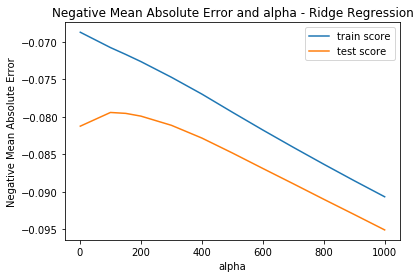

In [77]:
# Plotting mean test and train scores with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# Plot
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha - Ridge Regression")
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [78]:
# Getting the best estimator for lambda
ridge_model_cv.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [79]:
# Getting the best alpha paramter for lambda
ridge_model_cv.best_params_['alpha']

100

In [80]:
# Checking the coefficient values  with the best alpha
alpha = ridge_model_cv.best_params_['alpha']

ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.55629215e-02,  2.51961297e-02,  6.51827575e-02,  4.40848365e-02,
        1.57485271e-02,  3.09159426e-02,  8.73744350e-04,  2.38138445e-03,
        3.64715986e-02,  3.79623721e-02,  3.58955226e-02,  1.27443586e-03,
        6.16819950e-02,  1.81970401e-02,  2.00470749e-02,  2.23544033e-02,
        2.43167051e-02,  1.41900628e-02,  0.00000000e+00,  2.01662720e-02,
        5.96595257e-03,  2.57848651e-02,  2.02384287e-03,  1.17432655e-02,
        2.29730947e-02, -1.31738621e-02,  1.22626225e-02,  1.50185459e-02,
       -1.28516919e-02, -2.87170034e-32,  0.00000000e+00,  0.00000000e+00,
        6.56834874e-03, -4.13650314e-04, -1.41214735e-02,  6.69579721e-03,
        1.01828942e-02, -1.16404486e-03,  3.78420448e-03,  9.83697658e-04,
        0.00000000e+00, -1.28349297e-03,  0.00000000e+00, -2.87170034e-32,
        9.83697658e-04,  5.92724251e-04,  9.84123077e-04, -4.36347056e-03,
       -8.30585229e-03,  1.77507591e-02, -4.36512826e-04, -2.91506268e-06,
       -2.92012298e-03,  

In [81]:
# Prediction - Ridge Regression
# Calculating the train R squared value for evaluation
y_train_pred = ridge.predict(X_train)
r2_score(y_true = y_train, y_pred = y_train_pred)

0.9199468675726146

In [82]:
# Prediction - Ridge Regression
# Calculating the test R squared value for evaluation
y_test_pred = ridge.predict(X_test)
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8997542925687252

In [83]:
# Mean Squared Error - Ridge Regression
mean_squared_error(y_test, ridge.predict(X_test))

0.014299496244059772

In [84]:
# Feature Selection using the coefficient values
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, 'constant')
ridge_coef = pd.DataFrame(list(zip(cols, model_parameters)))
ridge_coef

0       1
0             constant  11.988
1           MSSubClass  -0.016
2          LotFrontage   0.025
3              LotArea   0.065
4             LotShape   0.044
..                 ...     ...
96   PosA - Condition2   0.004
97   PosN - Condition2  -0.016
98   RRAe - Condition2  -0.033
99   RRNn - Condition2  -0.032
100    1Fam - BldgType  -0.015

[101 rows x 2 columns]

In [85]:
# Getting all the features and coefficients 
ridge_coef.columns = ['Feature','Coefficient']
ridge_coef

Feature  Coefficient
0             constant       11.988
1           MSSubClass       -0.016
2          LotFrontage        0.025
3              LotArea        0.065
4             LotShape        0.044
..                 ...          ...
96   PosA - Condition2        0.004
97   PosN - Condition2       -0.016
98   RRAe - Condition2       -0.033
99   RRNn - Condition2       -0.032
100    1Fam - BldgType       -0.015

[101 rows x 2 columns]

In [86]:
# Dropping off constant
ridge_coef = ridge_coef.iloc[1 : ]
ridge_coef

Feature  Coefficient
1           MSSubClass       -0.016
2          LotFrontage        0.025
3              LotArea        0.065
4             LotShape        0.044
5            LandSlope        0.016
..                 ...          ...
96   PosA - Condition2        0.004
97   PosN - Condition2       -0.016
98   RRAe - Condition2       -0.033
99   RRNn - Condition2       -0.032
100    1Fam - BldgType       -0.015

[100 rows x 2 columns]

In [87]:
# Creating a dictionary
ridge_coef_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coef_dict

{'MSSubClass': -0.0156,
 'LotArea': 0.0252,
 'OverallQual': 0.0652,
 'OverallCond': 0.0441,
 'BsmtFinType1': 0.0157,
 'BsmtFinSF1': 0.0309,
 'BsmtFinSF2': 0.0009,
 'BsmtUnfSF': 0.0024,
 'TotalBsmtSF': 0.0365,
 '1stFlrSF': 0.038,
 '2ndFlrSF': 0.0359,
 'LowQualFinSF': 0.0013,
 'GrLivArea': 0.0617,
 'Functional': 0.0182,
 'Fireplaces': 0.02,
 'GarageCars': 0.0224,
 'GarageArea': 0.0243,
 'WoodDeckSF': 0.0142,
 'PoolArea': 0.0,
 'FV - MSZoning': 0.0202,
 'RH - MSZoning': 0.006,
 'RL - MSZoning': 0.0258,
 'RM - MSZoning': 0.002,
 'BrkSide - Neighborhood': 0.0117,
 'Crawfor - Neighborhood': 0.023,
 'MeadowV - Neighborhood': -0.0132,
 'NridgHt - Neighborhood': 0.0123,
 'StoneBr - Neighborhood': 0.015,
 'Artery - Condition1': -0.0129,
 'PosA - Condition2': -0.0,
 'PosN - Condition2': 0.0,
 'RRAe - Condition2': 0.0,
 '1.5Fin - HouseStyle': 0.0066,
 '1.5Unf - HouseStyle': -0.0004,
 '1Story - HouseStyle': -0.0141,
 '2.5Unf - HouseStyle': 0.0067,
 '2Story - HouseStyle': 0.0102,
 'SFoyer - HouseSty

### Getting top 10 features using the Magnitude of the coefficients - Ridge

In [88]:
# Sorting based on the magnitude of the coefficient to get the features which highly affect the output variable
ridge_coef = ridge_coef.iloc[(-np.abs(ridge_coef['Coefficient'].values)).argsort()]
ridge_coef

Feature  Coefficient
3                  LotArea        0.065
13            BsmtExposure        0.062
4                 LotShape        0.044
10               ExterCond        0.038
11                BsmtQual        0.036
..                     ...          ...
44               3SsnPorch       -0.000
68  Gilbert - Neighborhood       -0.000
54       HLS - LandContour        0.000
52           Pave - Street       -0.000
65  CollgCr - Neighborhood       -0.000

[100 rows x 2 columns]

In [89]:
top10_ridge_coeff = ridge_coef.head(10)
top10_ridge_coeff

Feature  Coefficient
3             LotArea        0.065
13       BsmtExposure        0.062
4            LotShape        0.044
10          ExterCond        0.038
11           BsmtQual        0.036
9           ExterQual        0.036
98  RRAe - Condition2       -0.033
99  RRNn - Condition2       -0.032
6         OverallQual        0.031
22           2ndFlrSF        0.026

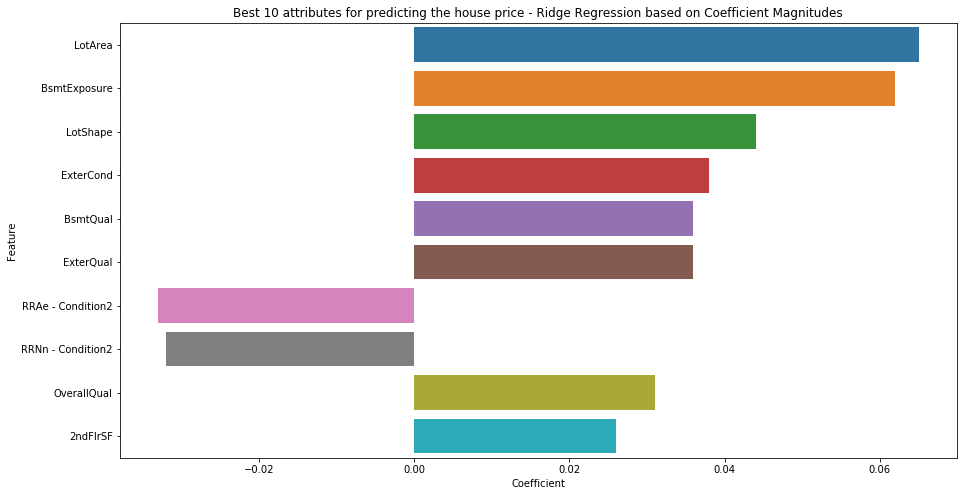

In [90]:
# Bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(15,8))
sns.barplot(y = 'Feature', x = 'Coefficient', data = top10_ridge_coeff)
plt.title('Best 10 attributes for predicting the house price - Ridge Regression based on Coefficient Magnitudes')
plt.show()

Above are the obtained top 10 features for Ridge Regression using the magnitude of coefficents obtained with Ridge to get the best attributes for predicting the house price.

# Ridge Regression:

### Obtained*best alpha* for Ridge Regression = <font color='red'>100</font> 

### *Train R-square* value for Ridge Regression = <font color='red'>0.924</font> 
### *Test R-square* value for Ridge Regression = <font color='red'>0.901</font> 
### *Mean Squared Error* for Ridge Regression = <font color='red'>0.014</font> 

### Obtained *best attributes* based on Ridge regression model for predicting the price of a house are
- BsmtExposure
- LotFrontage
- LotArea
- ExterCond
- ExterQual
- BsmtQual
- RRAn Condition
- RRNn Condition
- MSSubClass
- GrLivArea

# 2. Lasso Regression
Finding the optimal value of alpha using GridSearchCV

In [91]:
params = {'alpha': [0.005, 0.004, 0.003, 0.002, 0.001, 0.01, 0.05, 0.09]}

# 5 fold cross validation
folds  = KFold(n_splits = 5, shuffle = True, random_state = 42)

lasso = Lasso()
lasso_model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring = 'neg_mean_absolute_error', cv = folds, return_train_score = True, verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.005, 0.004, 0.003, 0.002, 0.001, 0.01,
                                   0.05, 0.09]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [92]:
# Getting the Mean Scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
4       0.001         -0.069971        -0.079475                1
2       0.003         -0.072171        -0.079520                2
1       0.004         -0.073050        -0.079530                3
0       0.005         -0.073837        -0.079699                4
3       0.002         -0.071253        -0.079700                5
5        0.01         -0.078704        -0.083349                6
6        0.05         -0.113049        -0.114715                7
7        0.09         -0.142307        -0.143860                8

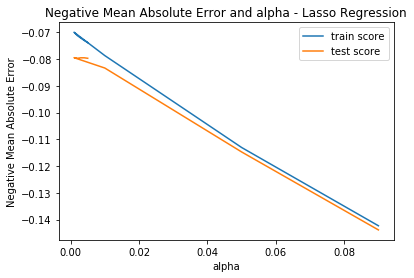

In [93]:
# Plotting mean test and train scores with alpha
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# Plot
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha - Lasso Regression")
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [94]:
# Getting the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
# Getting the best alpha paramter for lambda
lasso_model_cv.best_params_['alpha']

0.001

In [96]:
# Checking the coefficient values  with the best alpha
alpha = lasso_model_cv.best_params_['alpha']

lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-1.51362078e-02,  2.62967572e-02,  7.47366497e-02,  5.15621775e-02,
        1.32222510e-02,  3.31758096e-02,  0.00000000e+00, -0.00000000e+00,
        3.92788389e-02,  0.00000000e+00,  8.92216161e-04, -6.03594365e-04,
        1.21214143e-01,  1.88151911e-02,  1.64601179e-02,  1.89338205e-02,
        2.12136806e-02,  1.30702097e-02,  0.00000000e+00,  4.12188722e-02,
        1.60021067e-02,  6.70770686e-02,  3.89769587e-02,  1.31248582e-02,
        2.39091026e-02, -1.12197282e-02,  1.16844215e-02,  1.40521091e-02,
       -1.34416528e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.34987016e-03,  0.00000000e+00, -9.10423991e-03,  4.82858423e-03,
        0.00000000e+00, -0.00000000e+00,  3.99341472e-03,  1.47260337e-05,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        6.20363086e-04, -0.00000000e+00,  1.25109988e-03, -6.73635796e-04,
       -7.30289268e-03,  1.80864172e-02,  0.00000000e+00,  0.00000000e+00,
       -2.75791615e-03,  

In [97]:
# Prediction - Lasso Regression
# Calculating the train R squared value for evaluation
y_train_pred = lasso.predict(X_train)
r2_score(y_true = y_train, y_pred = y_train_pred)

0.923427596787852

In [98]:
# Prediction - Lasso Regression
# Calculating the test R squared value for evaluation
y_test_pred = lasso.predict(X_test)
r2_score(y_true = y_test, y_pred = y_test_pred)

0.9042830390035289

In [99]:
# Mean Squared Error - Lasso Regression
mean_squared_error(y_test, lasso.predict(X_test))

0.013653495589326782

In [100]:
# Feature Selection using the coefficient values
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_coef = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coef

0       1
0             constant  11.989
1           MSSubClass  -0.015
2          LotFrontage   0.026
3              LotArea   0.075
4             LotShape   0.052
..                 ...     ...
96   PosA - Condition2   0.000
97   PosN - Condition2  -0.008
98   RRAe - Condition2  -0.065
99   RRNn - Condition2  -0.012
100    1Fam - BldgType  -0.017

[101 rows x 2 columns]

In [101]:
# Getting all the features and coefficients 
lasso_coef.columns = ['Feature','Coefficient']
lasso_coef

Feature  Coefficient
0             constant       11.989
1           MSSubClass       -0.015
2          LotFrontage        0.026
3              LotArea        0.075
4             LotShape        0.052
..                 ...          ...
96   PosA - Condition2        0.000
97   PosN - Condition2       -0.008
98   RRAe - Condition2       -0.065
99   RRNn - Condition2       -0.012
100    1Fam - BldgType       -0.017

[101 rows x 2 columns]

In [102]:
# Dropping off constant
lasso_coef = lasso_coef.iloc[1 : ]
lasso_coef

Feature  Coefficient
1           MSSubClass       -0.015
2          LotFrontage        0.026
3              LotArea        0.075
4             LotShape        0.052
5            LandSlope        0.013
..                 ...          ...
96   PosA - Condition2        0.000
97   PosN - Condition2       -0.008
98   RRAe - Condition2       -0.065
99   RRNn - Condition2       -0.012
100    1Fam - BldgType       -0.017

[100 rows x 2 columns]

In [103]:
# Creating a dictionary
lasso_coef_dict = dict(pd.Series(lasso.coef_.round(4), index = X_train.columns))
lasso_coef_dict

{'MSSubClass': -0.0151,
 'LotArea': 0.0263,
 'OverallQual': 0.0747,
 'OverallCond': 0.0516,
 'BsmtFinType1': 0.0132,
 'BsmtFinSF1': 0.0332,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.0393,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0009,
 'LowQualFinSF': -0.0006,
 'GrLivArea': 0.1212,
 'Functional': 0.0188,
 'Fireplaces': 0.0165,
 'GarageCars': 0.0189,
 'GarageArea': 0.0212,
 'WoodDeckSF': 0.0131,
 'PoolArea': 0.0,
 'FV - MSZoning': 0.0412,
 'RH - MSZoning': 0.016,
 'RL - MSZoning': 0.0671,
 'RM - MSZoning': 0.039,
 'BrkSide - Neighborhood': 0.0131,
 'Crawfor - Neighborhood': 0.0239,
 'MeadowV - Neighborhood': -0.0112,
 'NridgHt - Neighborhood': 0.0117,
 'StoneBr - Neighborhood': 0.0141,
 'Artery - Condition1': -0.0134,
 'PosA - Condition2': -0.0,
 'PosN - Condition2': 0.0,
 'RRAe - Condition2': 0.0,
 '1.5Fin - HouseStyle': 0.0033,
 '1.5Unf - HouseStyle': 0.0,
 '1Story - HouseStyle': -0.0091,
 '2.5Unf - HouseStyle': 0.0048,
 '2Story - HouseStyle': 0.0,
 'SFoyer - HouseStyle': -0.0

### Getting top 10 features using the Magnitude of the coefficients - Lasso

In [104]:
# Sorting based on the magnitude of the coefficient to get the features which highly affect the output variable
lasso_coef = lasso_coef.iloc[(-np.abs(lasso_coef['Coefficient'].values)).argsort()]
lasso_coef

Feature  Coefficient
13            BsmtExposure        0.121
3                  LotArea        0.075
22                2ndFlrSF        0.067
98       RRAe - Condition2       -0.065
4                 LotShape        0.052
..                     ...          ...
64  ClearCr - Neighborhood       -0.000
65  CollgCr - Neighborhood       -0.000
68  Gilbert - Neighborhood       -0.000
44               3SsnPorch       -0.000
59         FR2 - LotConfig        0.000

[100 rows x 2 columns]

In [105]:
top10_lasso_coeff = lasso_coef.head(10)
top10_lasso_coeff

Feature  Coefficient
13       BsmtExposure        0.121
3             LotArea        0.075
22           2ndFlrSF        0.067
98  RRAe - Condition2       -0.065
4            LotShape        0.052
20          HeatingQC        0.041
9           ExterQual        0.039
23       LowQualFinSF        0.039
6         OverallQual        0.033
2         LotFrontage        0.026

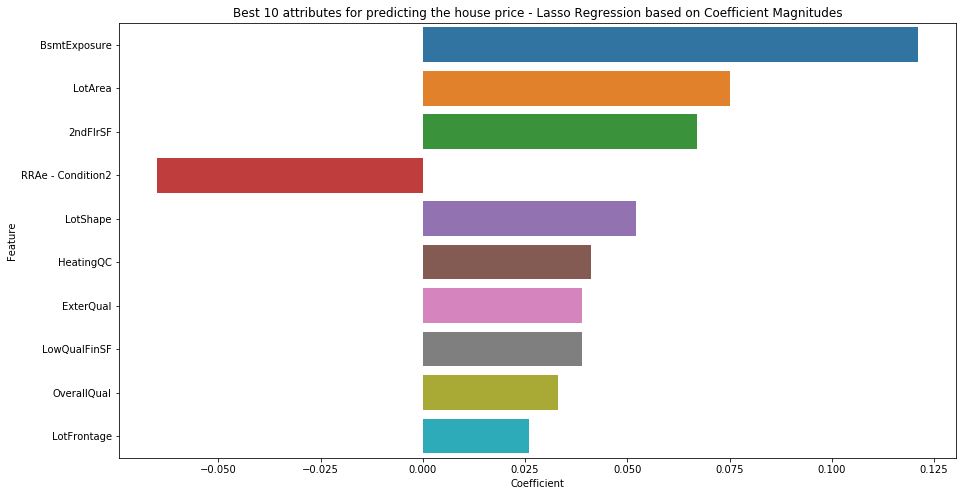

In [106]:
# Bar plot to determine the variables that would affect pricing most using lasso regression
plt.figure(figsize=(15,8))
sns.barplot(y = 'Feature', x = 'Coefficient', data = top10_lasso_coeff)
plt.title('Best 10 attributes for predicting the house price - Lasso Regression based on Coefficient Magnitudes')
plt.show()

Above are the obtained top 10 features for Lasso Regression using the magnitude of coefficents obtained with Lasso to get the best attributes for predicting the house price.

# Lasso Regression:

### Obtained*best alpha* for Lasso Regression = <font color='red'>0.001</font> 

### *Train R-square* value for Lasso Regression = <font color='red'>0.928</font> 
### *Test R-square* value for Lasso Regression = <font color='red'>0.909</font> 
### *Mean Squared Error* for Lasso Regression = <font color='red'>0.013</font> 

### Obtained *best attributes* based on Lasso regression model for predicting the price of a house are
- BsmtExposure
- RRAn Condition
- LotFrontage
- GrLivArea
- LotArea
- 2ndFlrSF
- BsmtFullBath
- ExterQual
- OverallQual
- MSSubClass

# Conclusion

Below are the alpha and performance evaluation metrics obtained for both Ridge and Lasso Regression.

| Regression | alpha | Train R-square | Test R-square | Mean Square Error |
| --- | --- | --- | --- | --- |
| Ridge | **100** | **0.924** | **0.901** | **0.014** |
| <font color='red'>Lasso</font> | **0.001** | **0.928** | **0.909** | **0.013** |

As we can see the R square values are nearly similar for Ridge and Lasso, (Lasso model is performing slightly better than Ridge) hence choosing Lasso model as the final model as Lasso performs Feature selection as well, so we obtain best features from Lasso model.

Optimal value of lambda for Ridge and Lasso Regression are **100** and **0.001** respectively.

Taking into consideration of the best features obtained from Ridge and Lasso Regression, we can consider the driving features for house price prediction as:

#### Best attributes which drive the house pricing:
- <font color='red'>**BsmtExposure**</font> : Refers to walkout or garden level walls - <font color='green'>(*Good exposure ensures higher Sale price*)</font>
- <font color='red'>**LotFrontage**</font> : Linear feet of street connected to property - <font color='green'>(*Sale price is higher if the distance is more*)</font>
- <font color='red'>**RRAn Condition**</font> : Proximity that the house is Adjacent to North-South Railroad - <font color='green'>(*Houses Adjacent or near to the Railroad have less sale price*)</font>
- <font color='red'>**LotArea**</font> : Lot size in square feet - <font color='green'>(*Higher the Lot size, higher the Sale price*)</font>
- <font color='red'>**ExterQual**</font> : Evaluates the quality of the material on the exterior - <font color='green'>(*Excellent Quality ensures higher sale price*)</font>
- <font color='red'>**OverallQual**</font> : Rates the overall material and finish of the house - <font color='green'>(*Excellent Quality ensures higher sale price*)</font>
- <font color='red'>**MsSubClass**</font> : Identifies the type of dwelling involved in the sale. - <font color='green'>(*Newer the type, better the sale price*)</font>
- <font color='red'>**GrLivArea**</font> : Above grade (ground) living area square feet. - <font color='green'>(*Higher the area, higher the Sale price*)</font>


#### Few other driving attributes (combining the results of Ridge and Lasso Regression):
- <font color='red'>**ExterCond**</font> : Evaluates the present condition of the material on the exterior - <font color='green'>(*Excellent condition ensures higher sale price*)</font>
- <font color='red'>**RRNn Condition**</font> : Within 200' of North-South Railroad - <font color='green'>(*Houses within 200' to the Railroad have less sale price*)</font>
- <font color='red'>**BsmtQual**</font> : Evaluates the height of the basement - <font color='green'>(*Excellent Quality ensures higher sale price*)</font>